FFT:
------

In [5]:
%matplotlib inline
from collections import OrderedDict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df = pd.read_csv('data/10-01-2019_00.csv')
# df = pd.read_csv('data/22-01-2019_00.csv')
filename = '29-01-2019_12-41-09'
cols = ['Time','Ch-1','Ch-2','Ch-3','Ch-4','Ch-5','Ch-6','Ch-7','Ch-8','Key','Freq']  # all
df = pd.read_csv('data/' + filename + '.csv', skiprows=3, usecols=cols)
s_cols = ['Time','Ch-6','Ch-7','Ch-8','Key','Freq']  # only channels 6-8
df['Ch-8'] = df['Ch-8'] * -1  # inverse sign of Ch-8 since electrodes are reversed compared to Ch-6
df = df[s_cols]
df_stimuli = pd.read_csv('data/' + filename + '.csv', skiprows=2, nrows=0, squeeze=True, usecols=range(1, 36))
df_stimuli = pd.Series([float(i) for i in df_stimuli])
# Uncomment next for ploting each row assuming they come every 4.5ms
# time = pd.Series([4.5*i for i in range(df.shape[0])])
# time = time / 1000
# df['Time'] = time

stimulus = df[df['Key'] != 'silence']  # select the rows with stimulus
silence = df[df['Key'] == 'silence']  # select the rows with silence (noise)
m_keys = df[['Key', 'Freq']][df['Key'] != 'silence'].drop_duplicates()
m_keys_sorted = m_keys.sort_values(by=['Freq'])
dataps = df.shape[0]  # total datapoints (rows)
resolution = 4.5 / 1000  # each datapoint recorded every 4.5ms
stimulus_mean = []
silence_mean = []
labels = []
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
x = df['Time']

for key in stimulus.columns:  # store the mean of each column whith and without stimuli
    if key != 'Key' and key != 'Freq' and key != 'Time':
        labels.append(key)
        stimulus_mean.append(stimulus[key].mean())
        silence_mean.append(silence[key].mean())
stimulus_mean.pop()
silence_mean.pop()
nstimuli = 36
stimulus_stop = np.arange(7, 151, 4)

stimulus_start = np.arange(5, 149, 4)
font = {'weight': 'bold', 'size': 25}

plt.style.use('seaborn')
plt.figure(figsize=(25, 10))
plt.ylim(-1.5, 1.5)

for label in labels:
    y = df[label]
    plt.plot(x, y)
i = 0
axes = plt.gca()
ymin, ymax = axes.get_ylim()
for value in df_stimuli:
    plt.axvline(x=value, color='green', linestyle='--', label='Stimuli Start')
    plt.axvline(x=value+2, color='red', linestyle='--', label='Stimuli Stop')
    lbl = m_keys.iloc[i]['Key'] + ': ' + str(m_keys.iloc[i]['Freq']) + 'Hz'
    plt.text(value, ymax, lbl, rotation=45, va='bottom')
    i += 1    
handles, lbls = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(lbls, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.01, 0.5), loc=2)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (μV)')
plt.title('All Channels', fontdict=font, y=1.15)
plt.grid(True)

plt.show()

KeyError: 'Time'

FFT:
------

In [7]:
from scipy.fftpack import fft
# Number of sample points
N = df.shape[0]
# sample spacing
T = 1.0 / 223.0
x = np.linspace(0.0, N*T, N)
# y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
for index, ch in enumerate(labels):
    y = df[ch]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    plt.figure(figsize=(25, 10))
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), color=color[index], label=ch)
    plt.xlabel('Frequency (Hz))')
    plt.ylabel('Power spectral density')
    plt.title('FFT', fontdict=font, y=1.15)
    plt.grid(True)
    plt.legend(labels)
    plt.show()

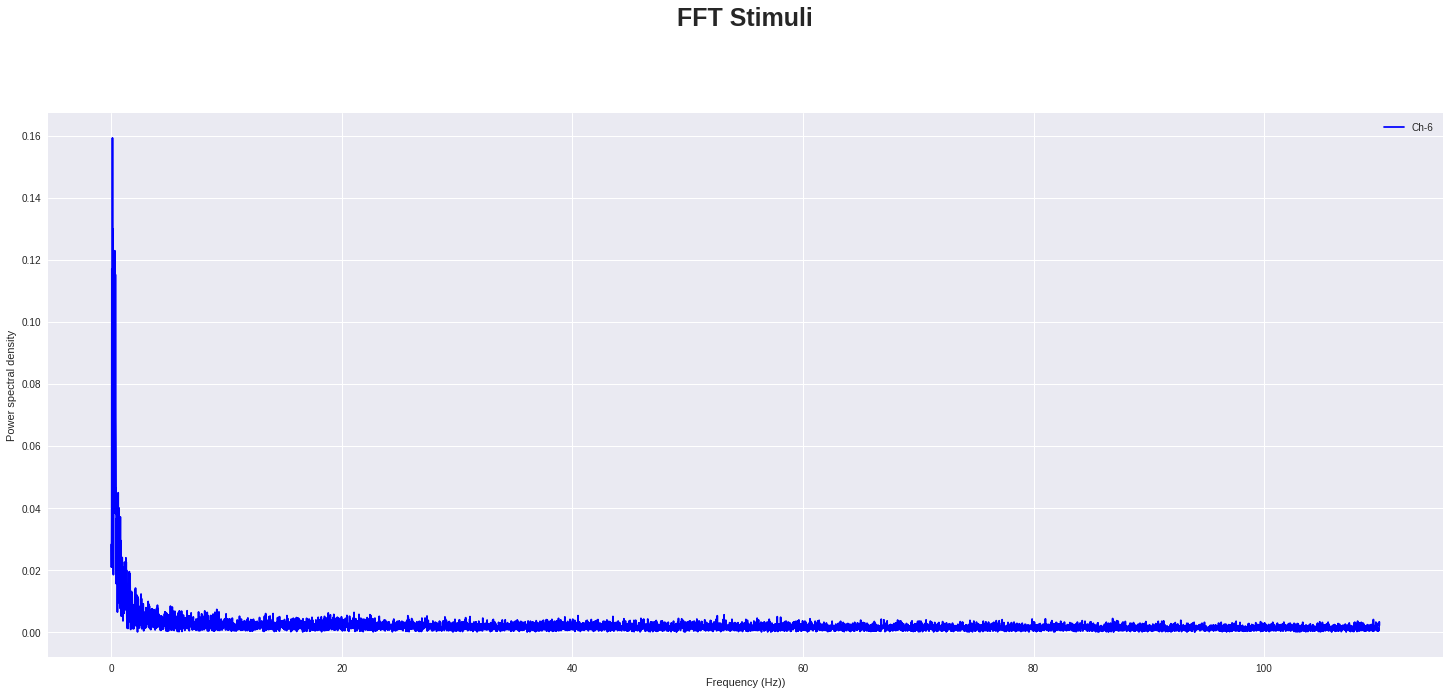

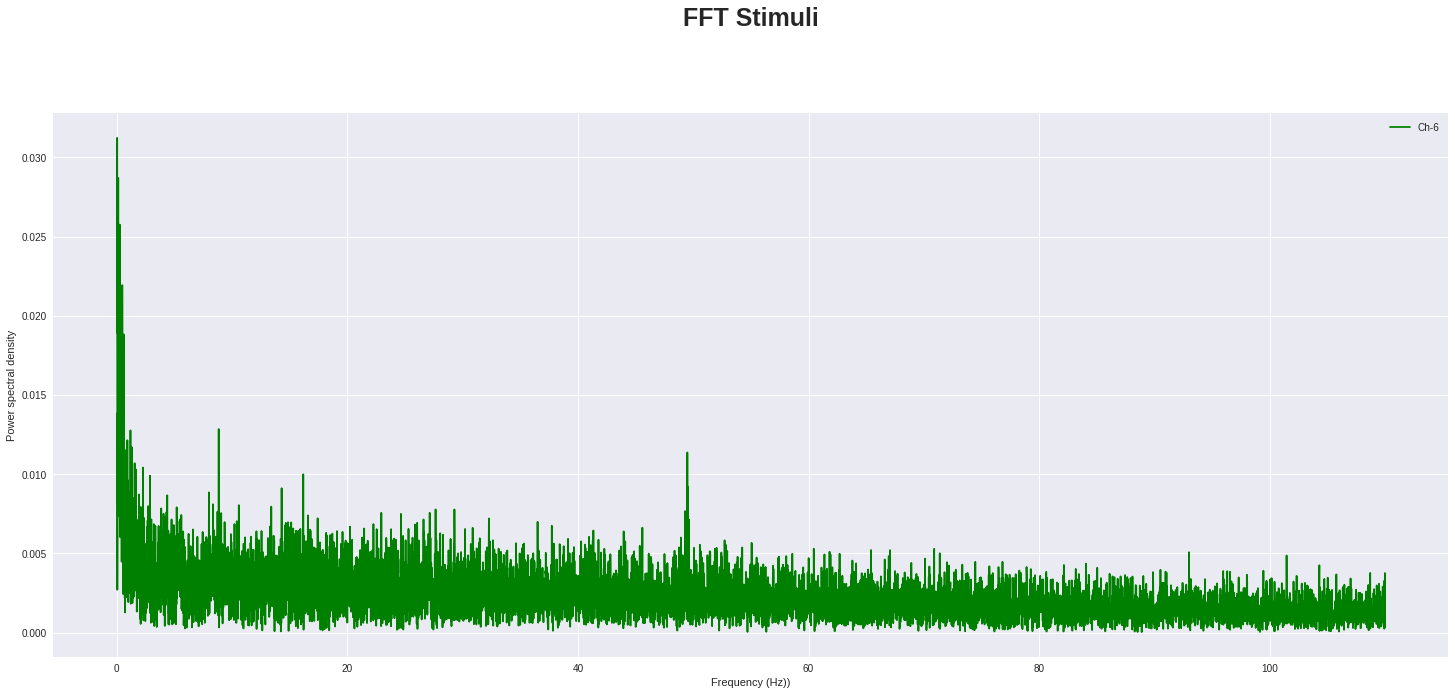

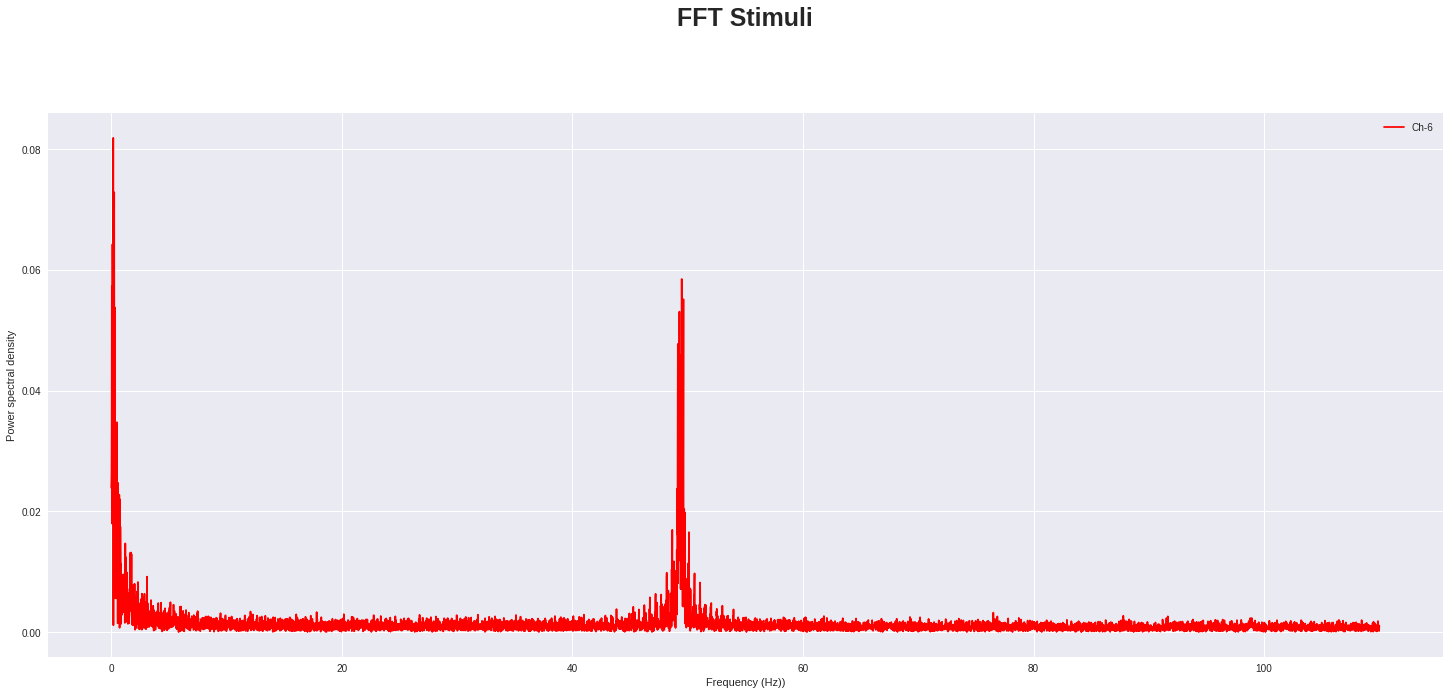

In [30]:
stimulus = df[df['Key'] != 'silence']  # select the rows with stimulus
# Number of sample points
N = stimulus.shape[0]
# sample spacing
T = 1.0 / 220.0
x = np.linspace(0.0, N*T, N)
# y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
for index, ch in enumerate(labels):
    y = stimulus[ch]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    plt.figure(figsize=(25, 10))
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), color=color[index], label=ch)
    plt.xlabel('Frequency (Hz))')
    plt.ylabel('Power spectral density')
    plt.title('FFT Stimuli', fontdict=font, y=1.15)
    plt.grid(True)
    plt.legend(labels)
    plt.show()

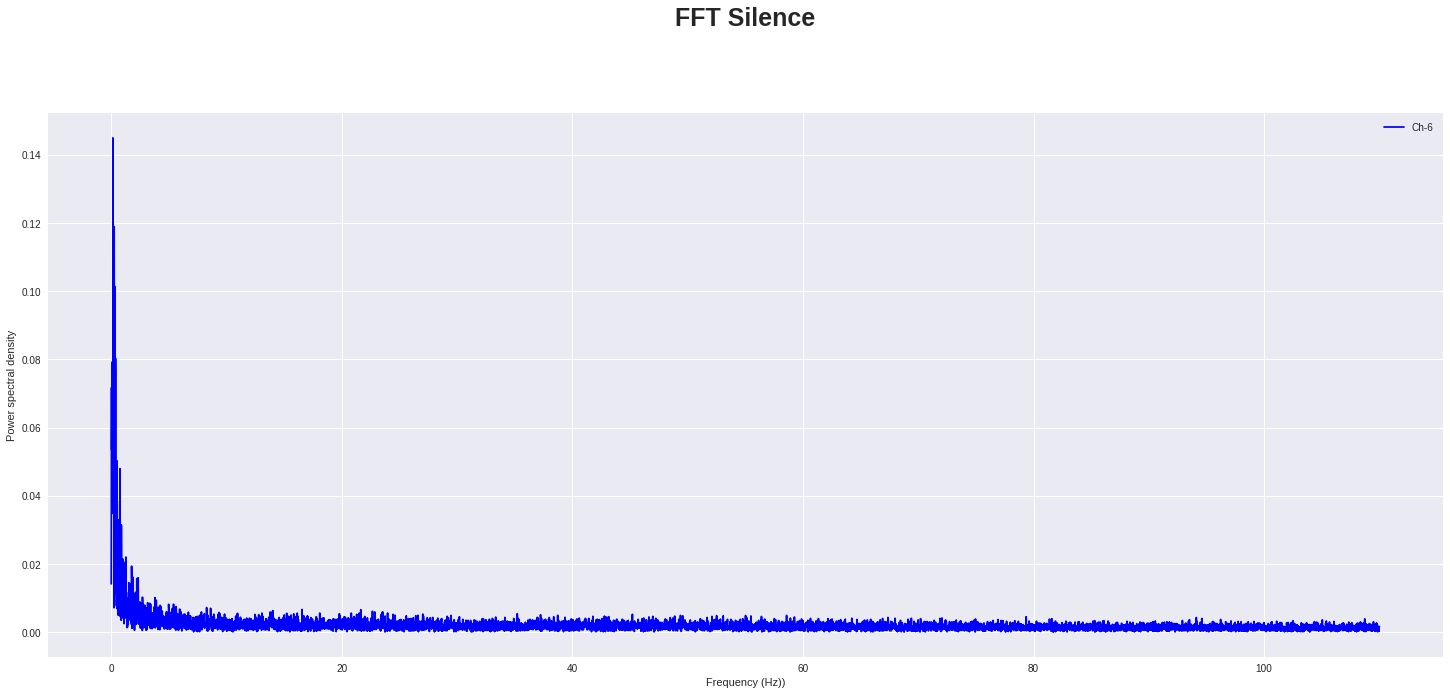

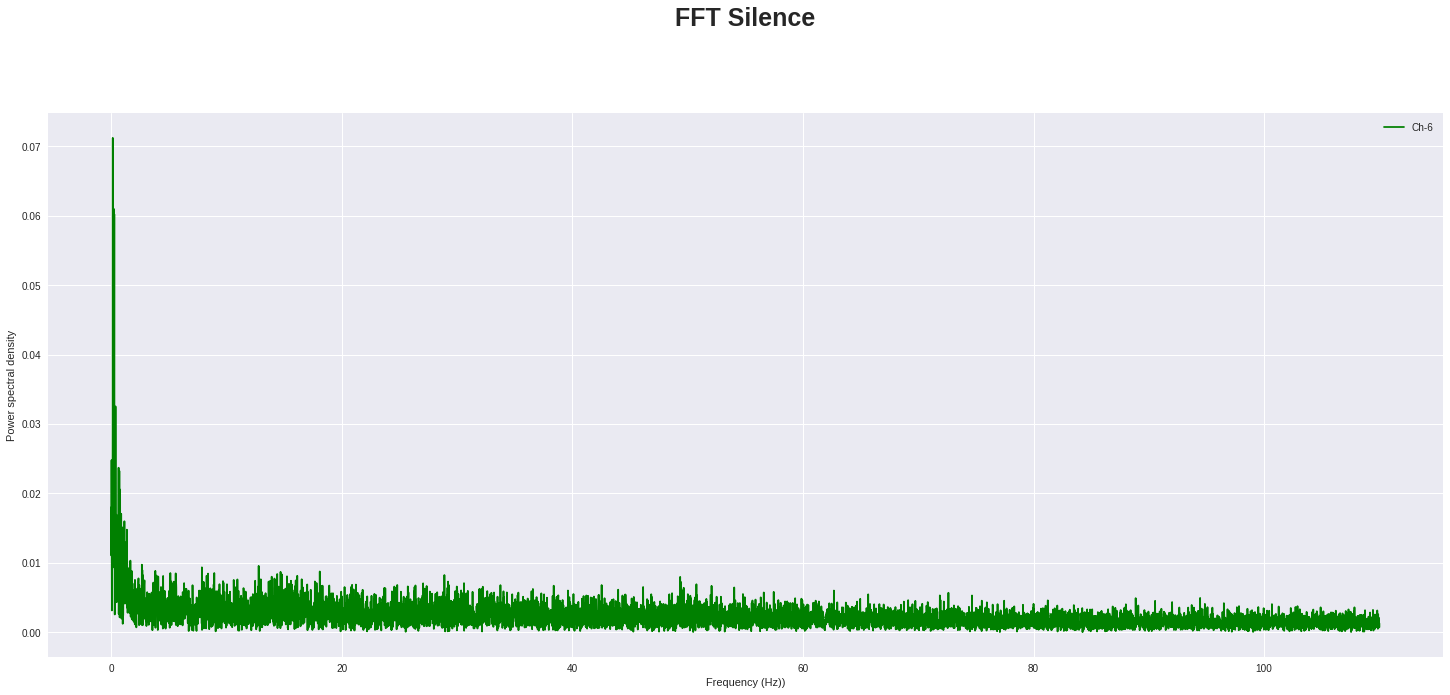

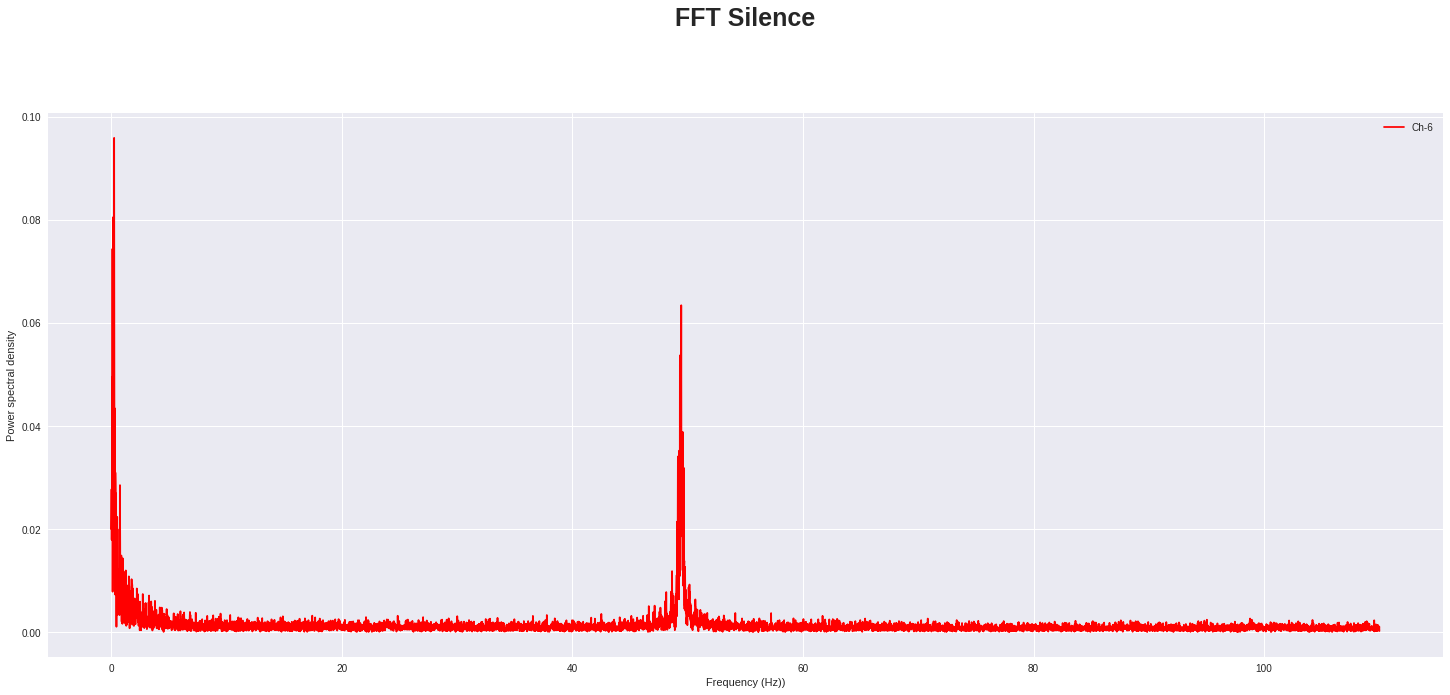

In [31]:
silence = df[df['Key'] == 'silence']  # select the rows with silence (noise)
# Number of sample points
N = silence.shape[0]
# sample spacing
T = 1.0 / 220.0
x = np.linspace(0.0, N*T, N)
# y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
for index, ch in enumerate(labels):
    y = silence[ch]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    plt.figure(figsize=(25, 10))
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), color=color[index], label=ch)
    plt.xlabel('Frequency (Hz))')
    plt.ylabel('Power spectral density')
    plt.title('FFT Silence', fontdict=font, y=1.15)
    plt.grid(True)
    plt.legend(labels)
    plt.show()

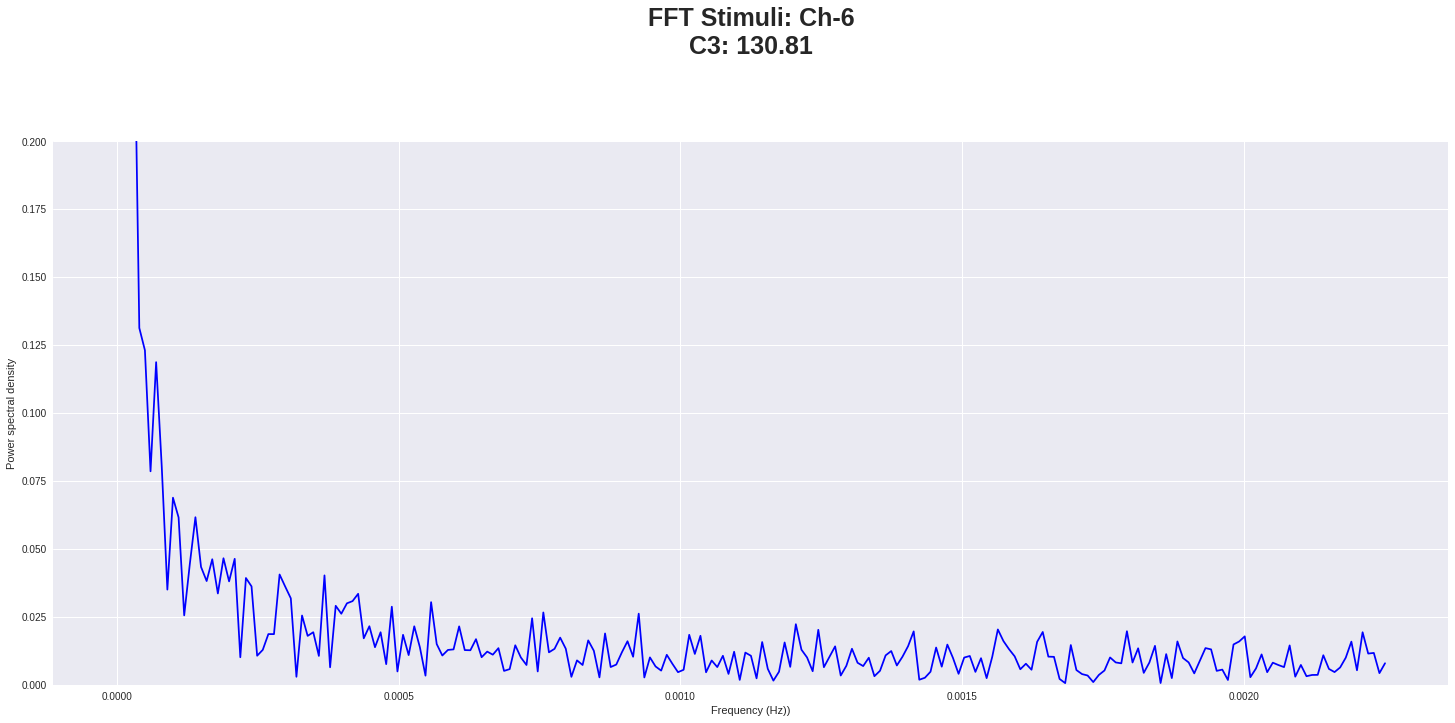

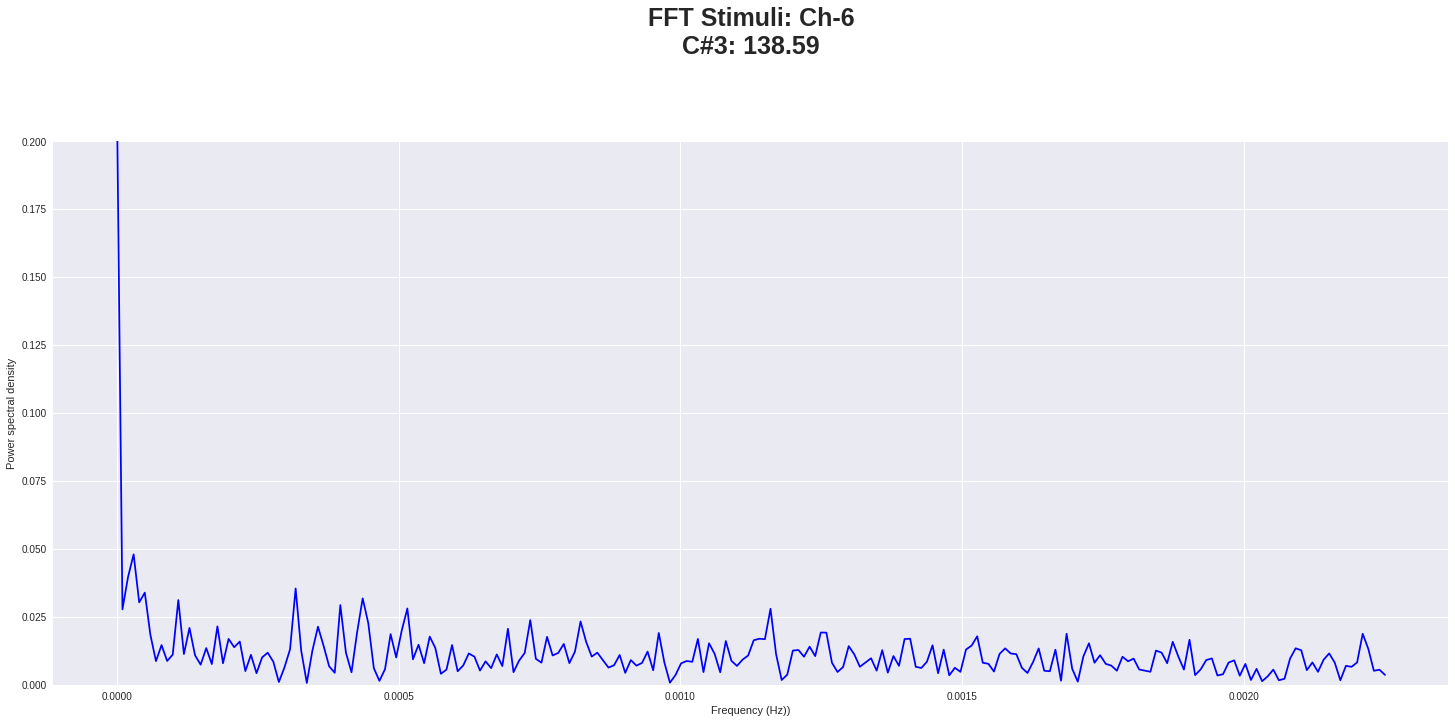

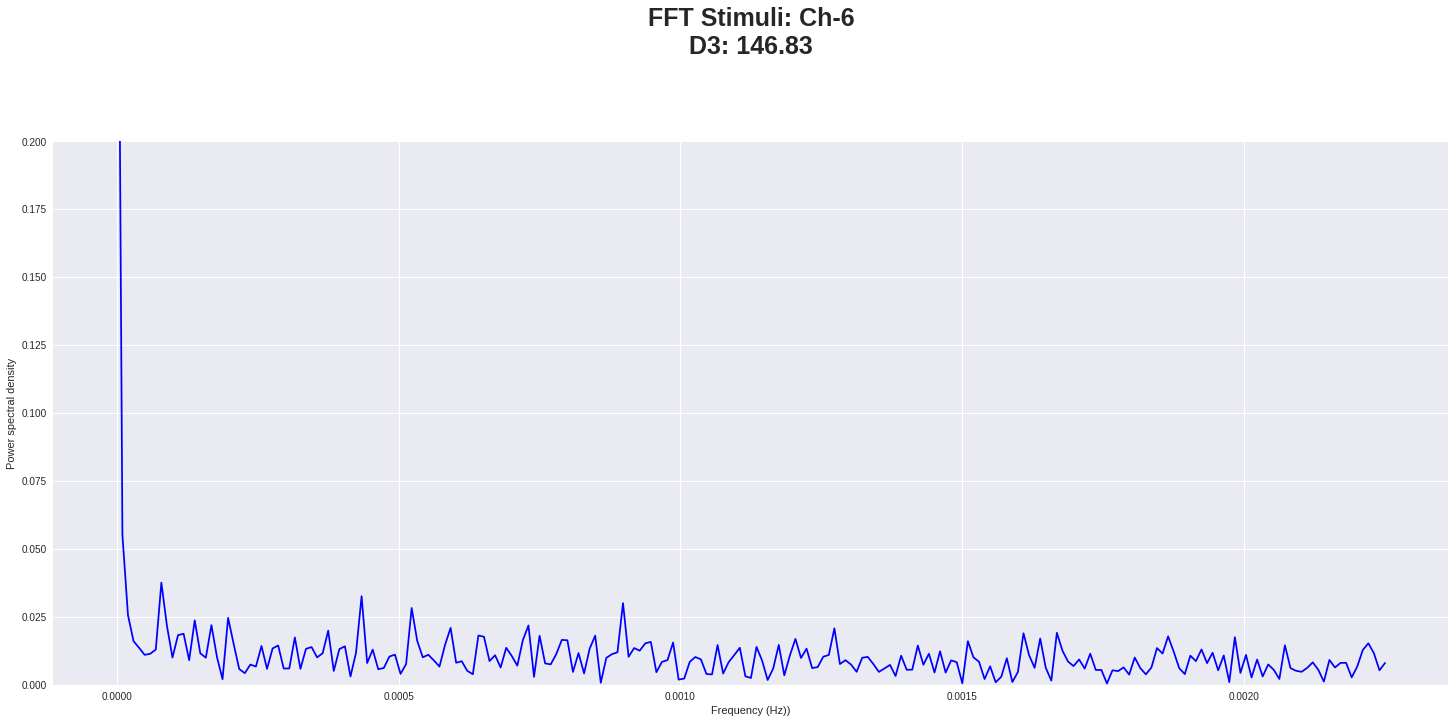

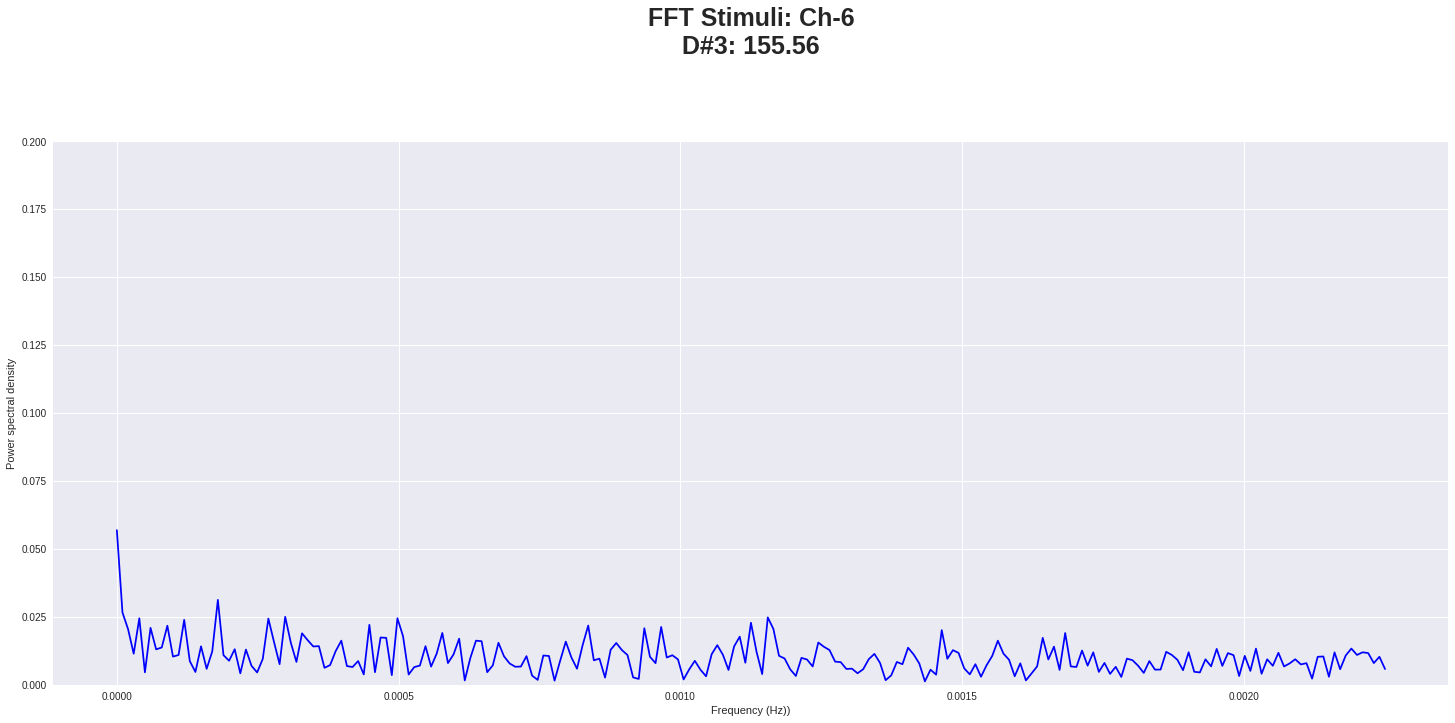

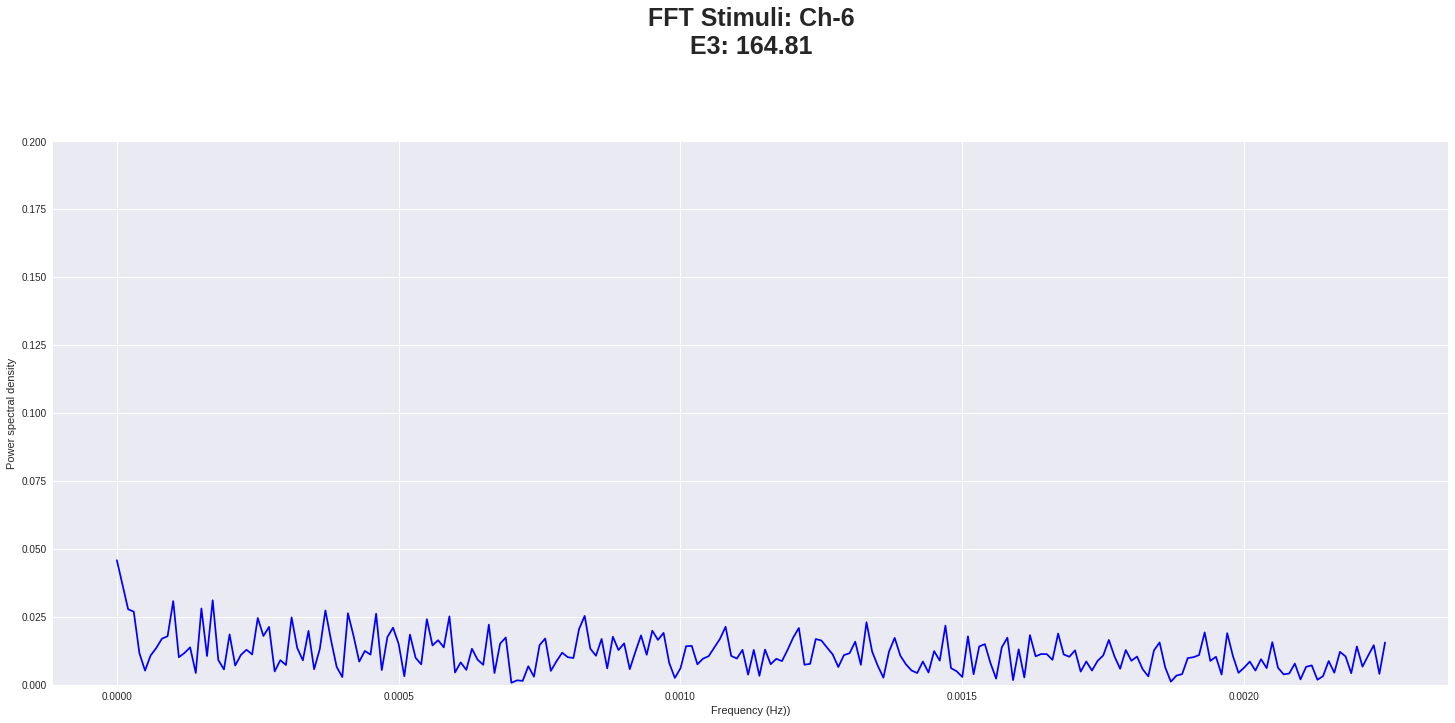

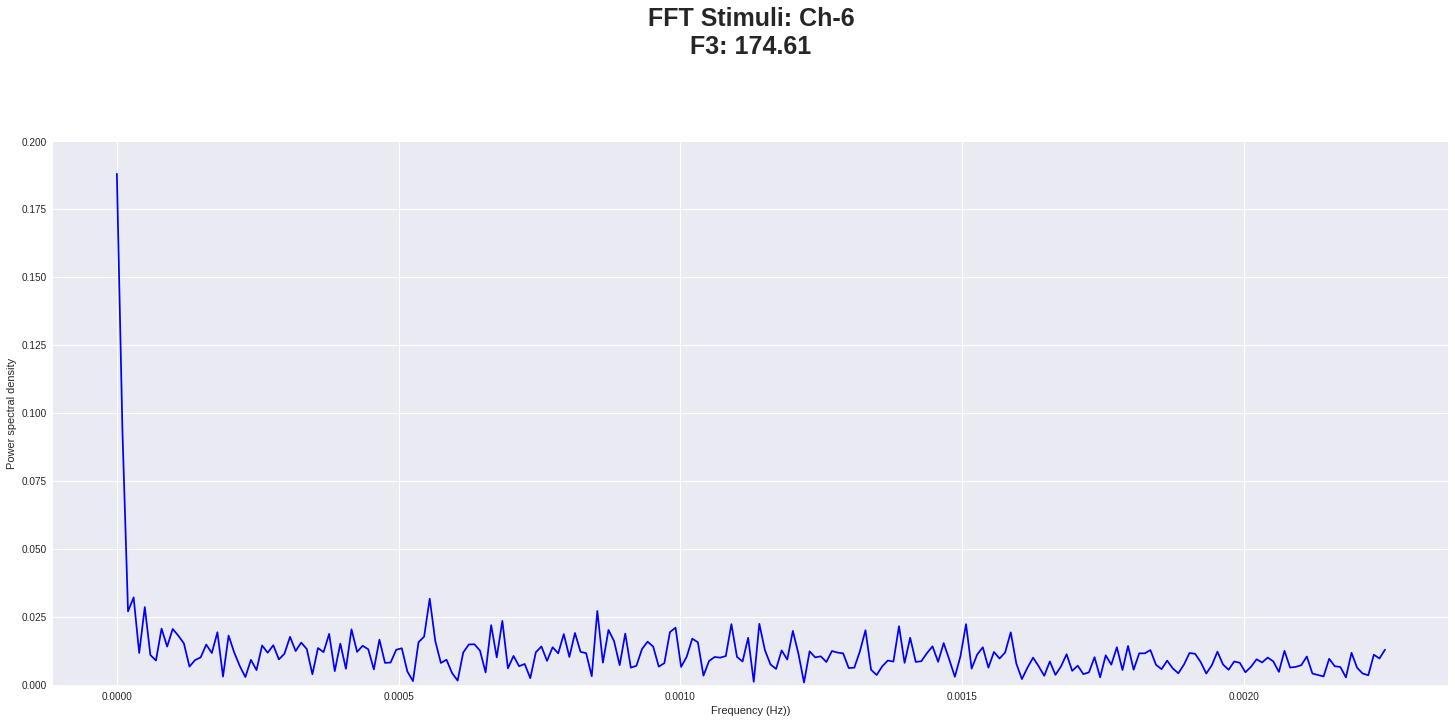

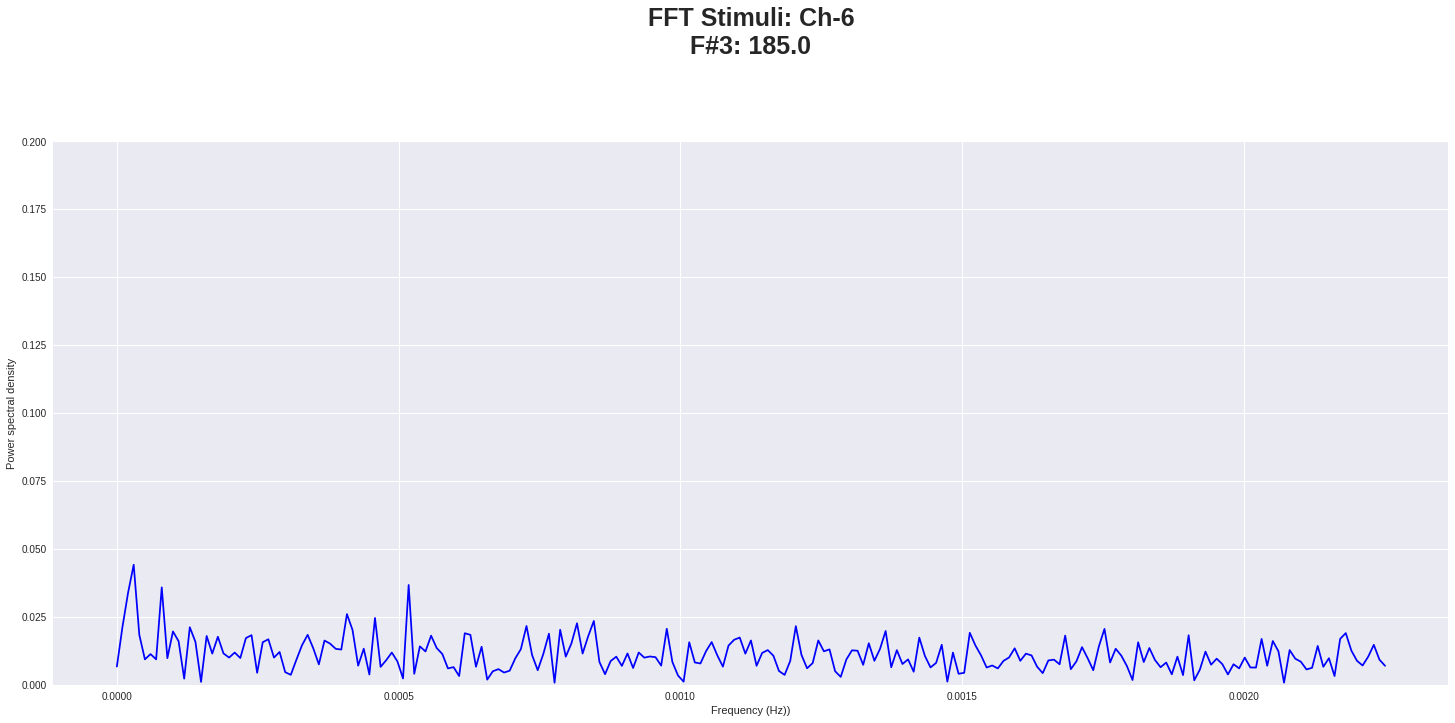

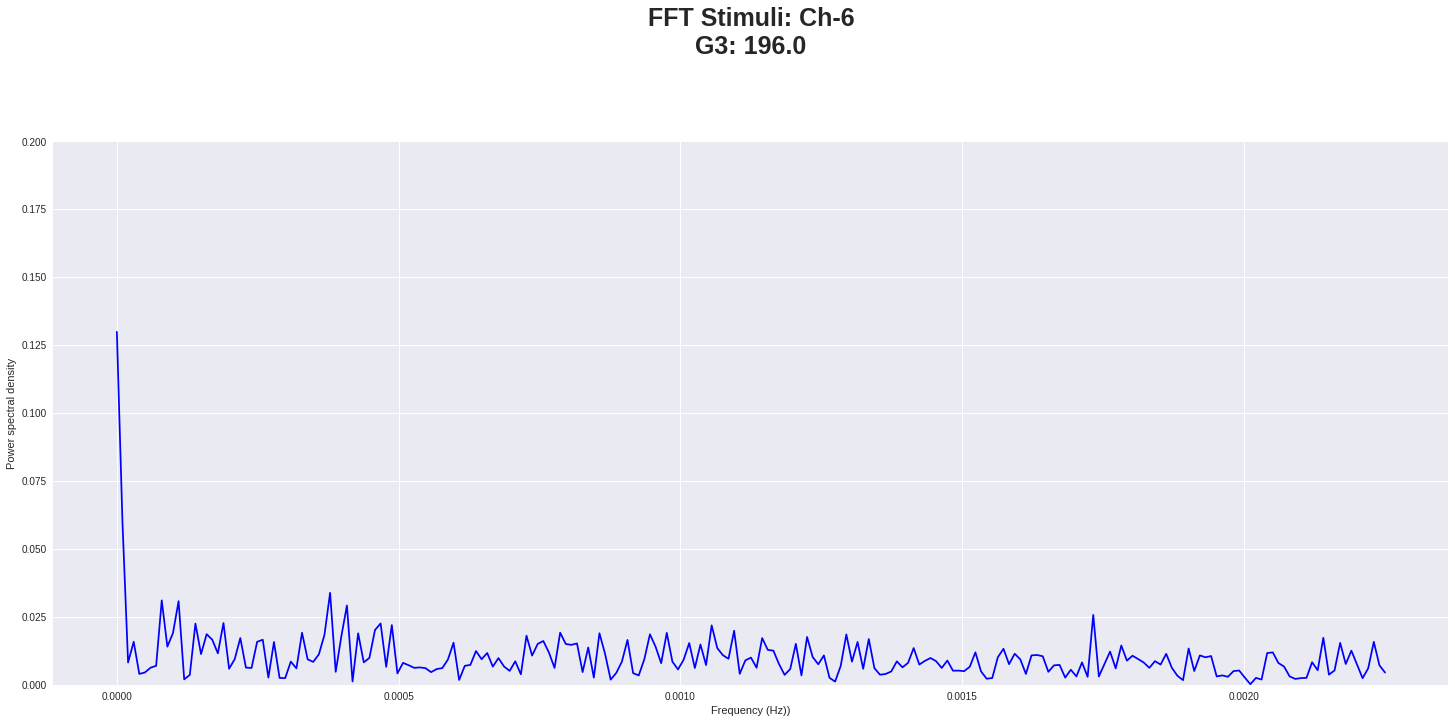

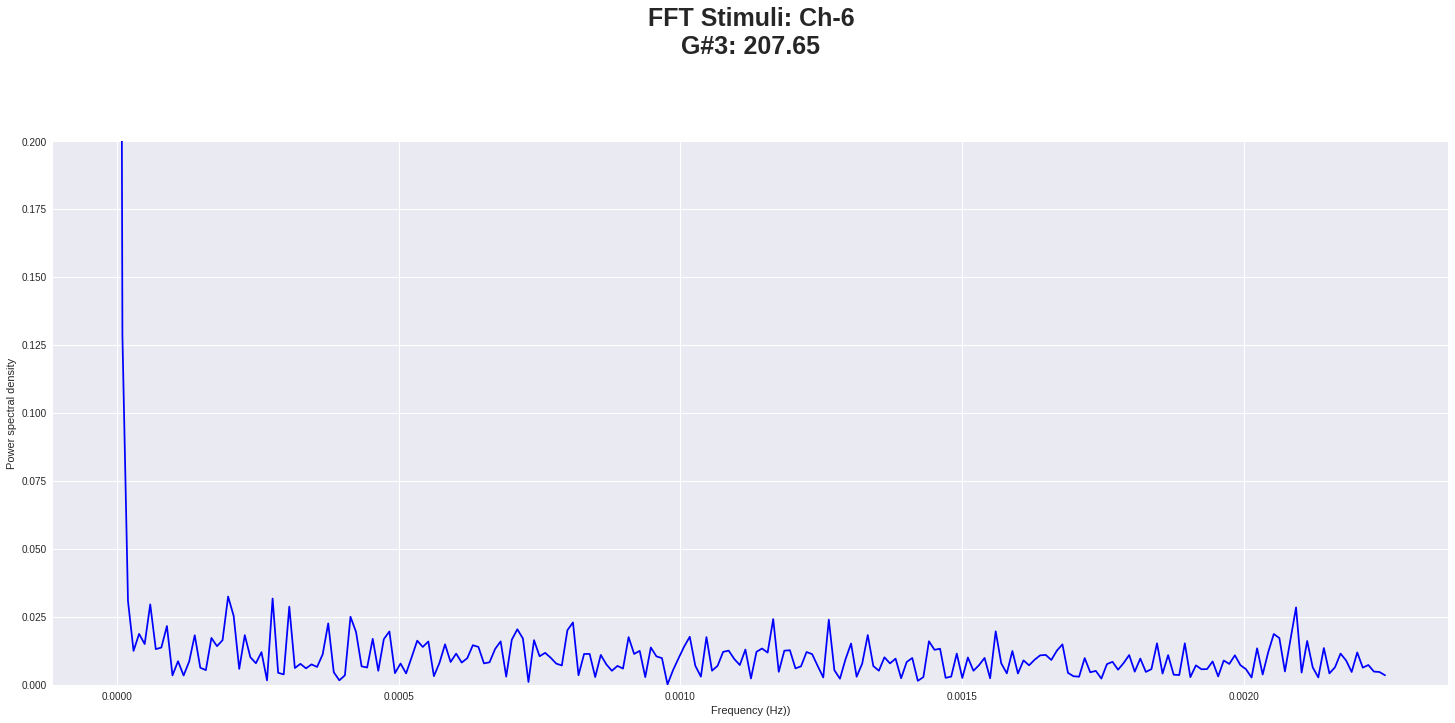

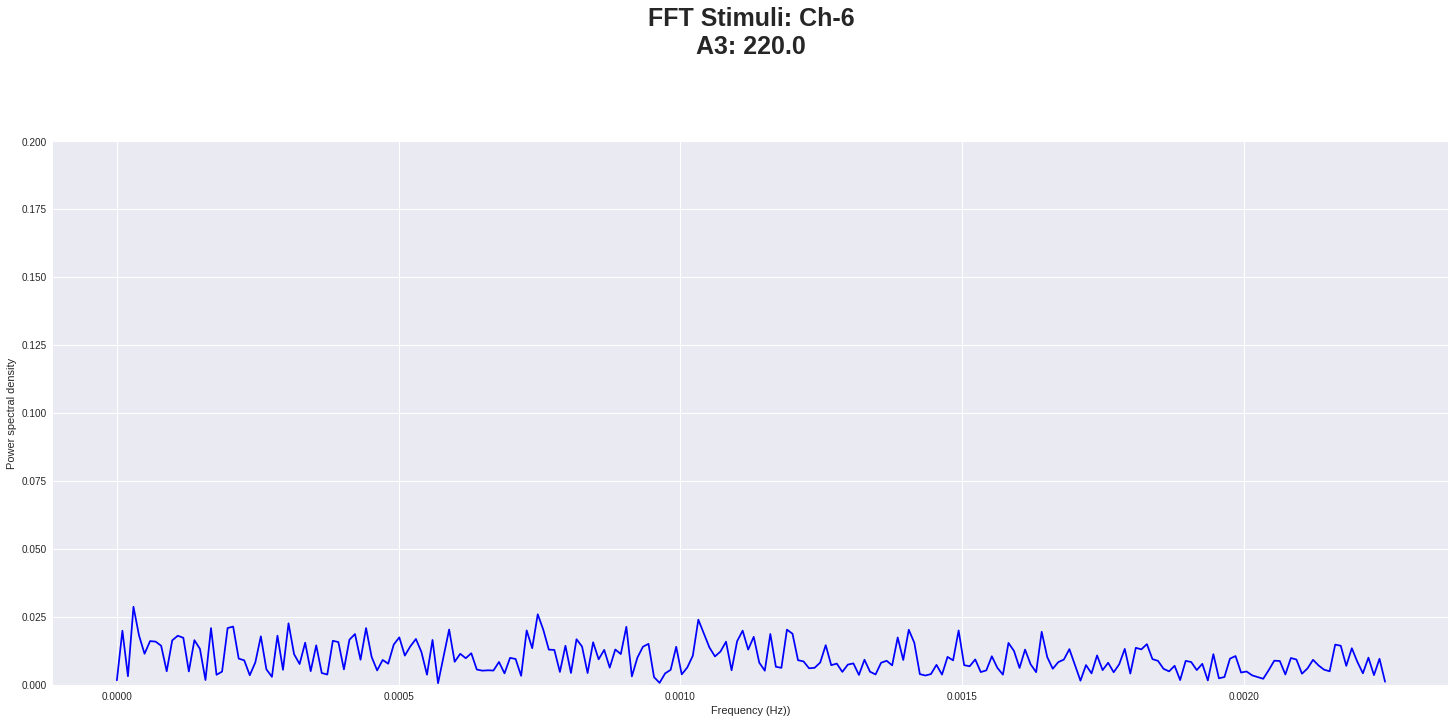

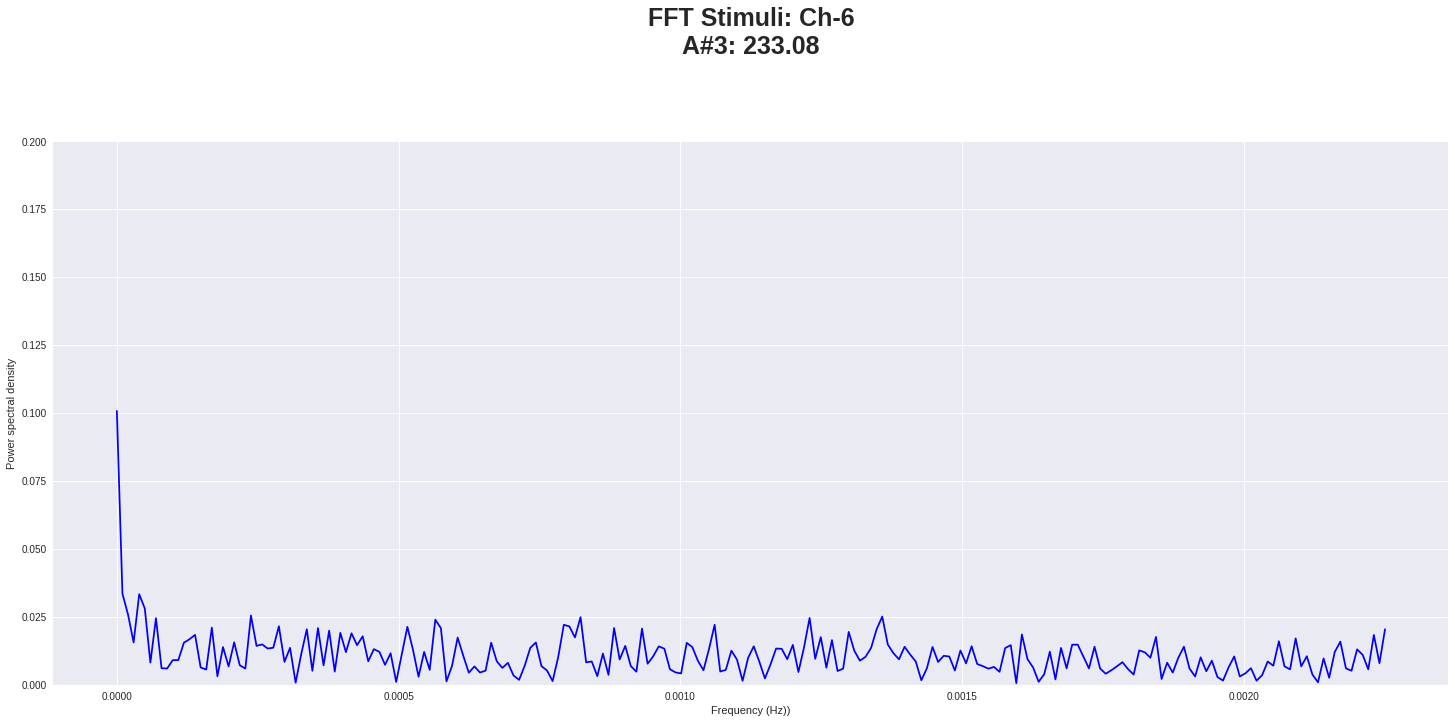

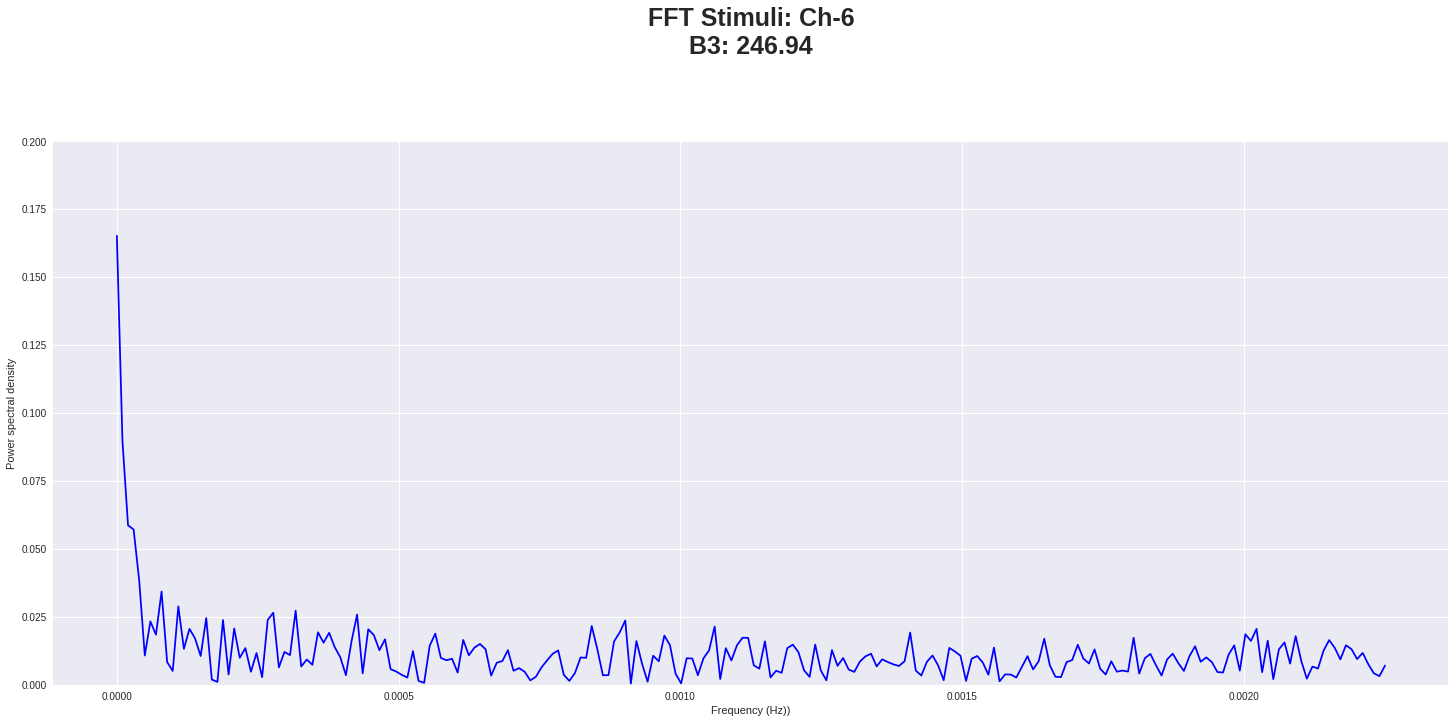

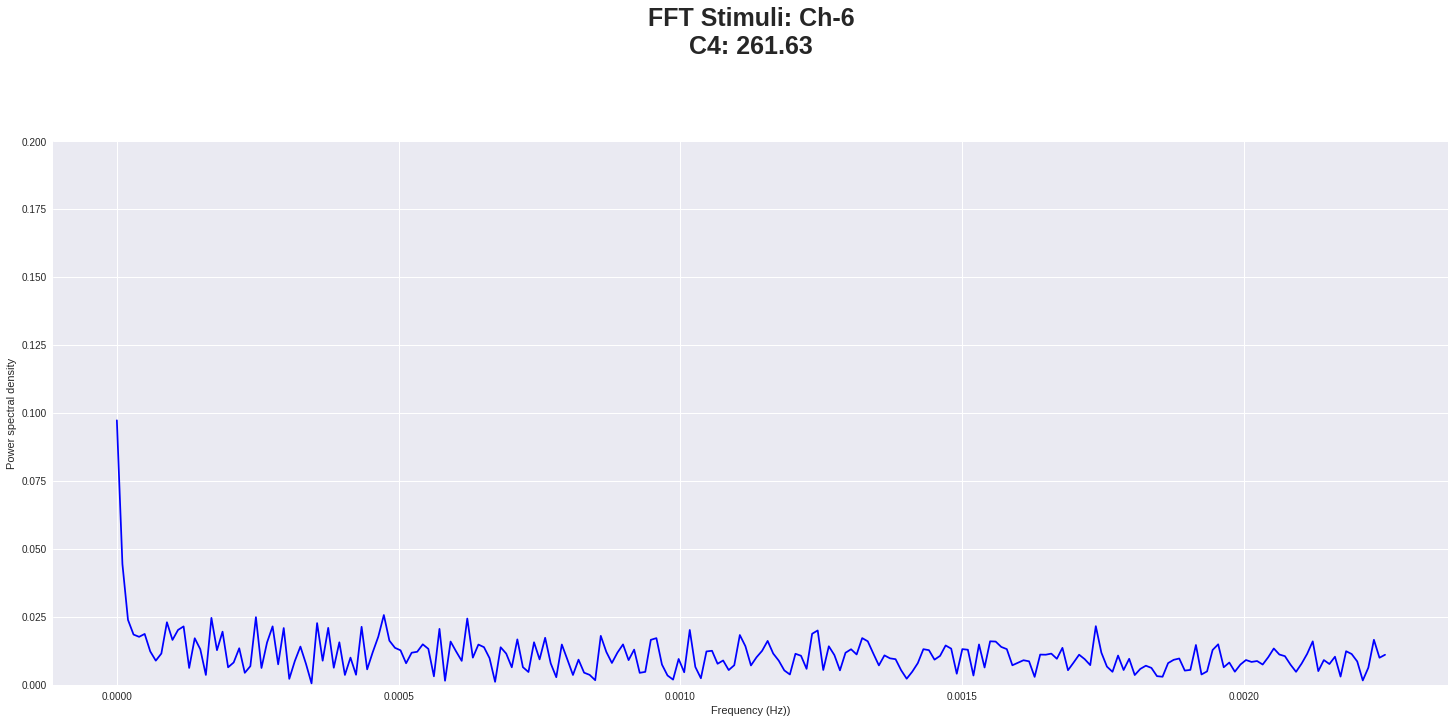

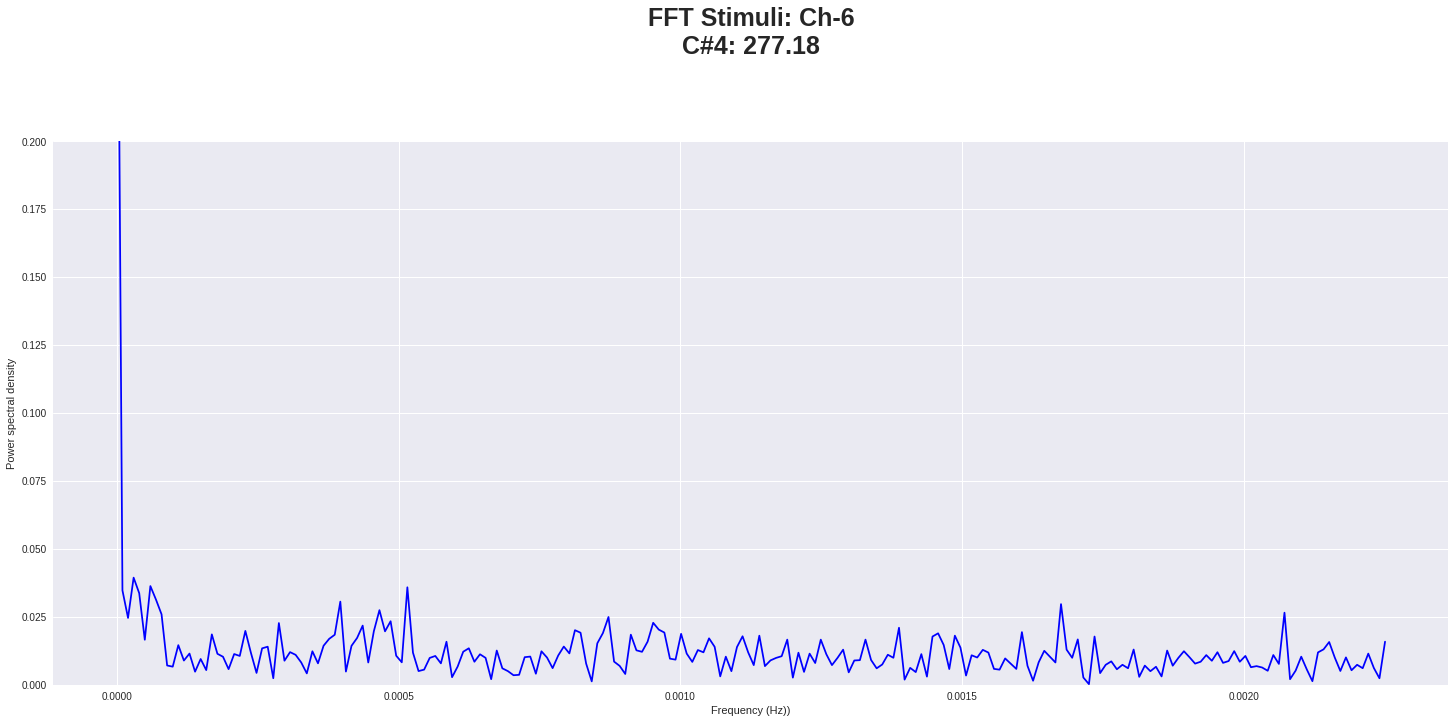

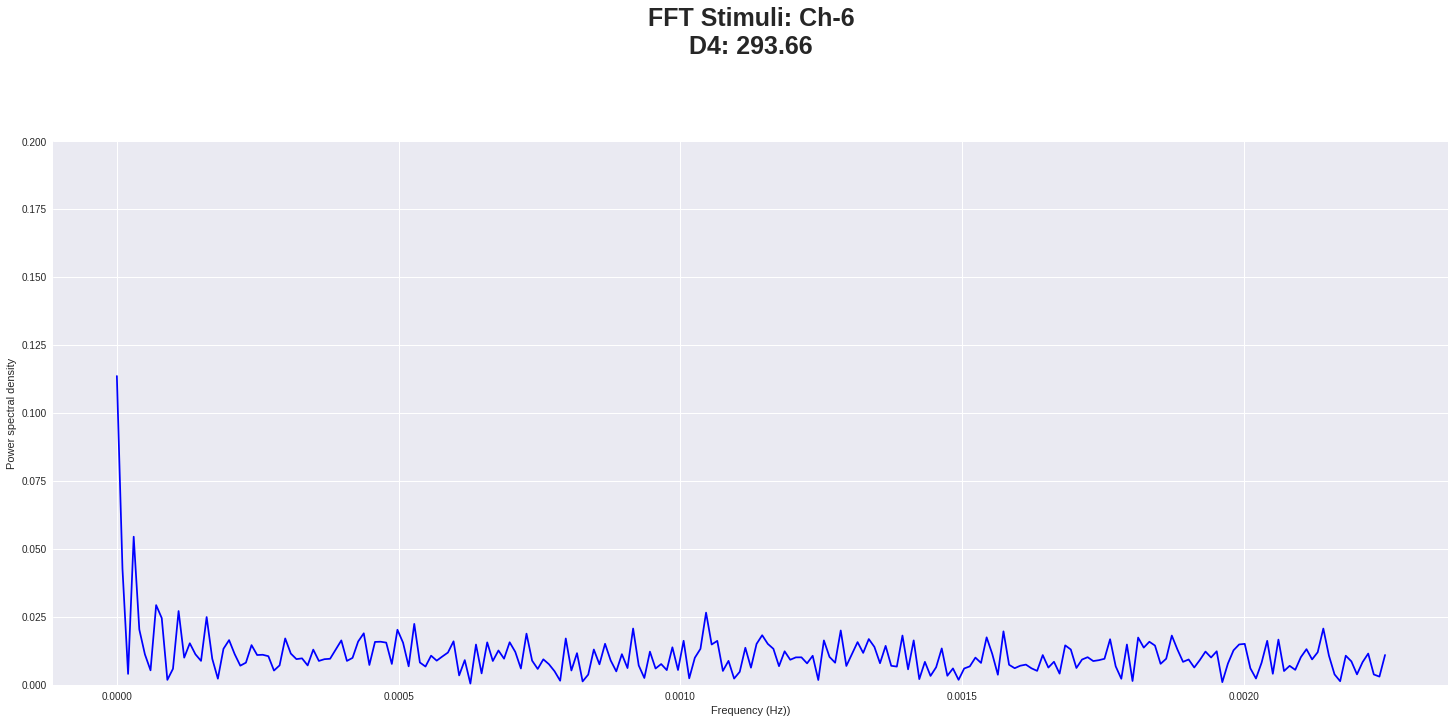

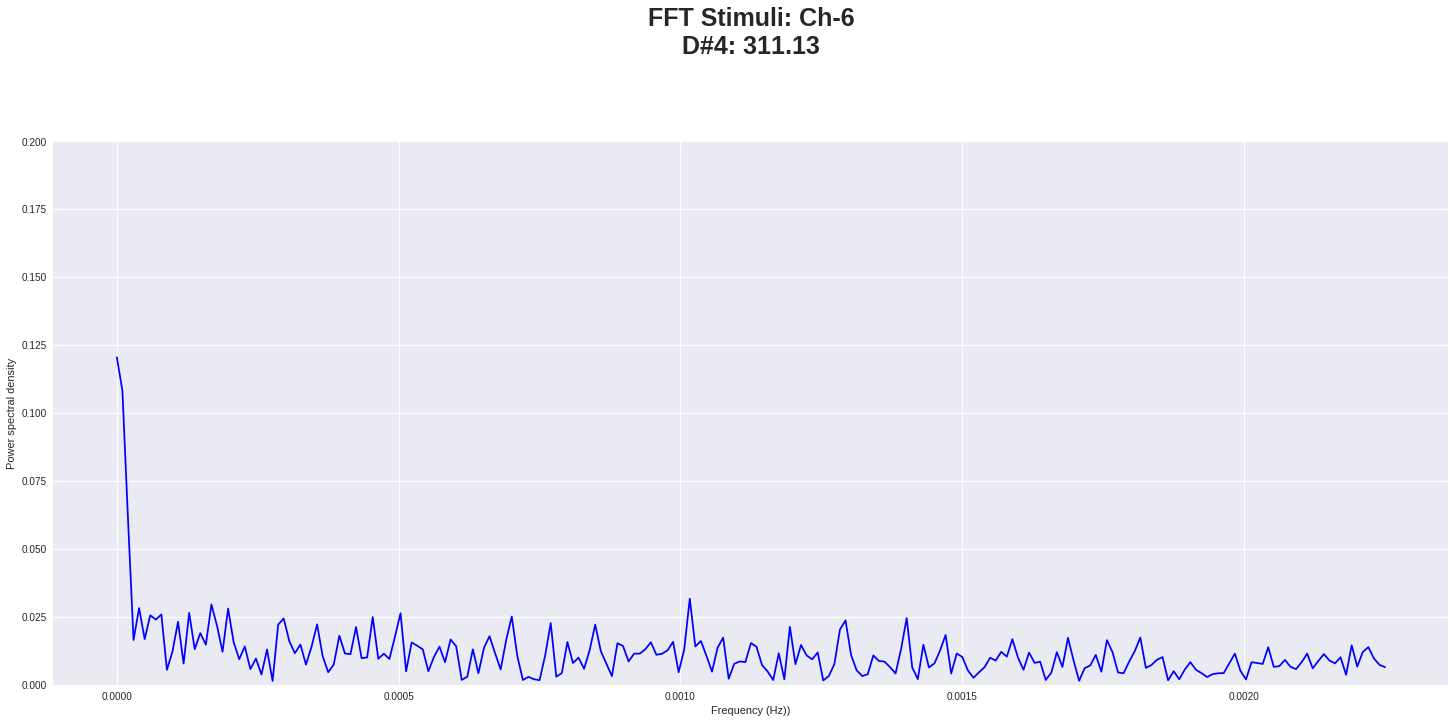

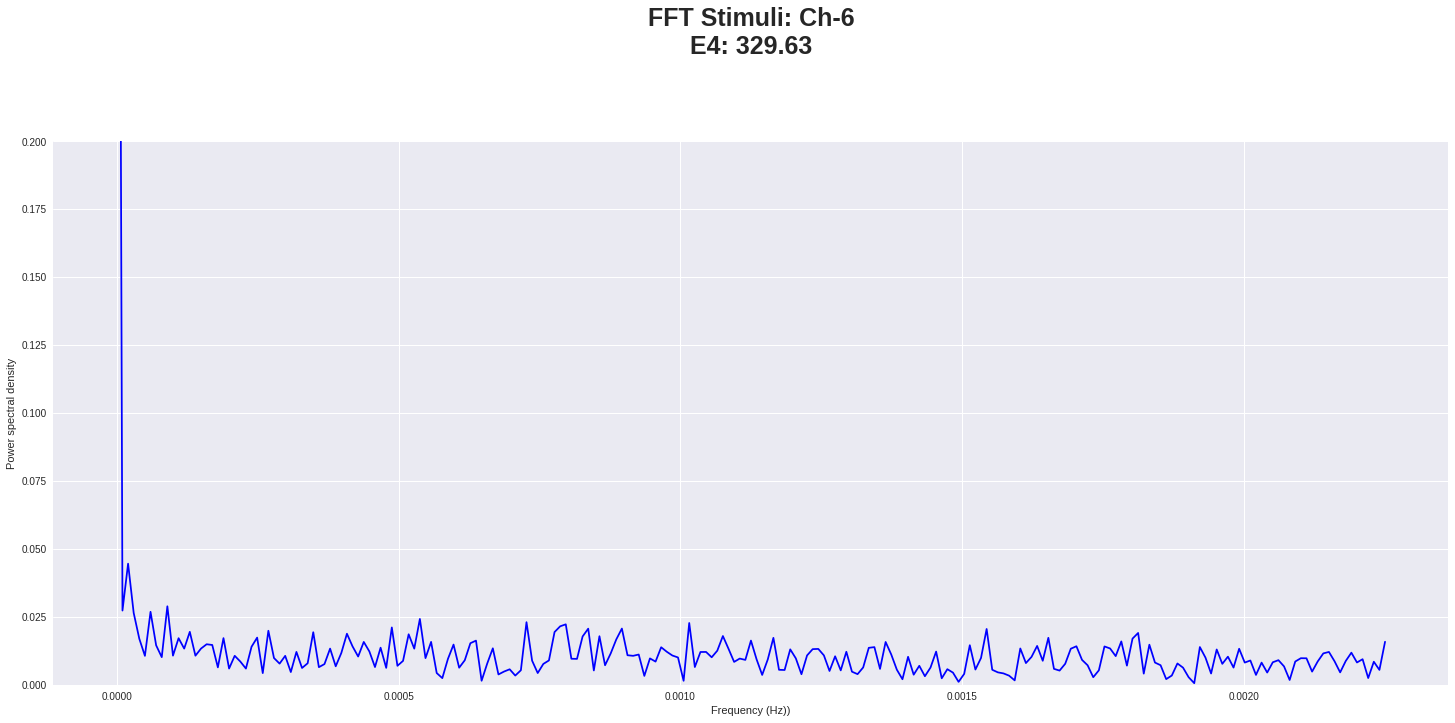

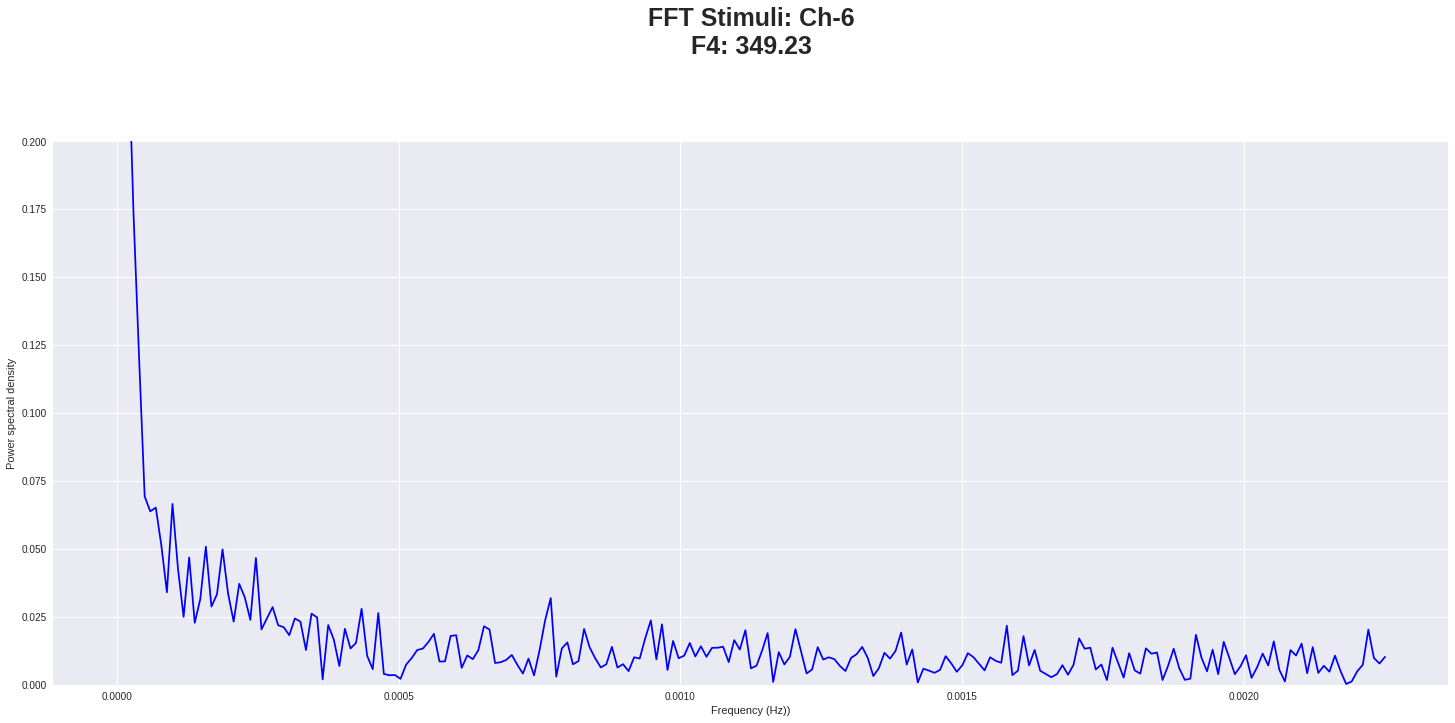

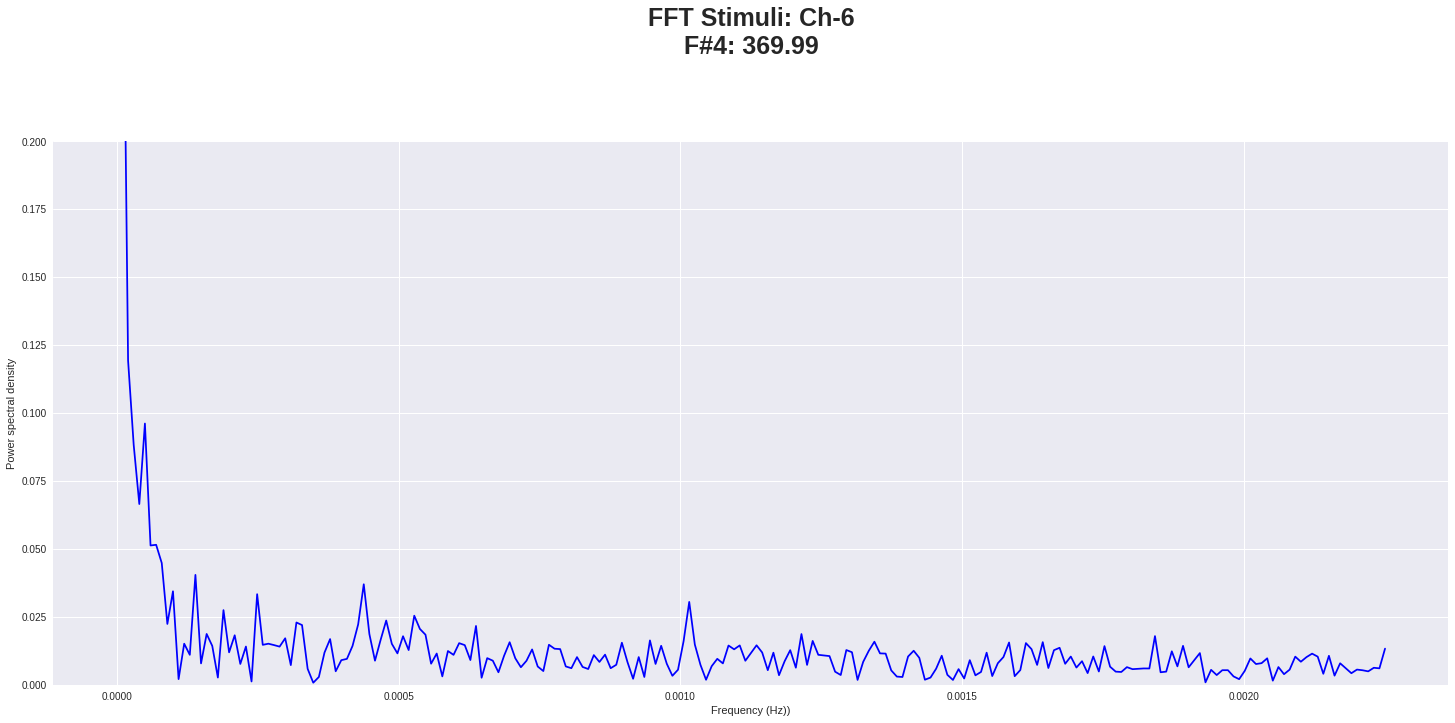

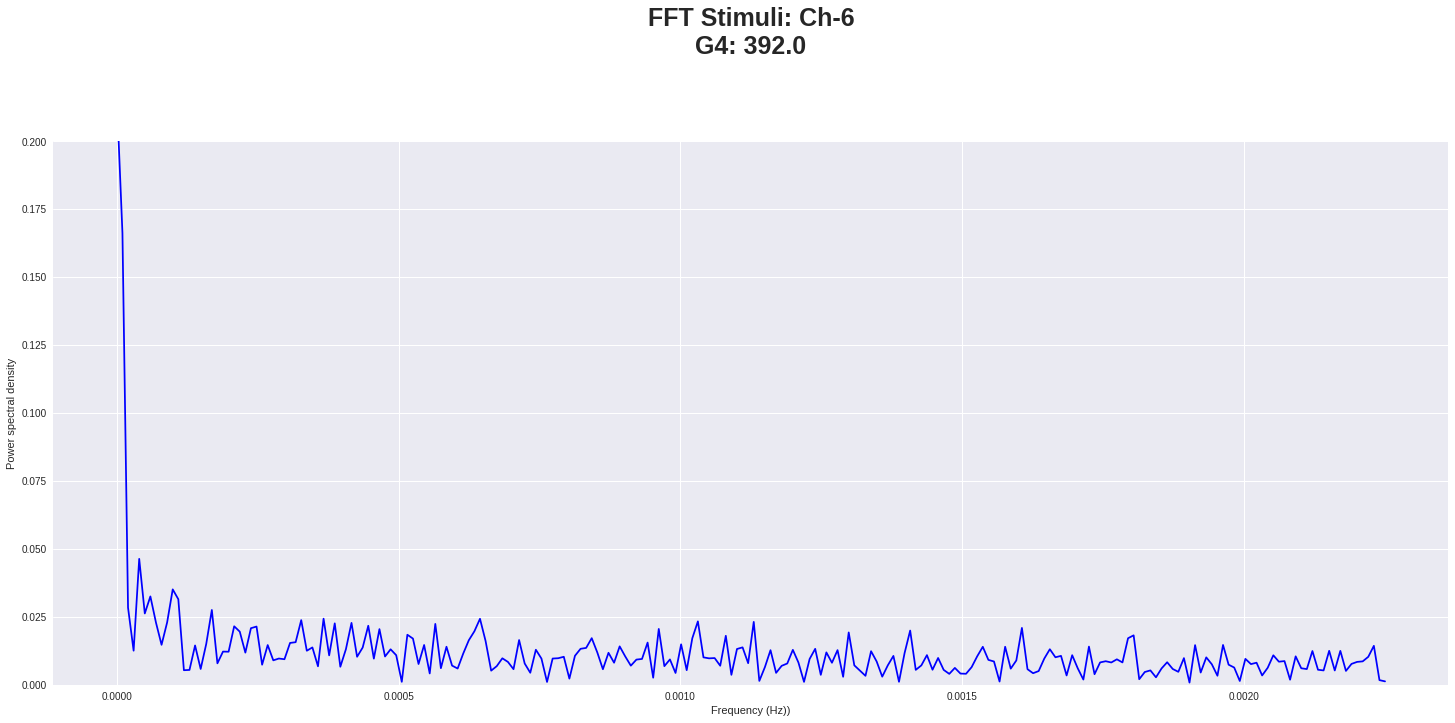

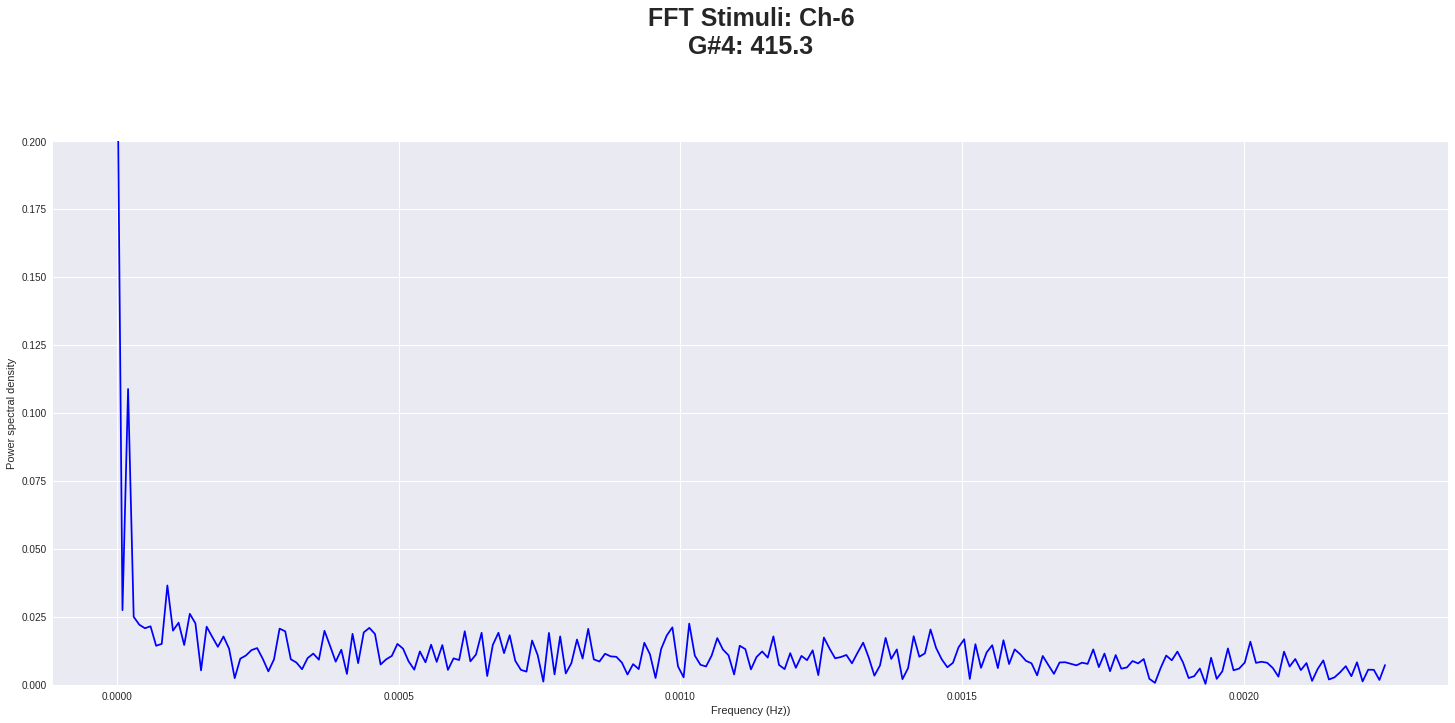

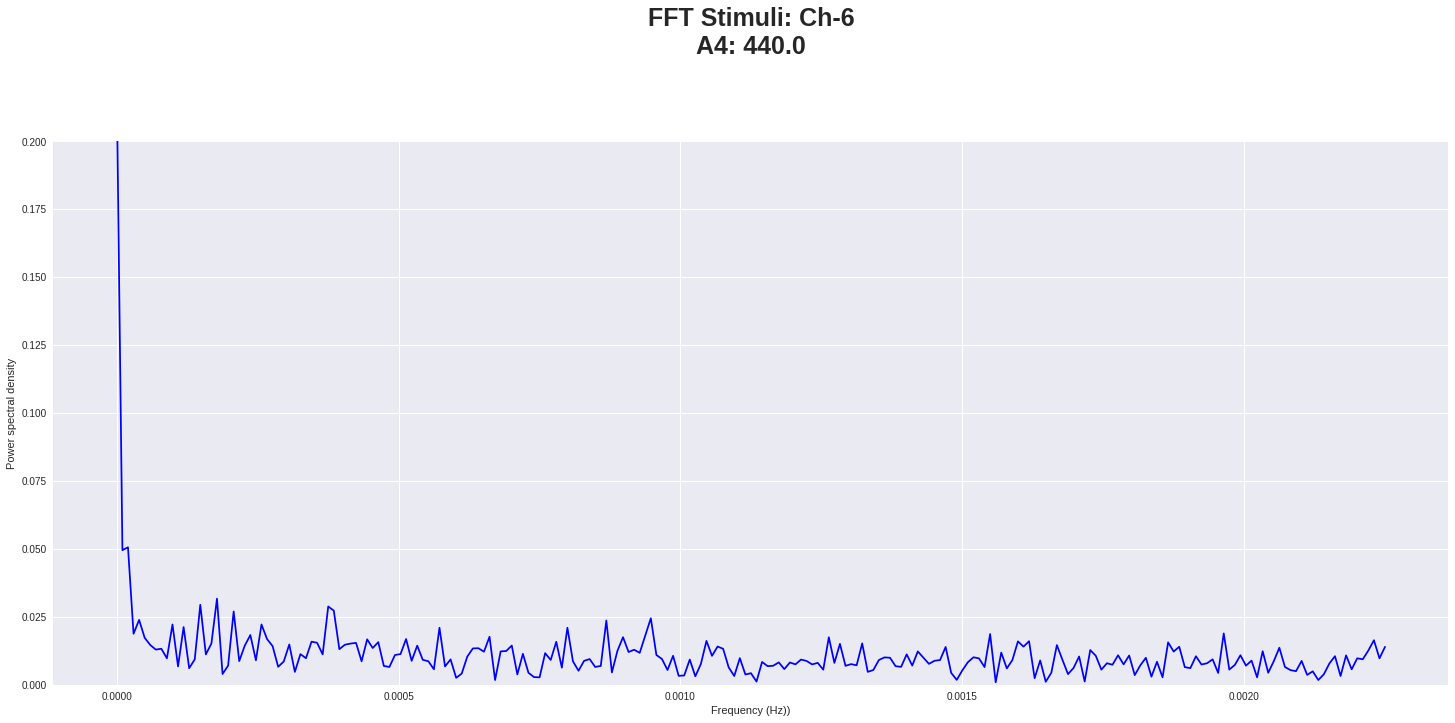

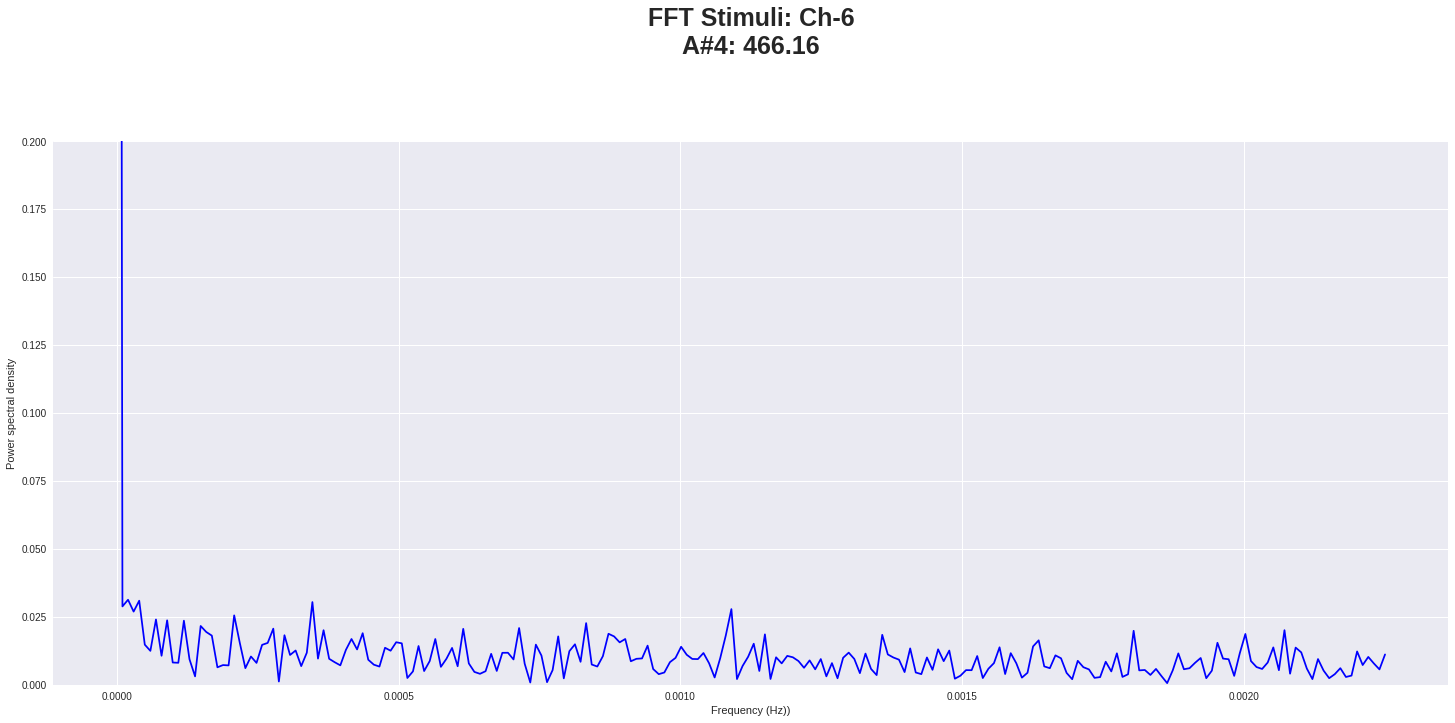

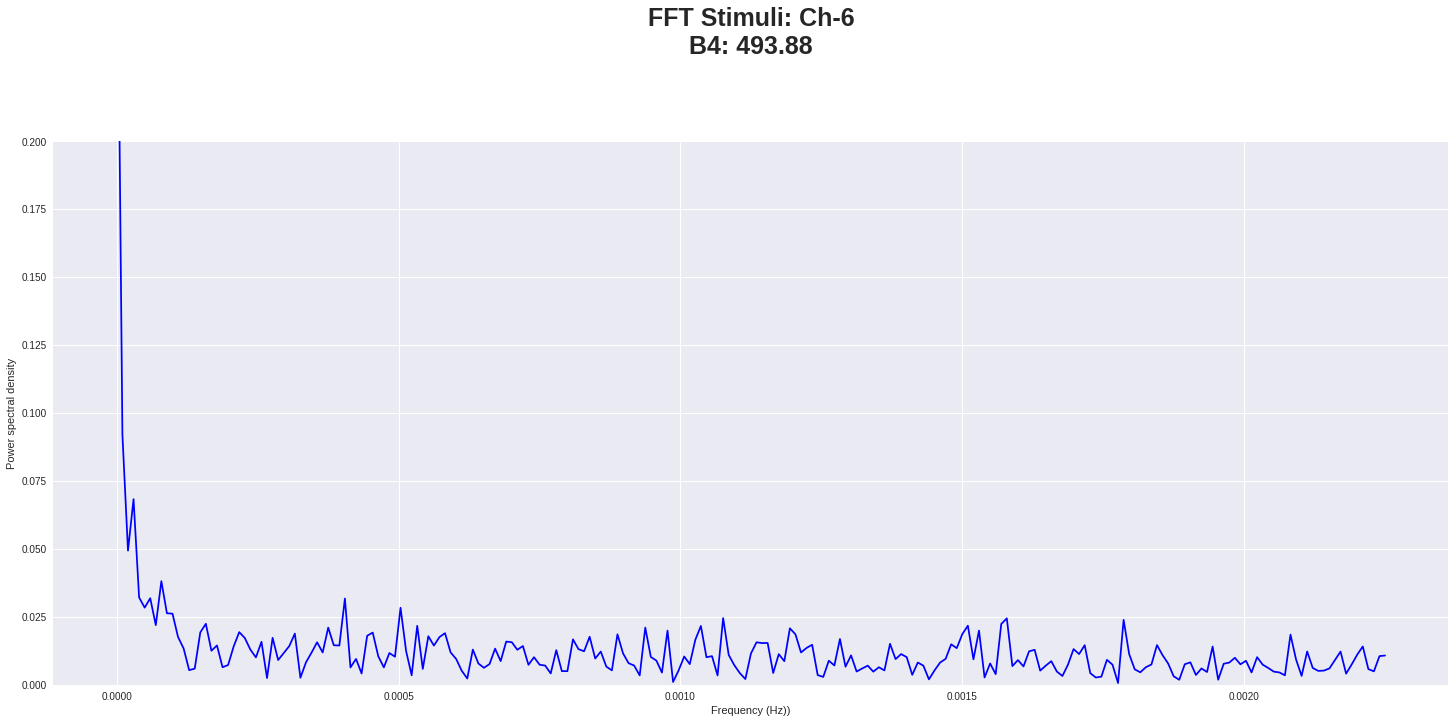

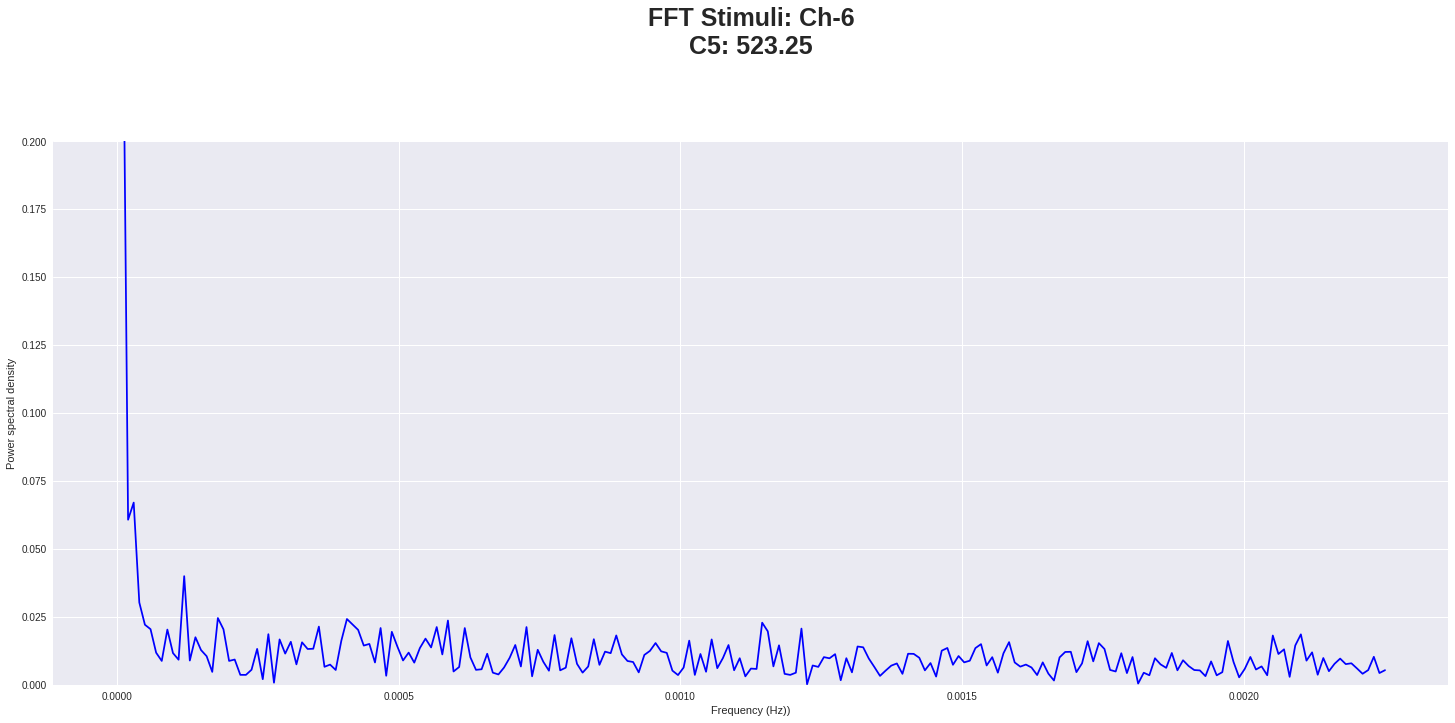

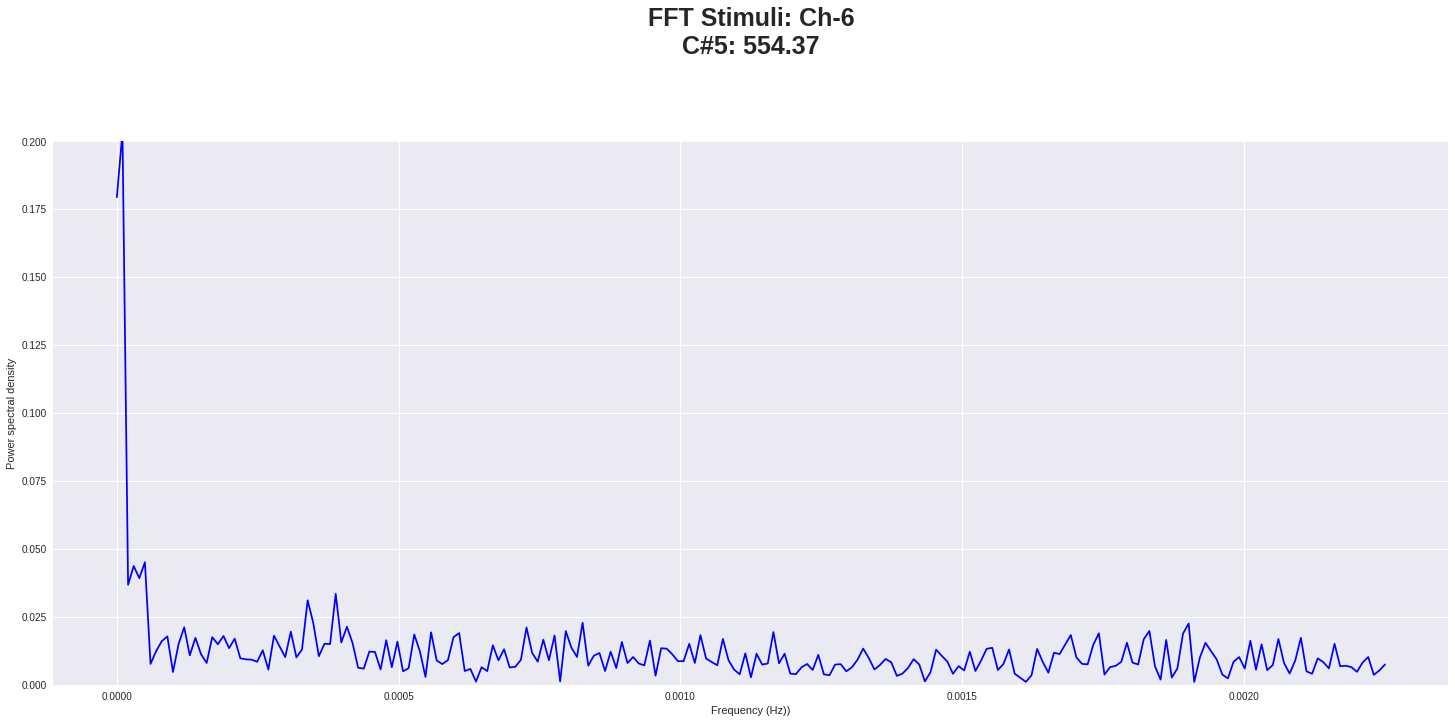

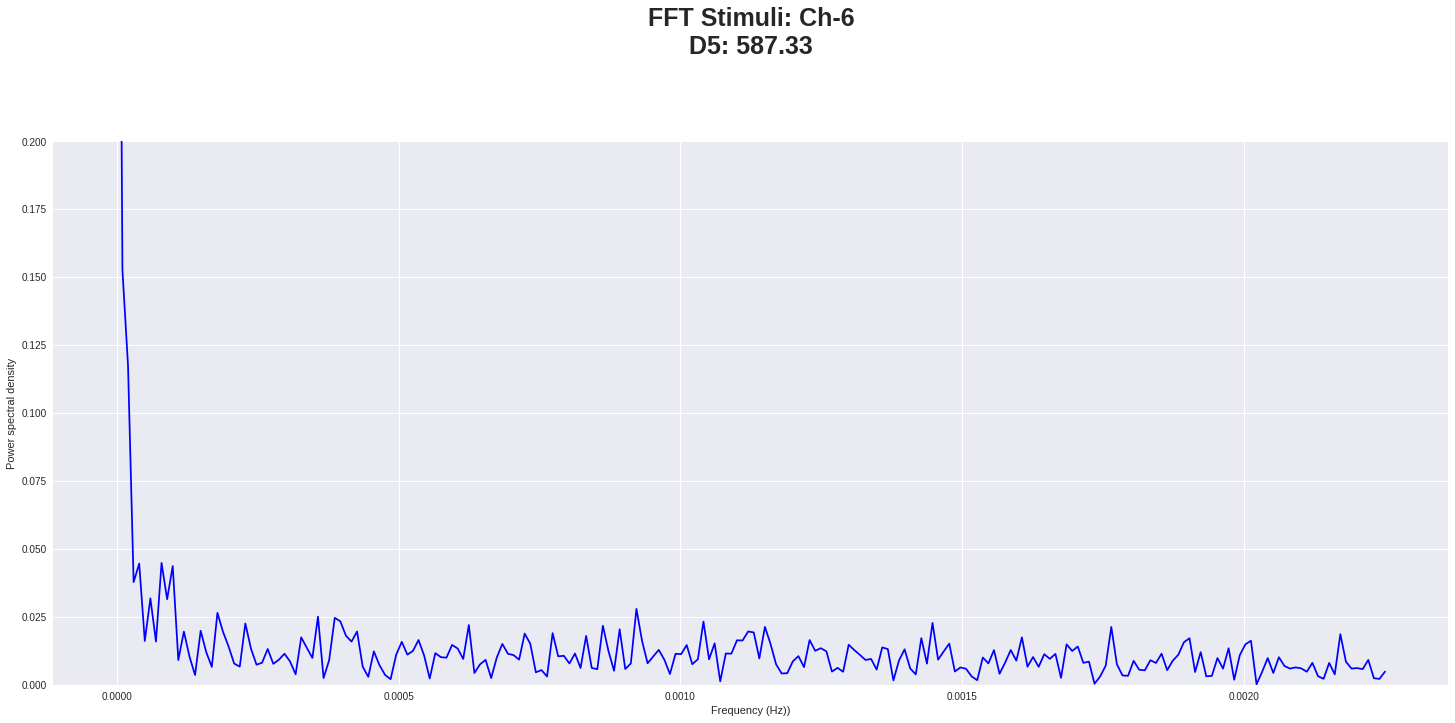

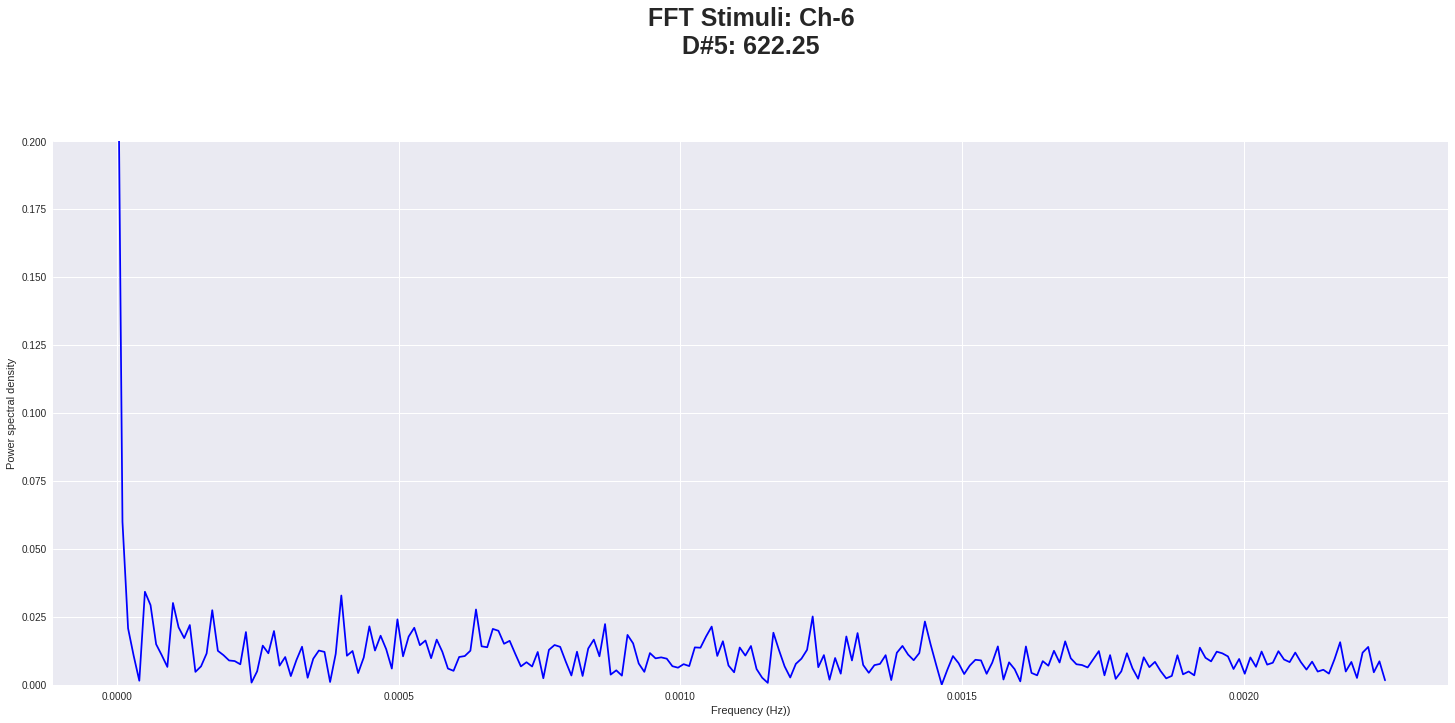

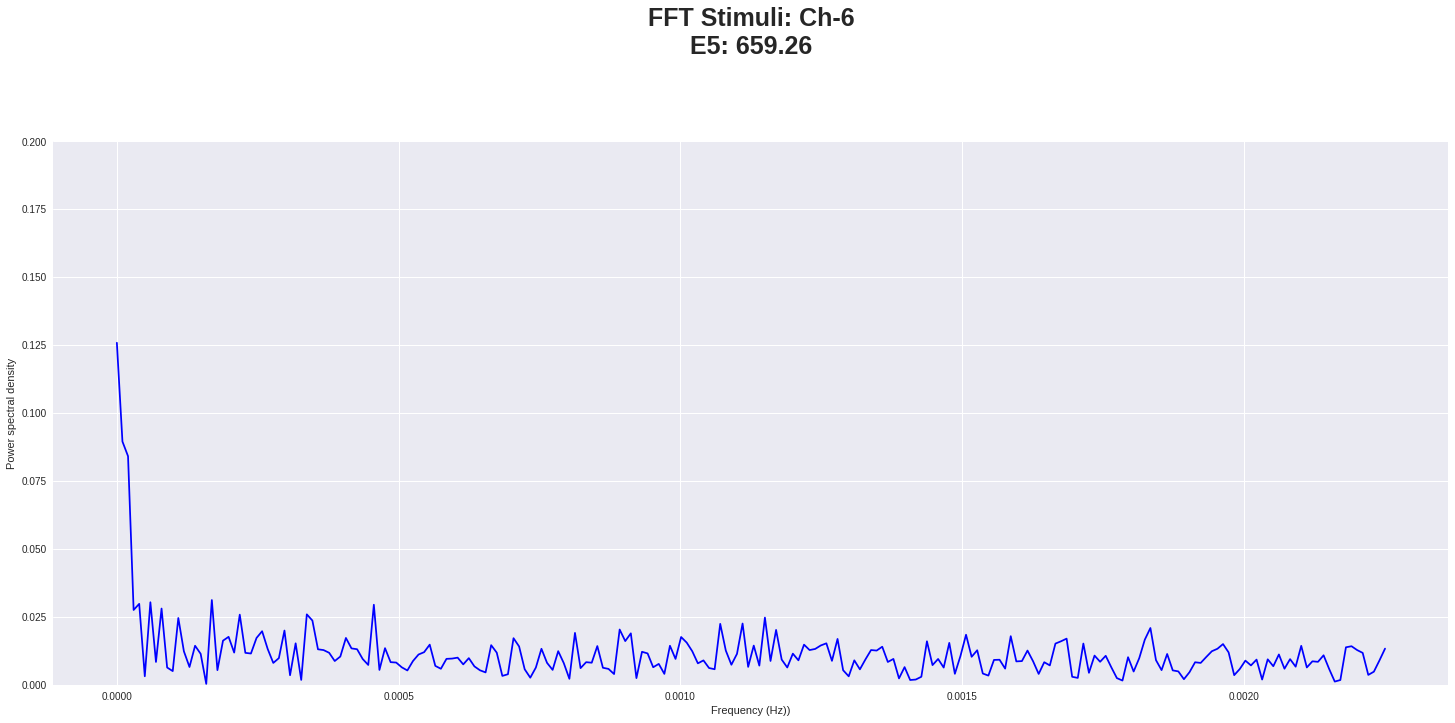

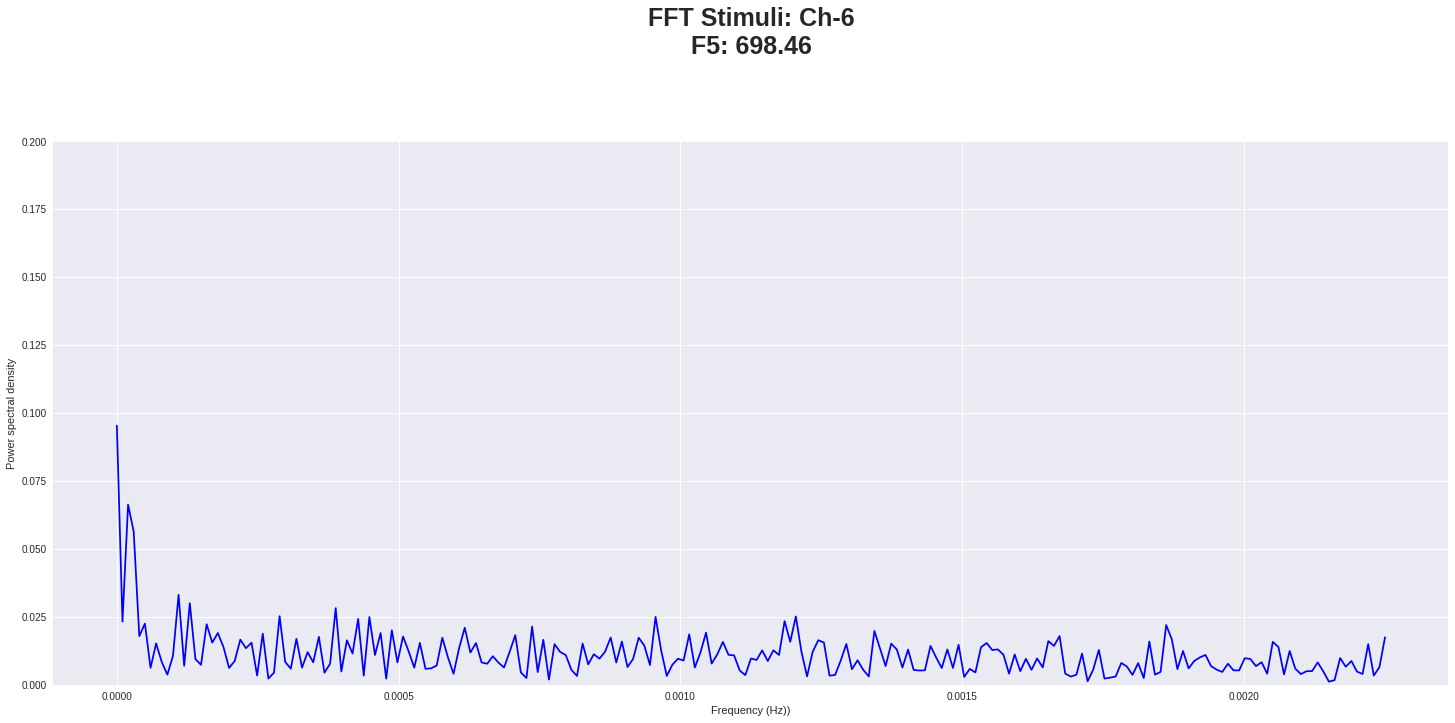

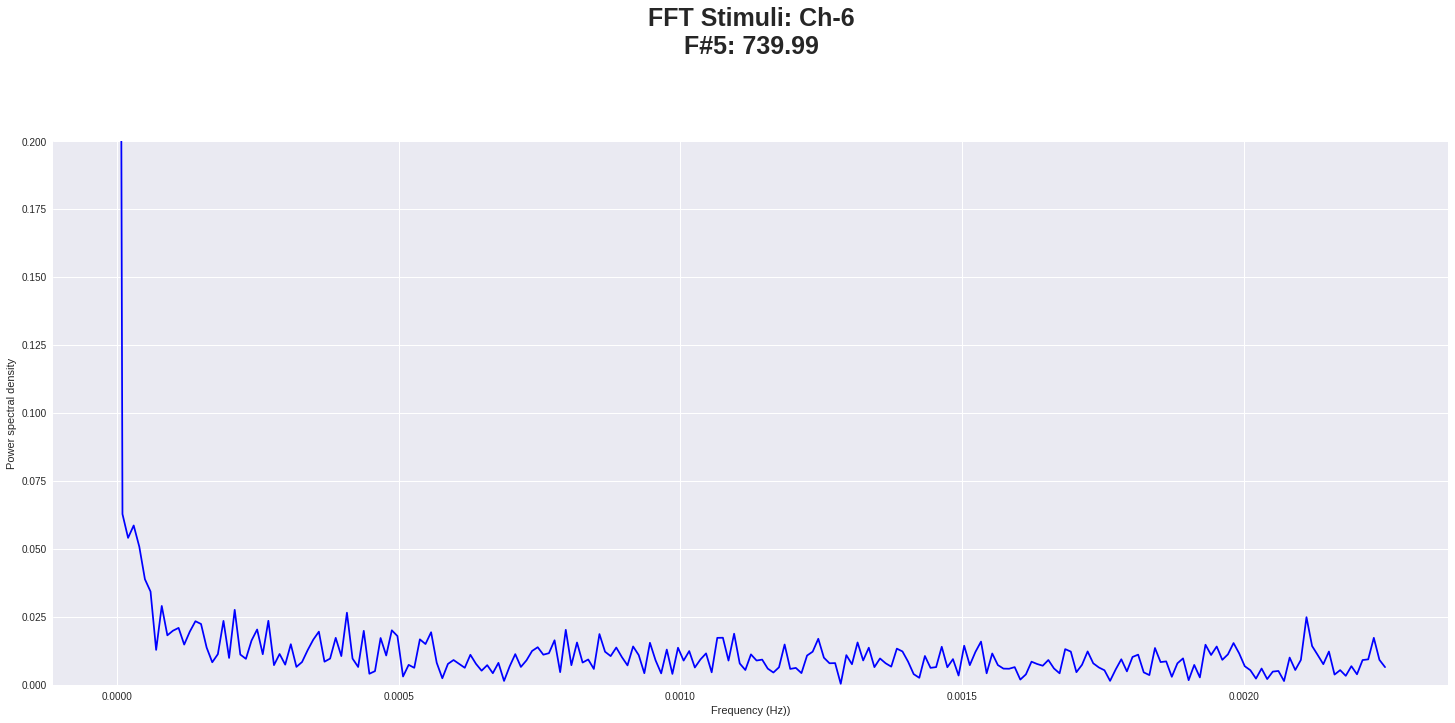

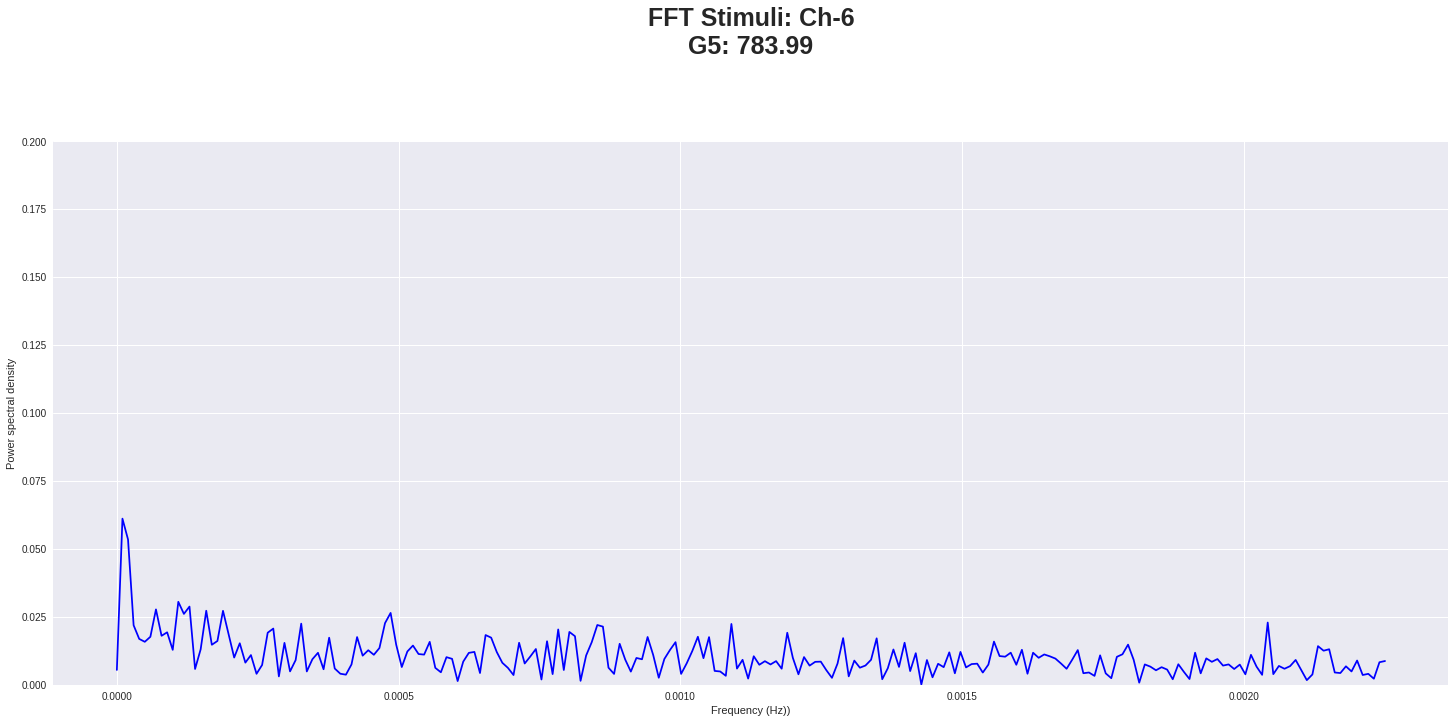

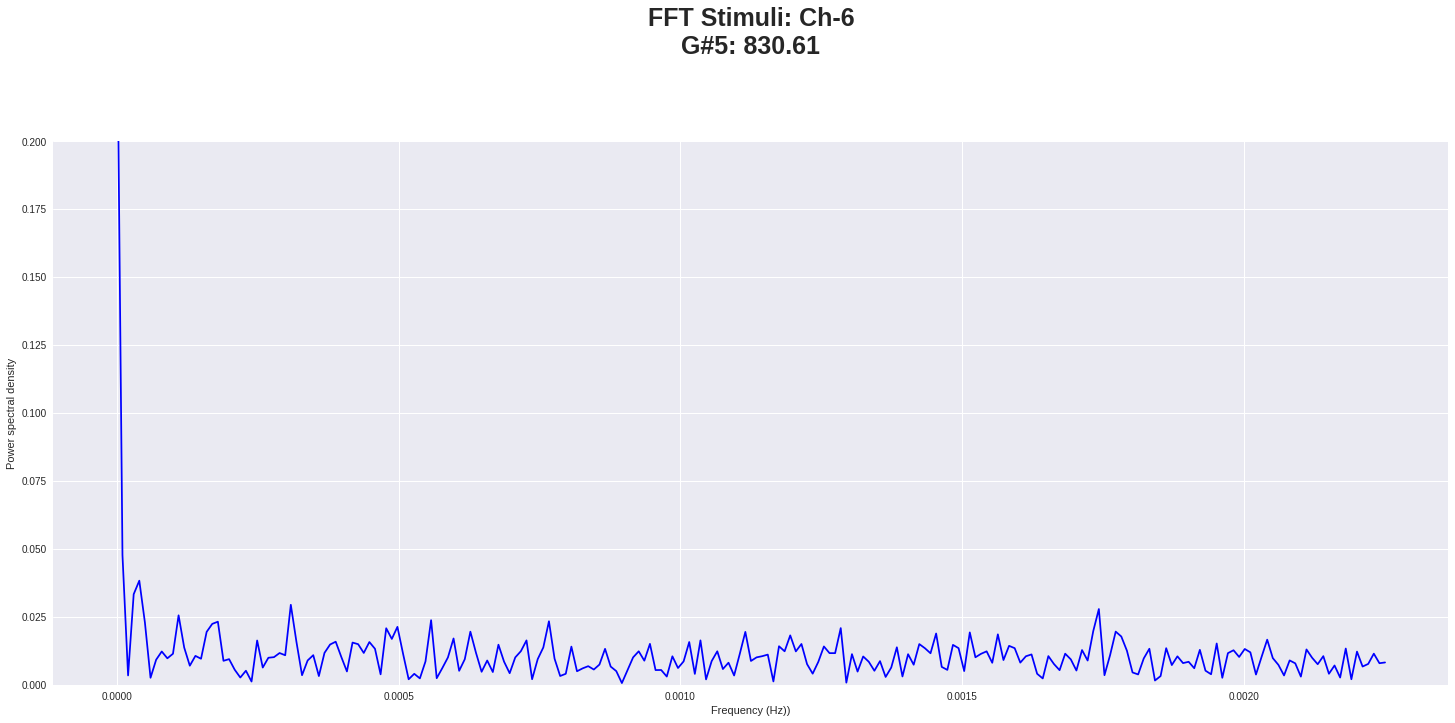

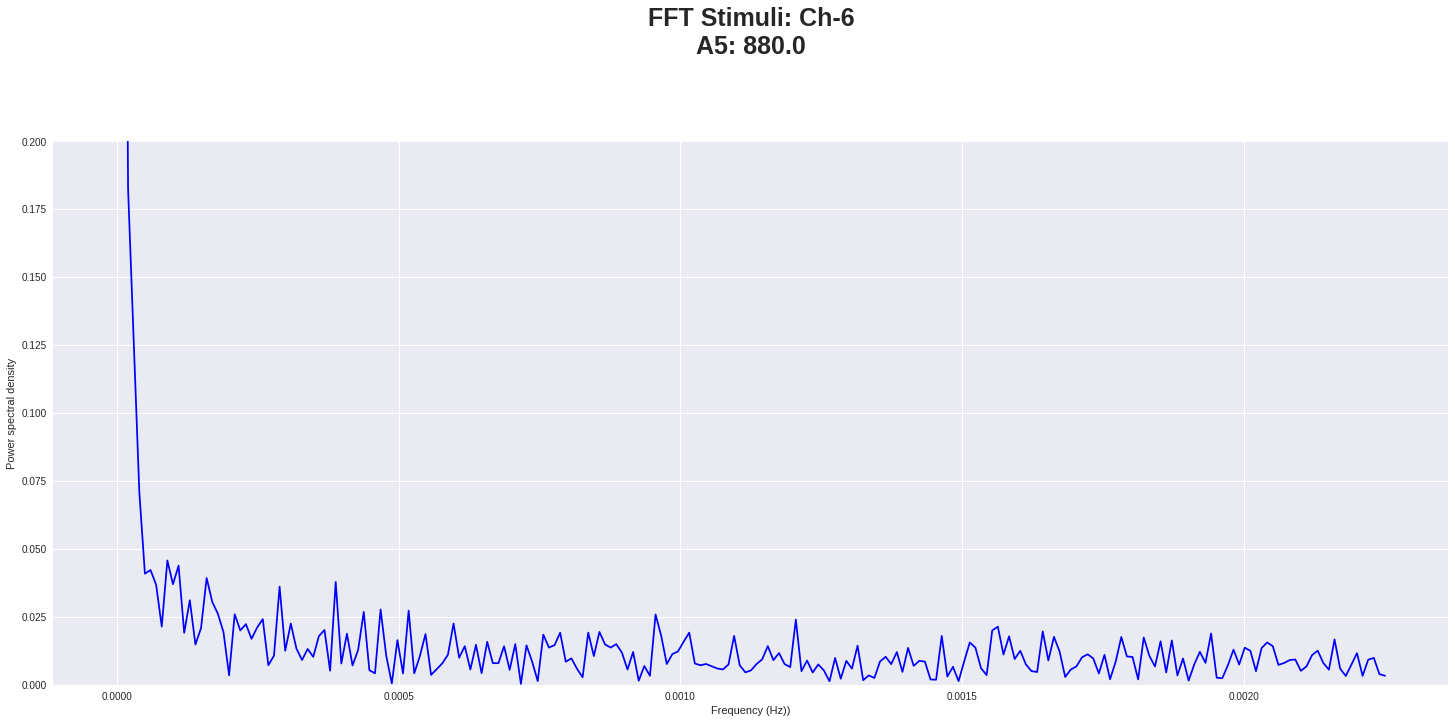

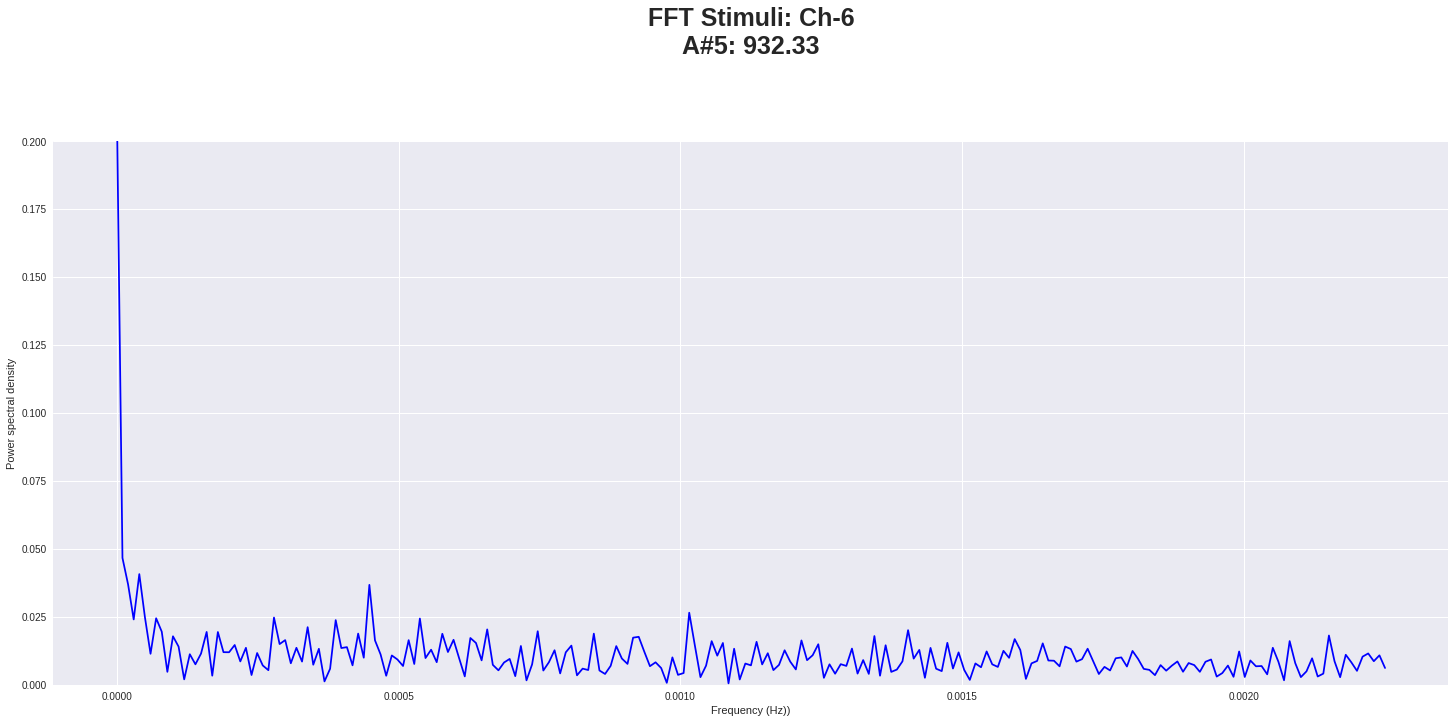

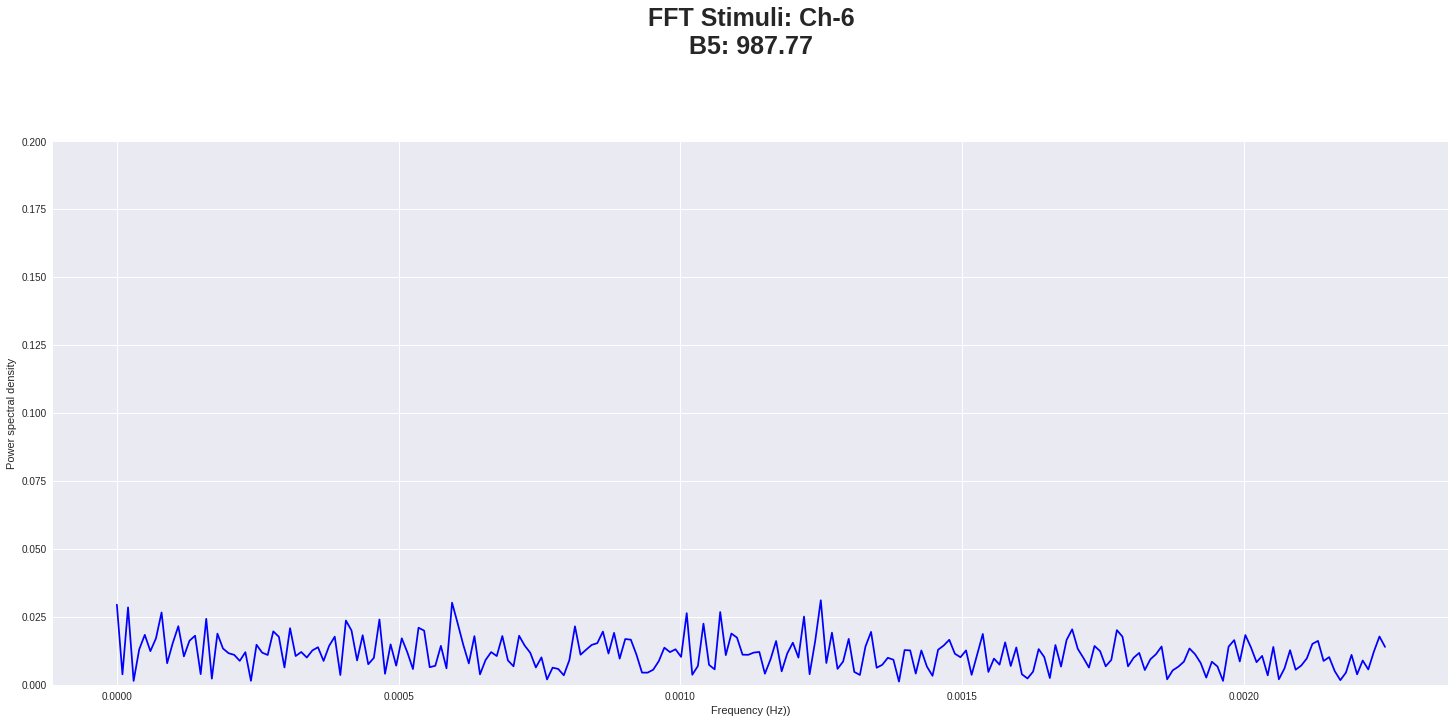

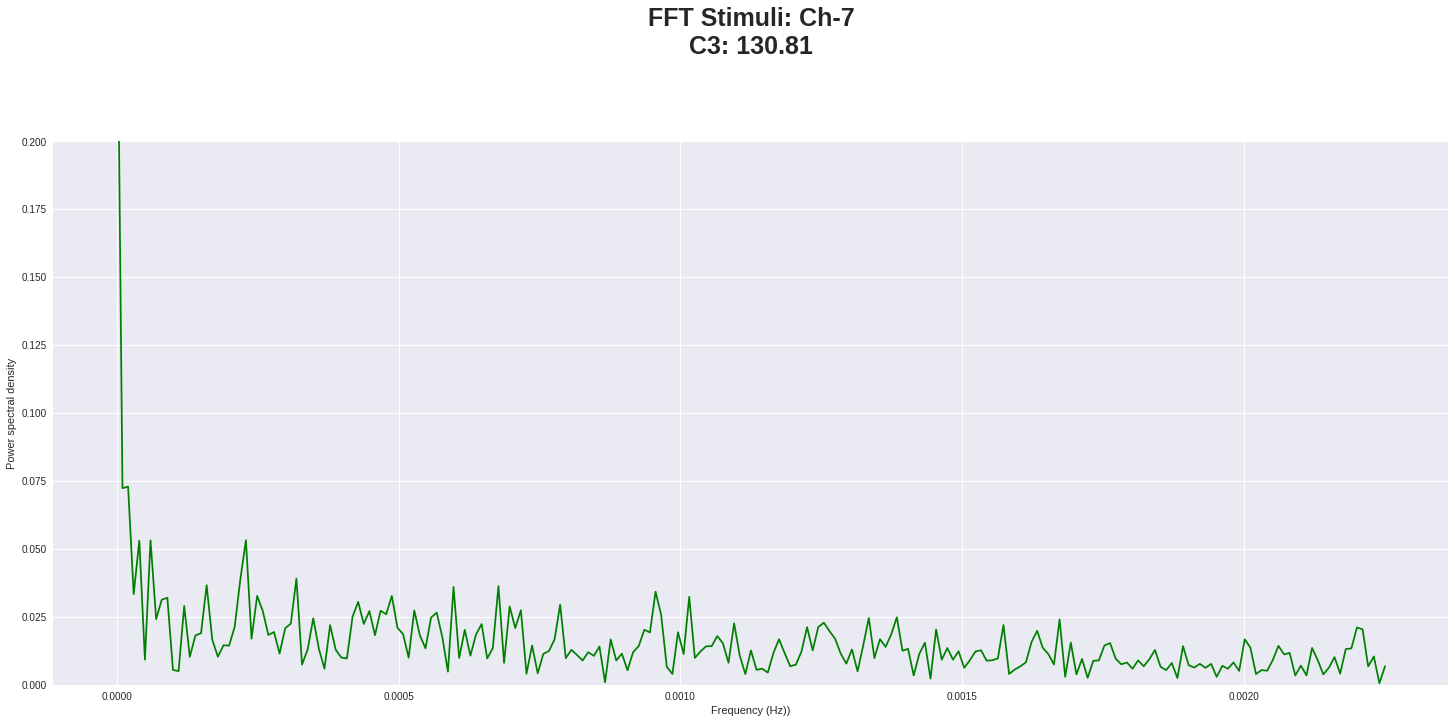

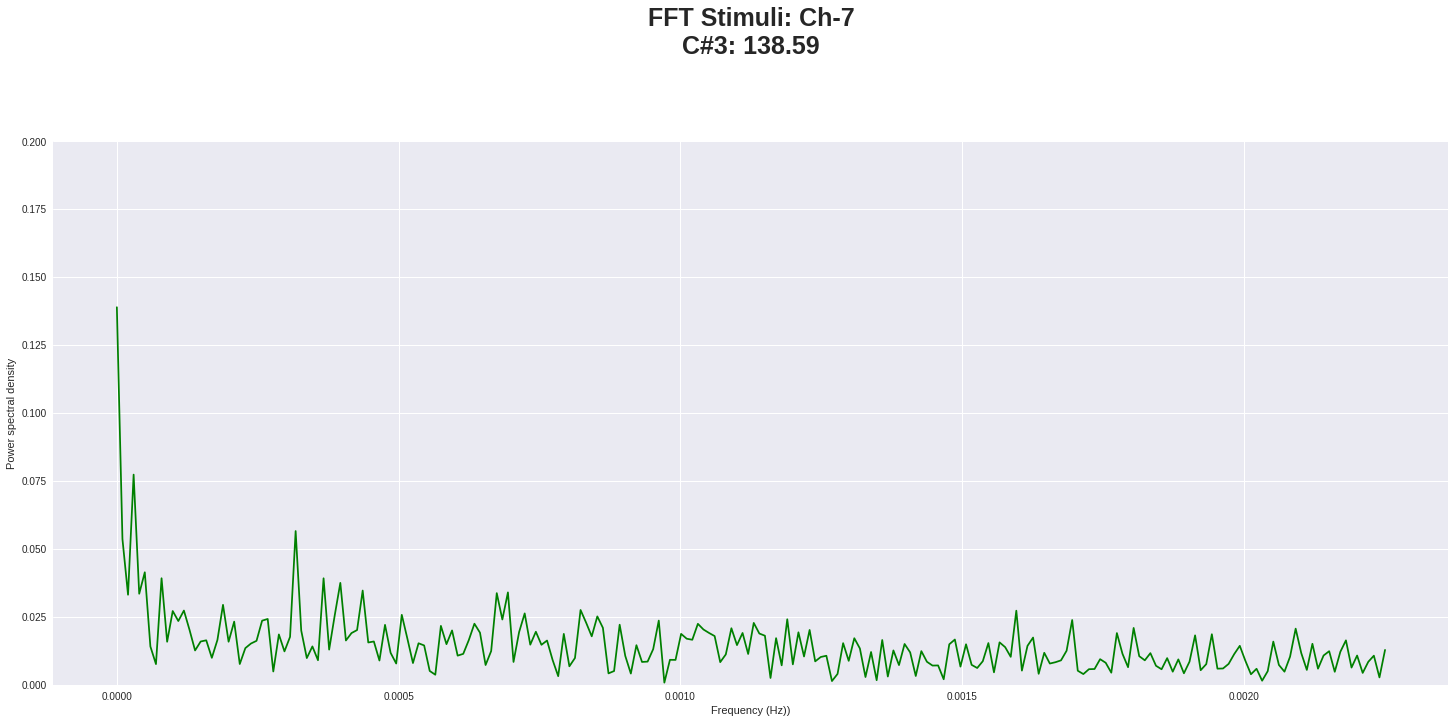

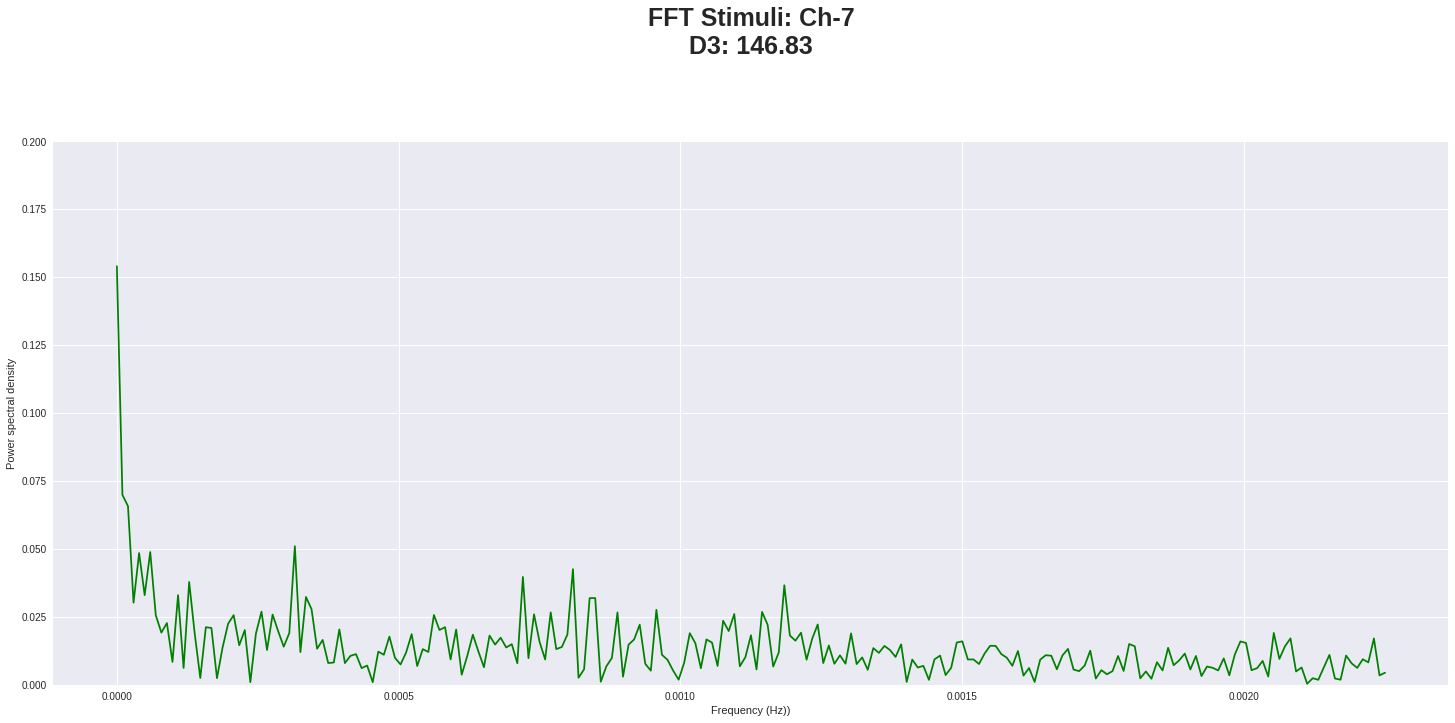

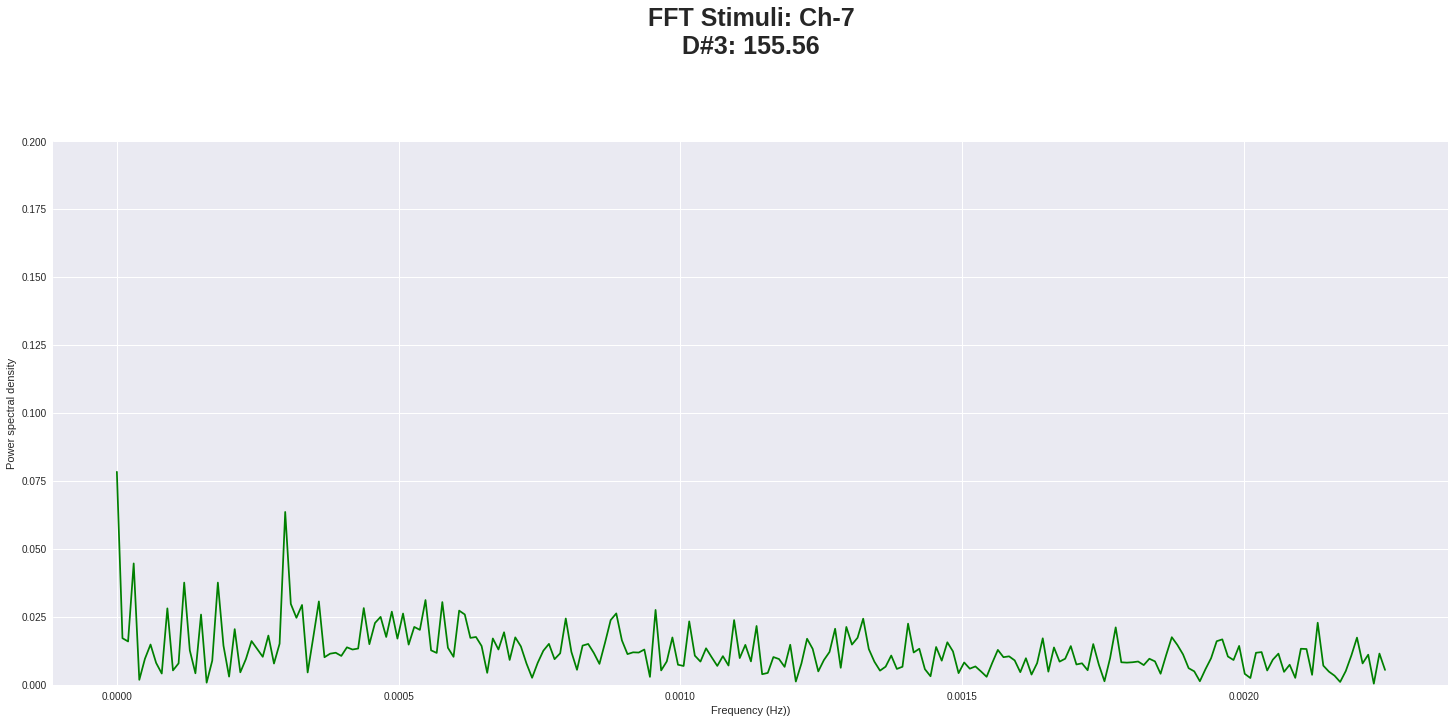

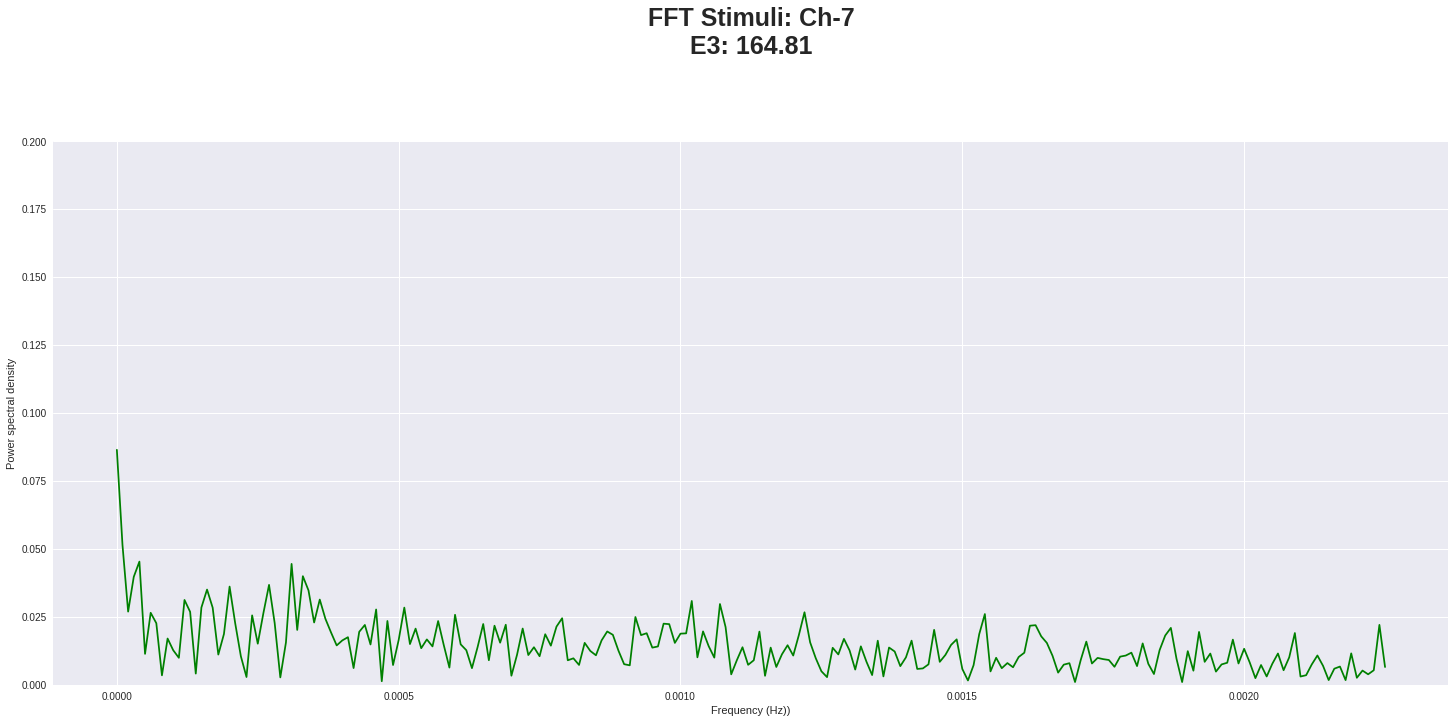

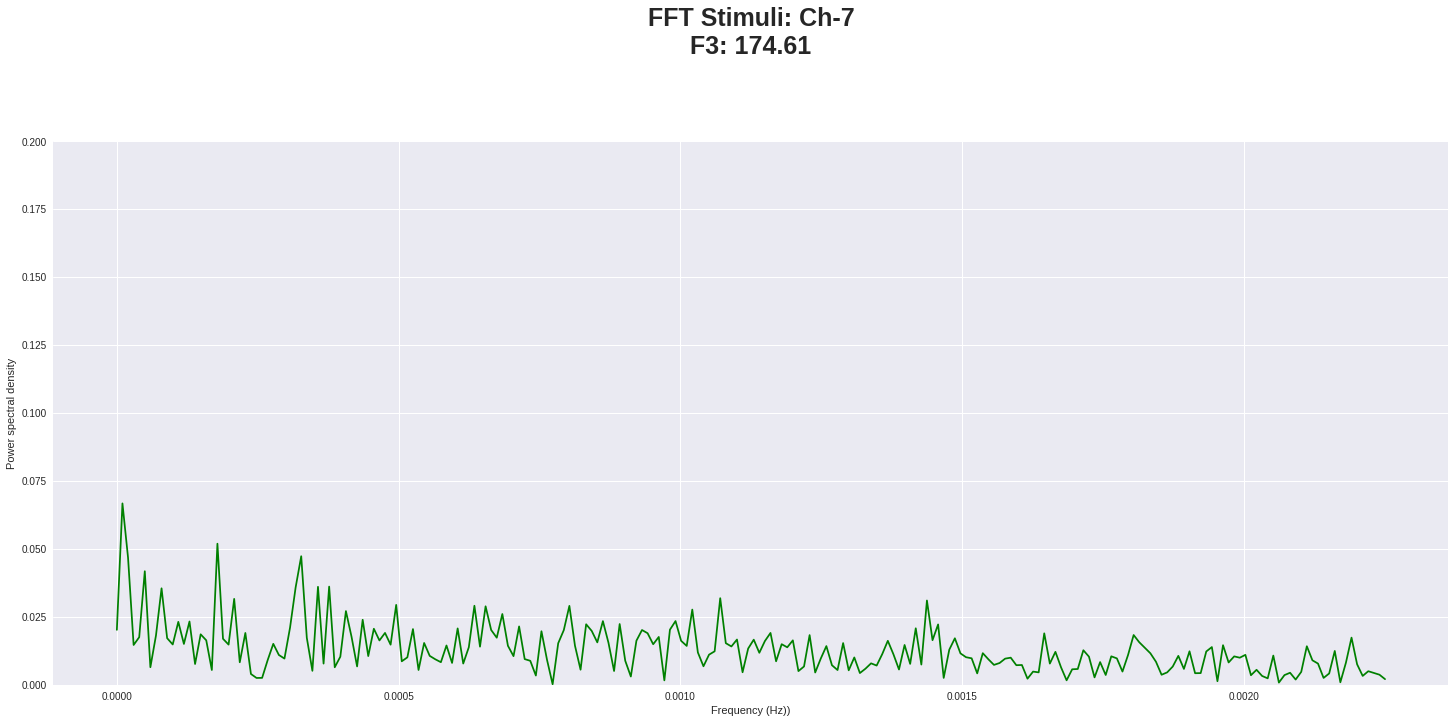

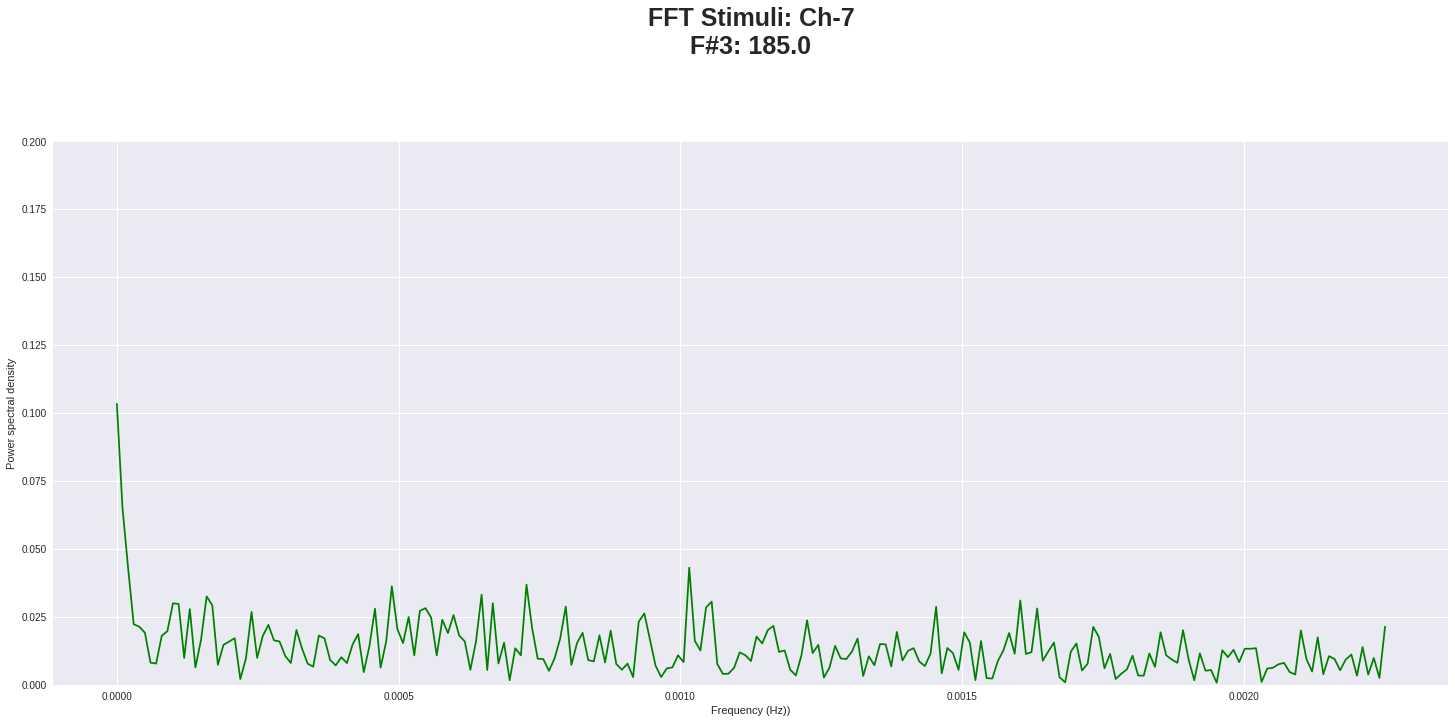

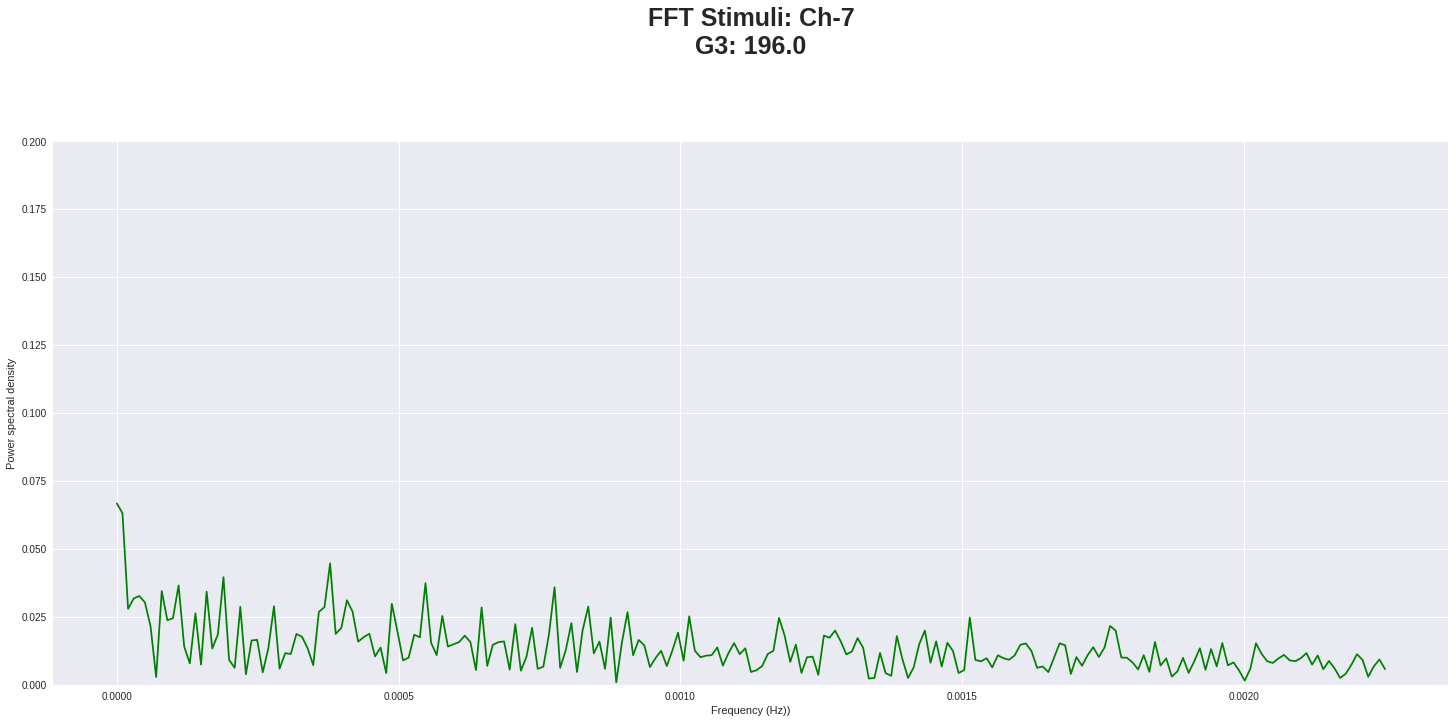

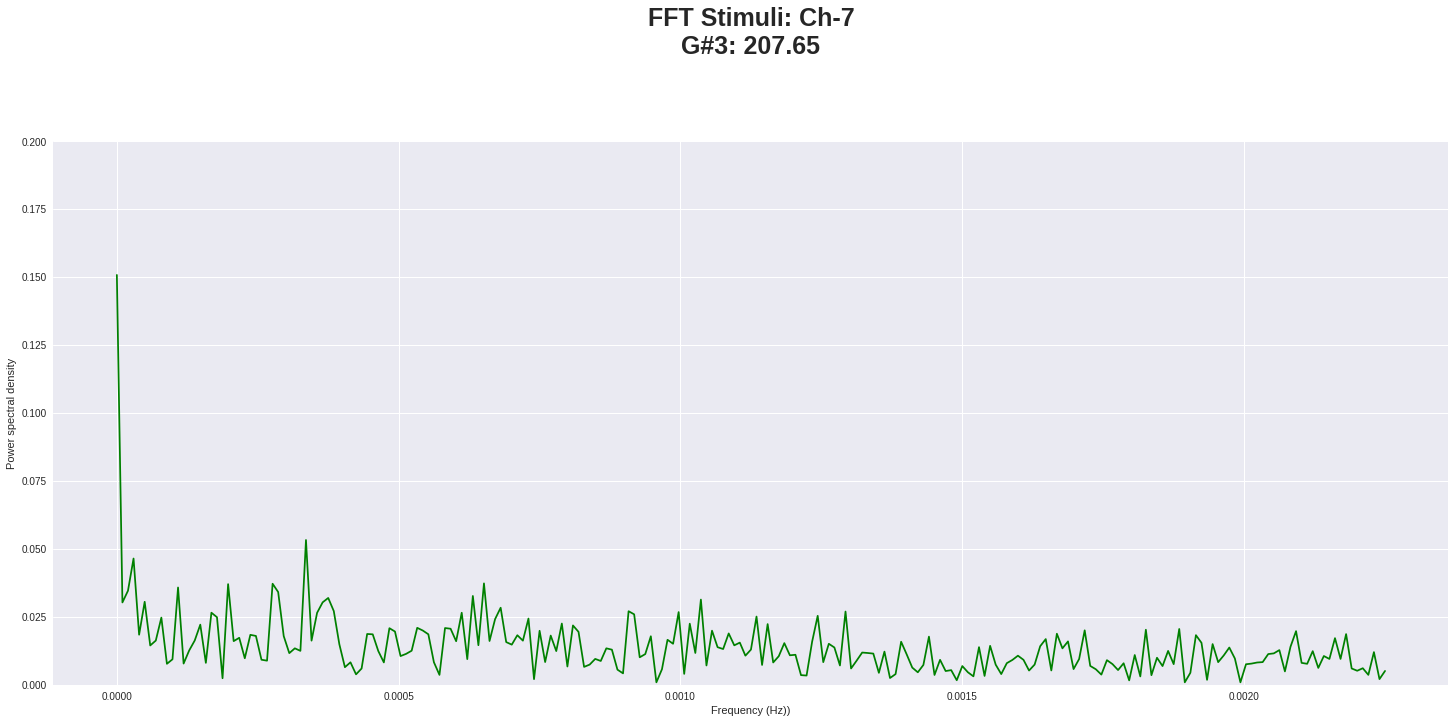

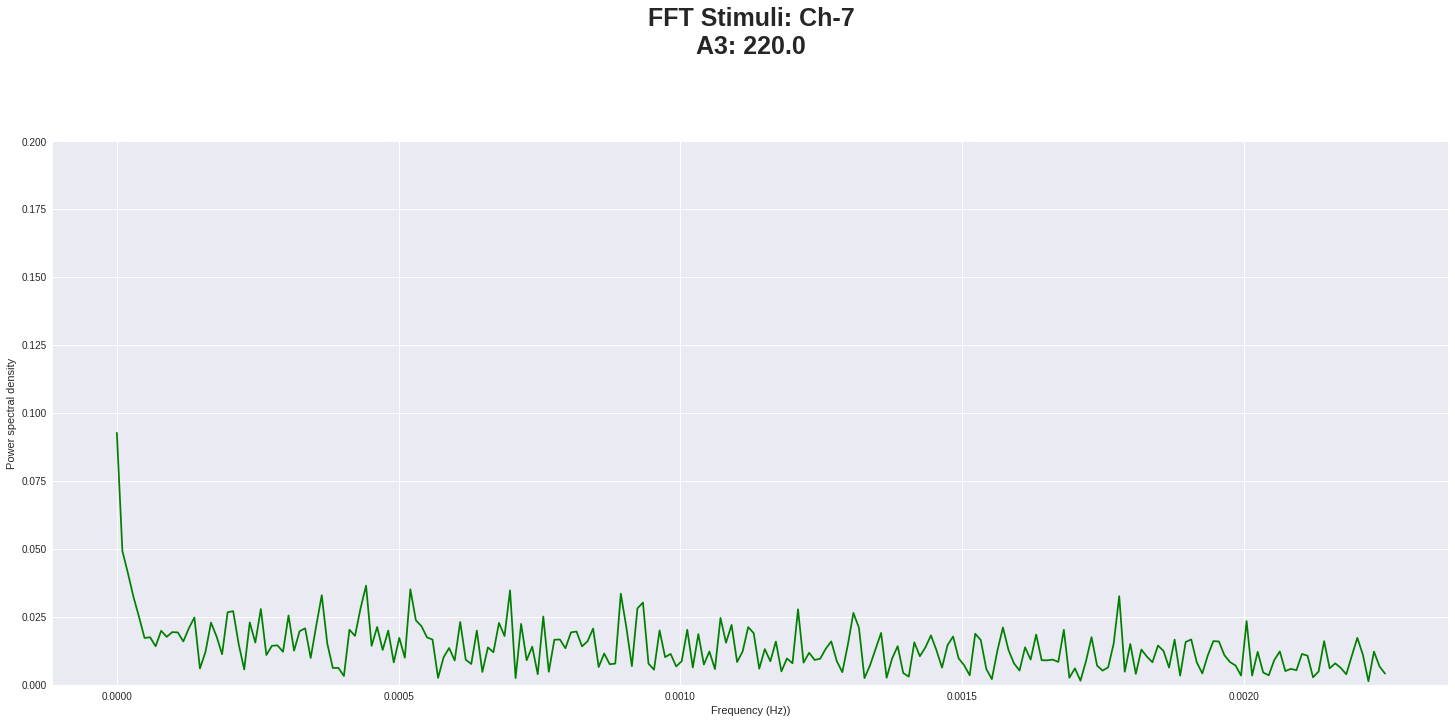

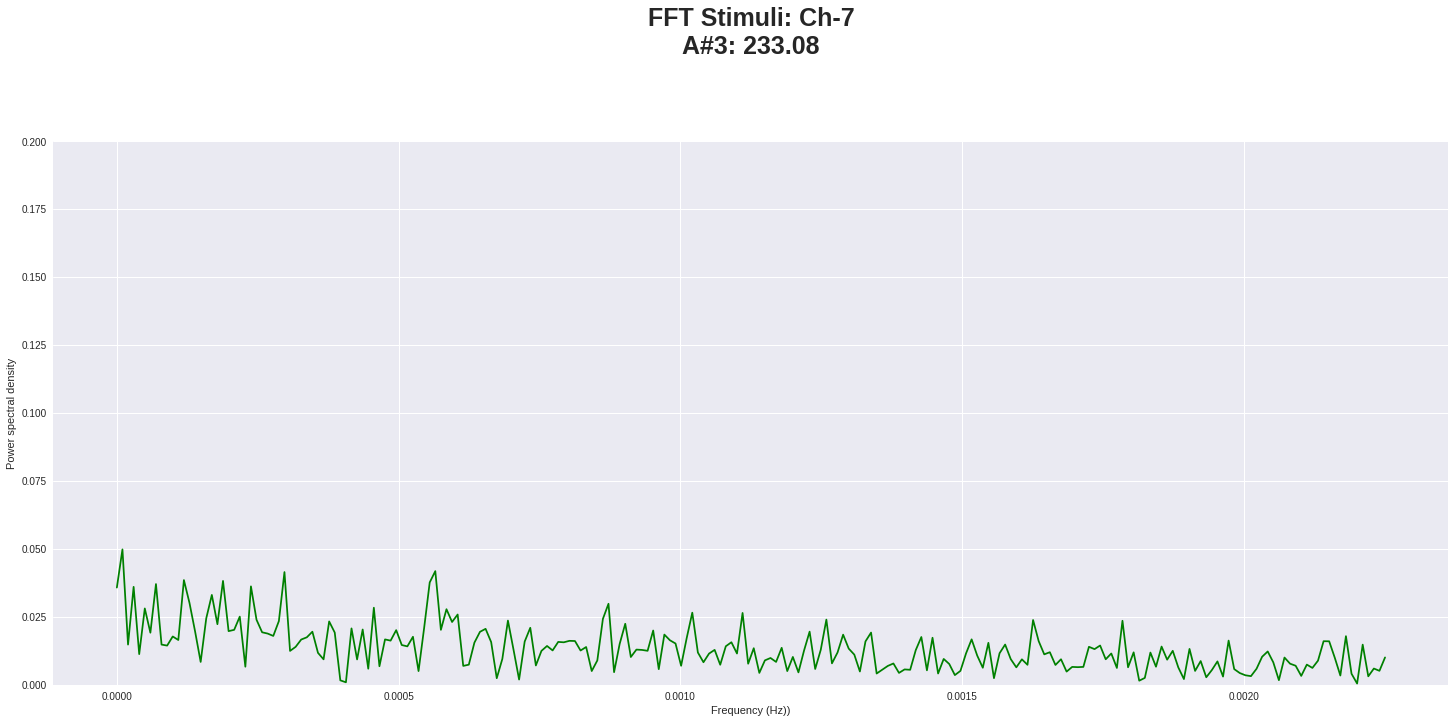

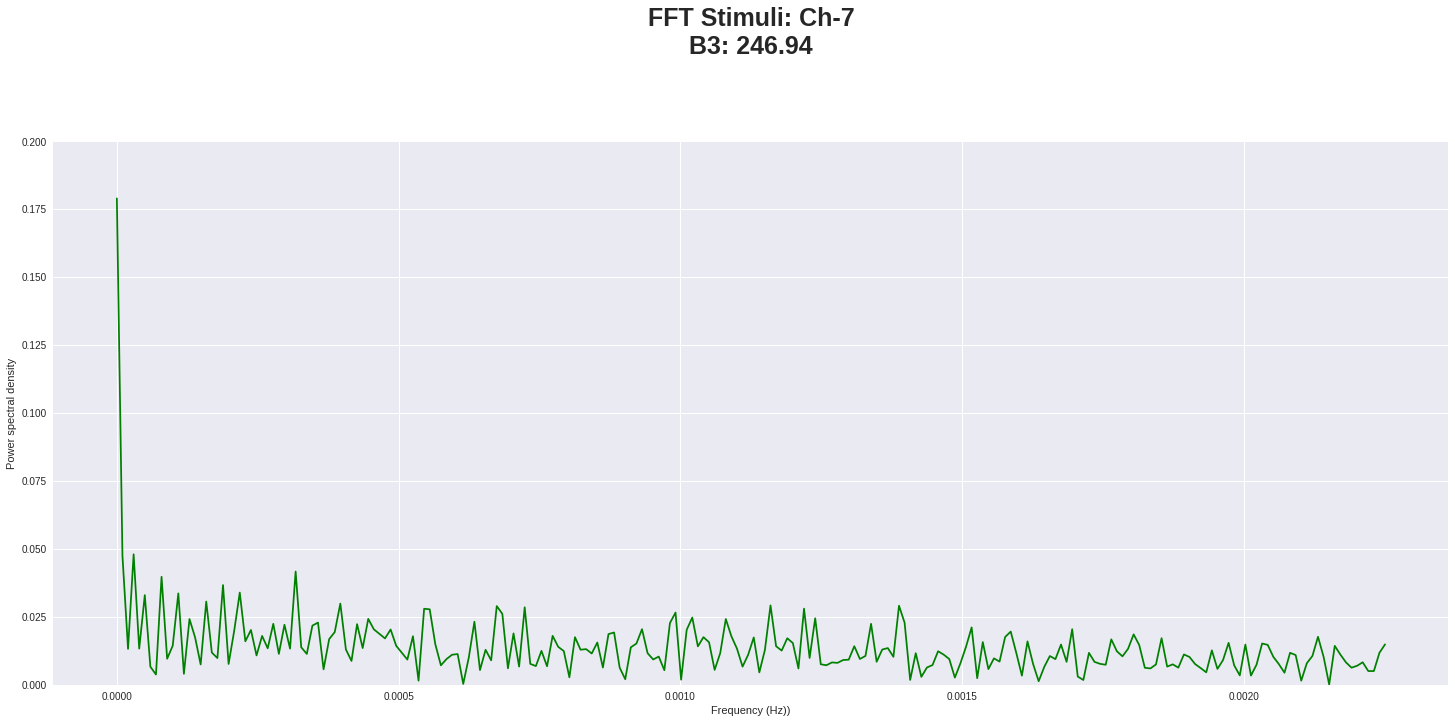

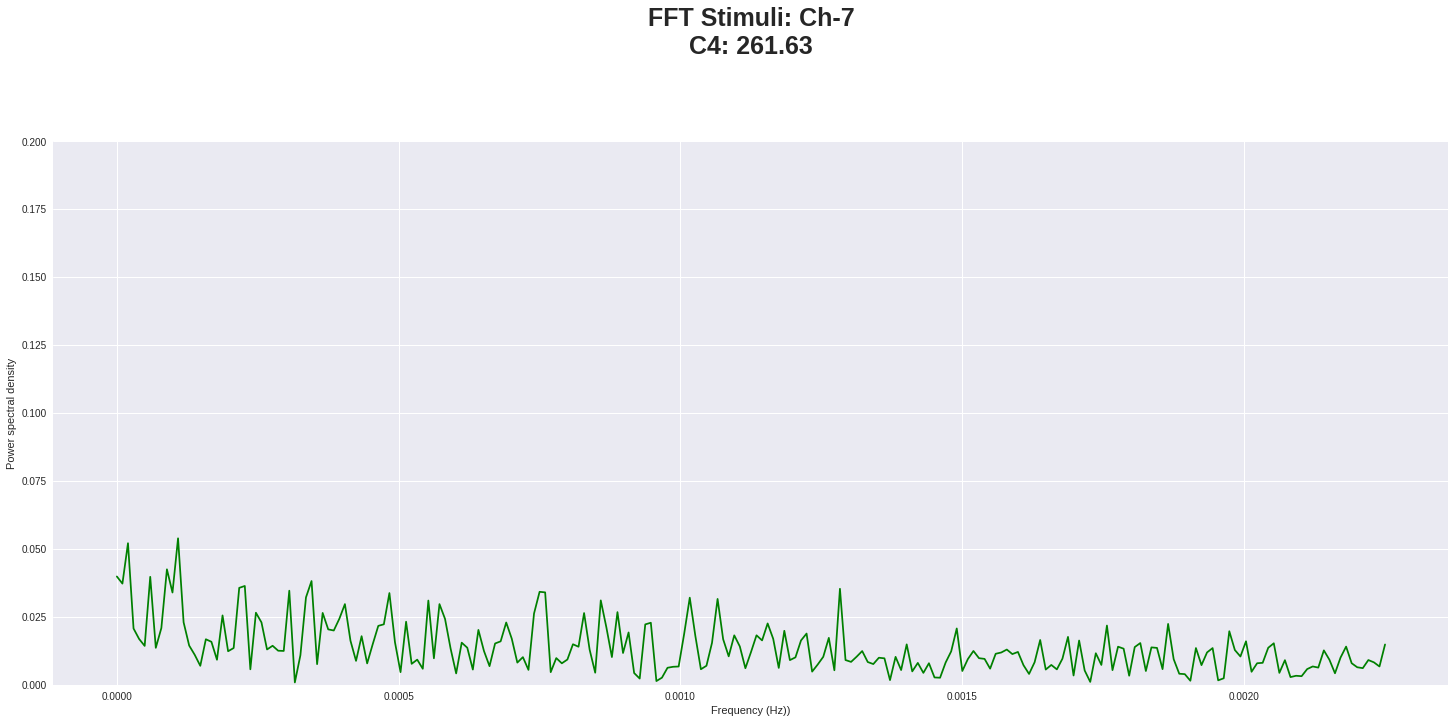

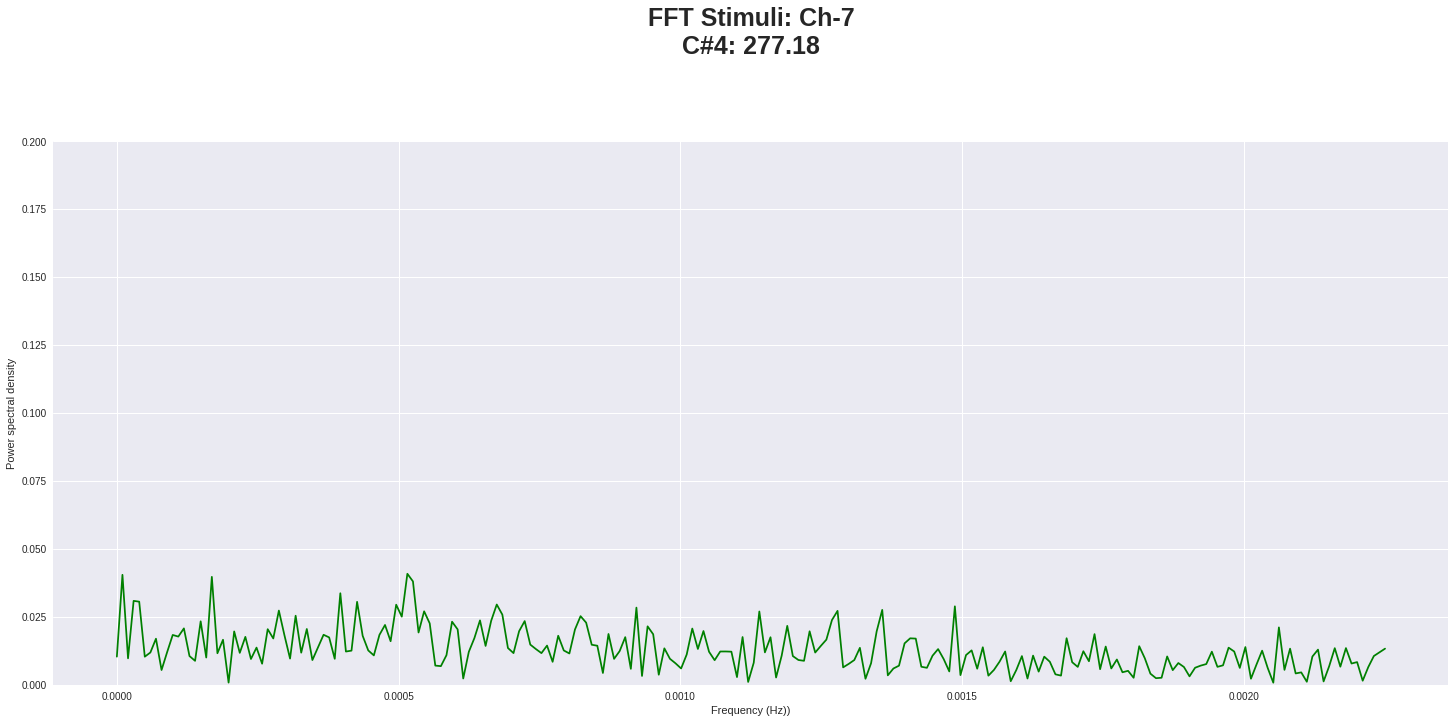

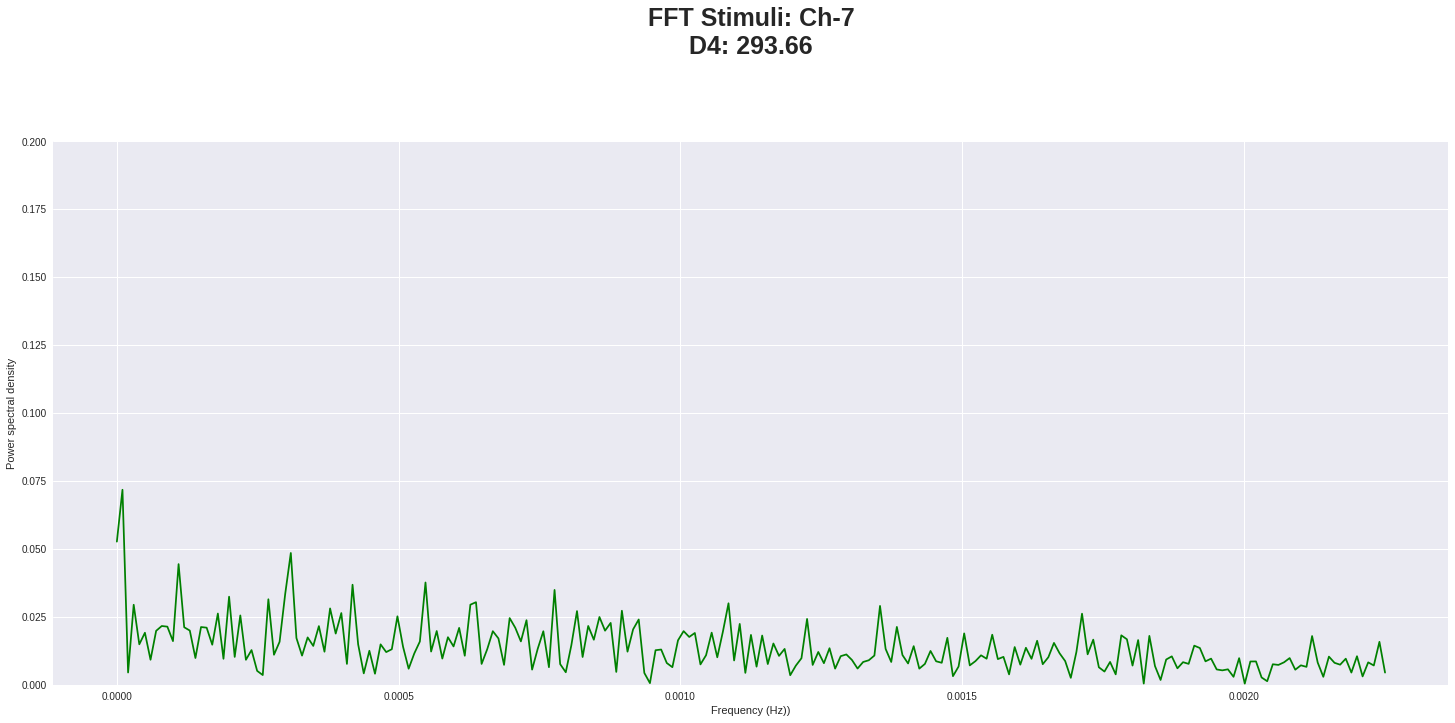

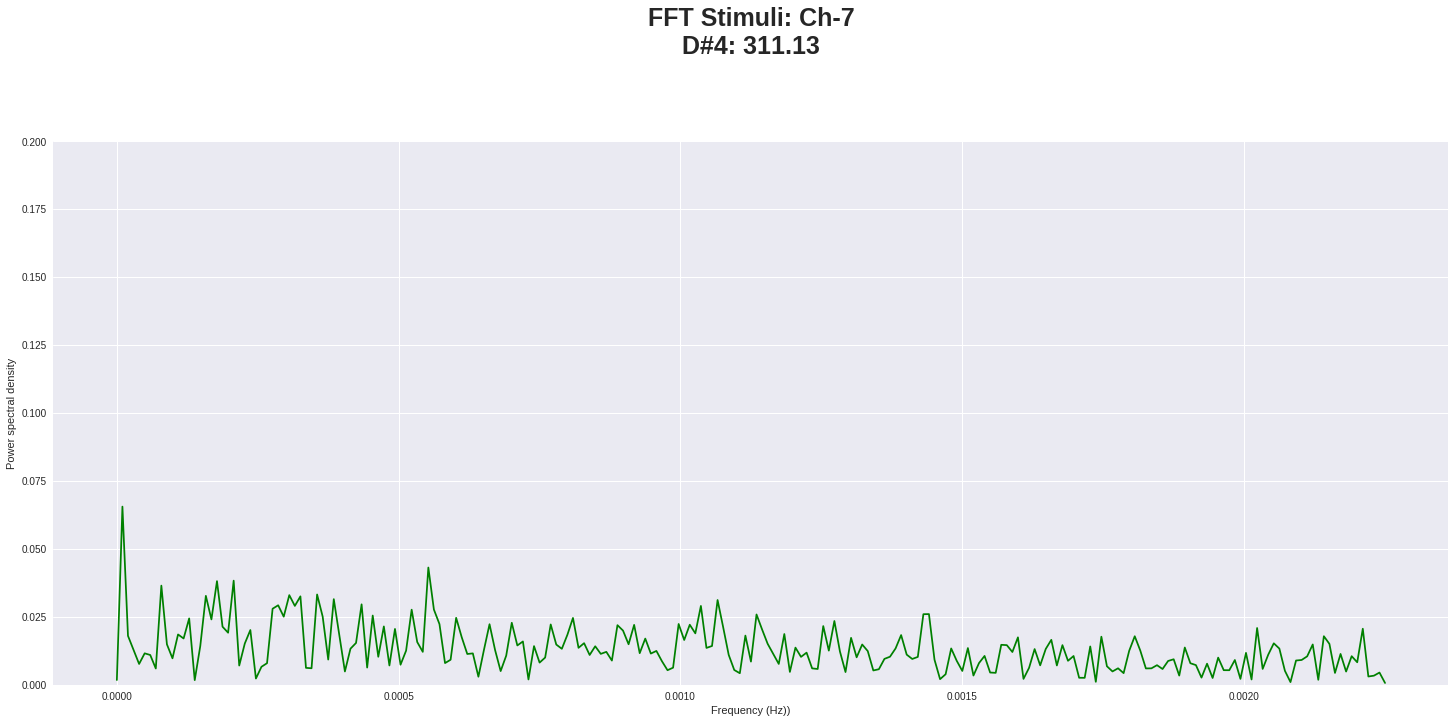

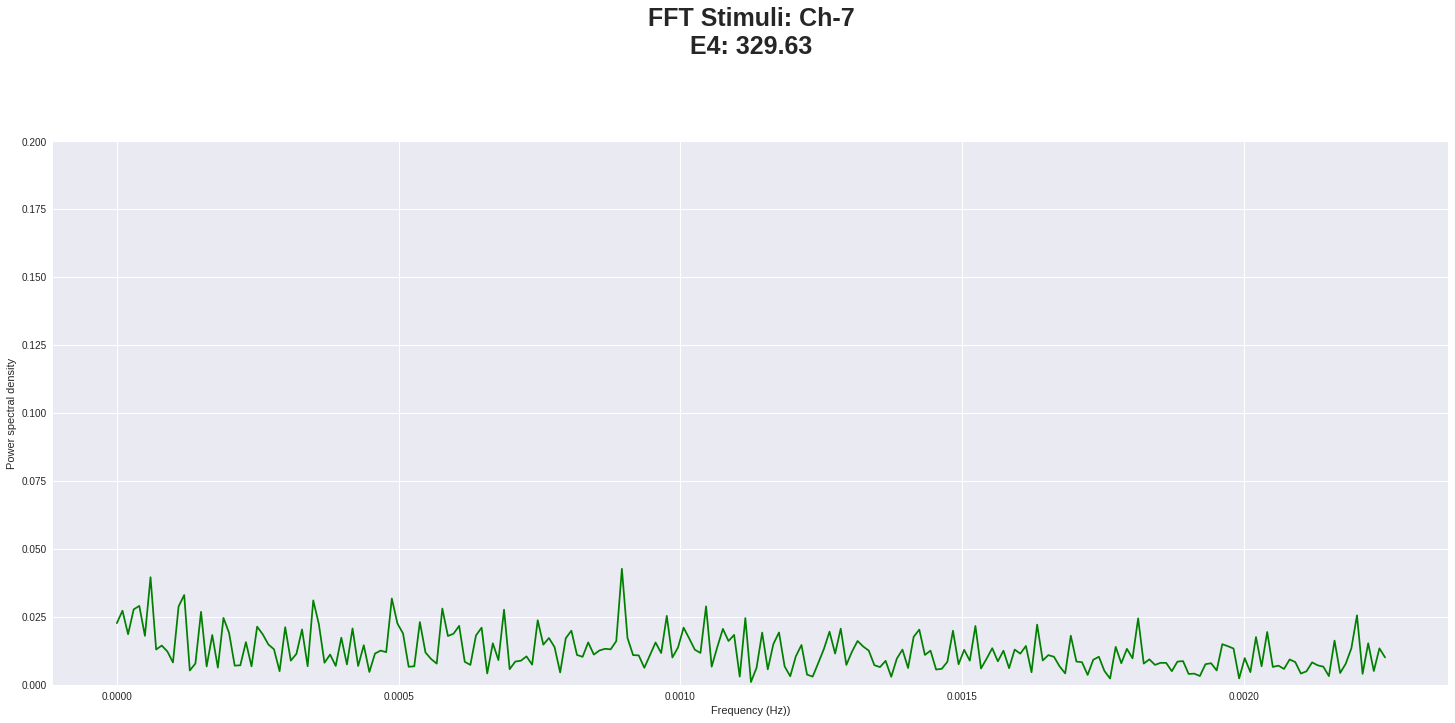

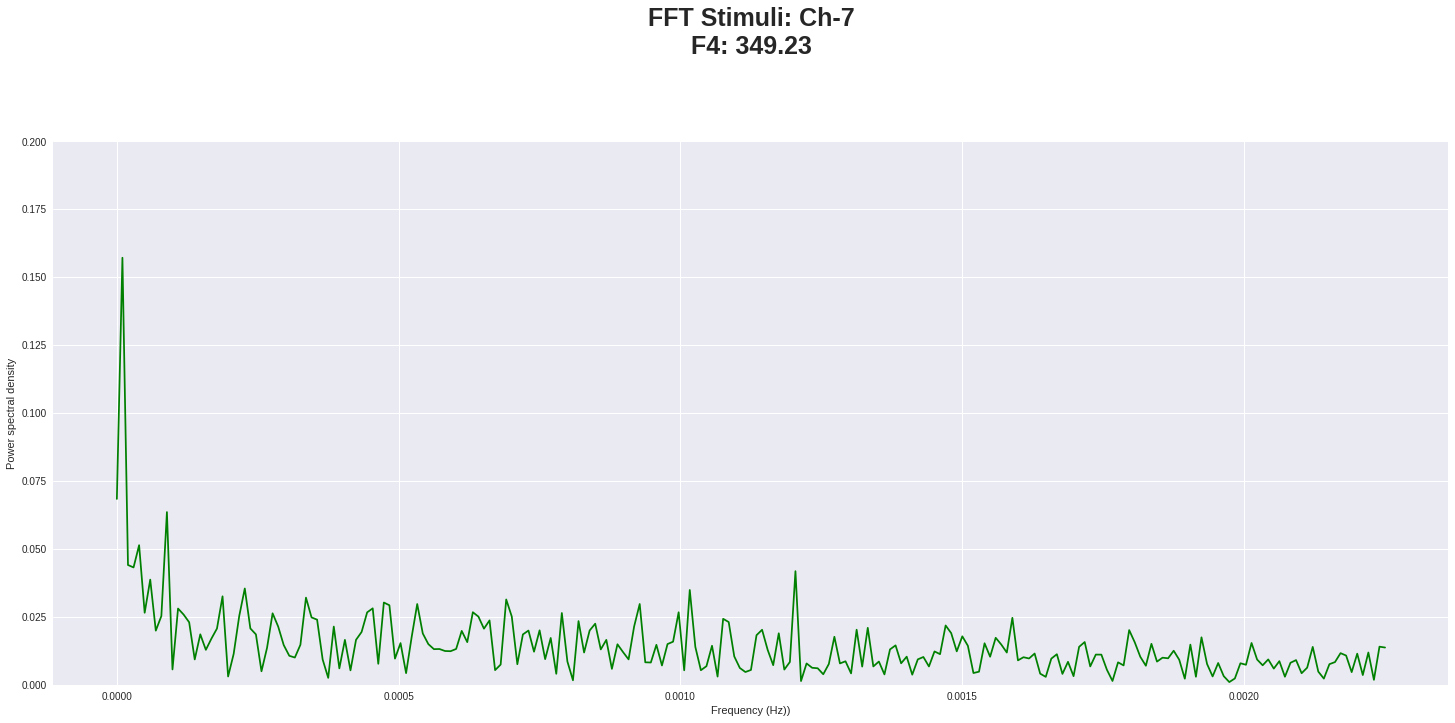

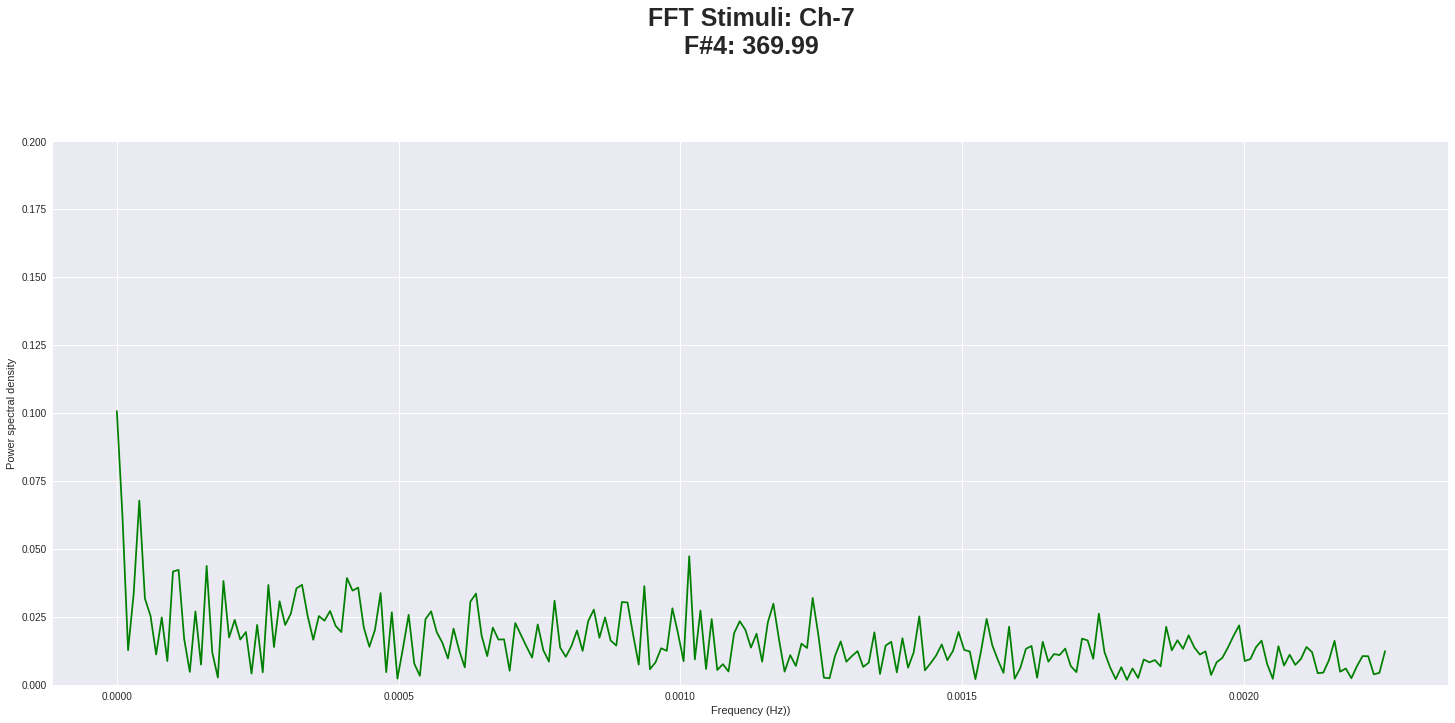

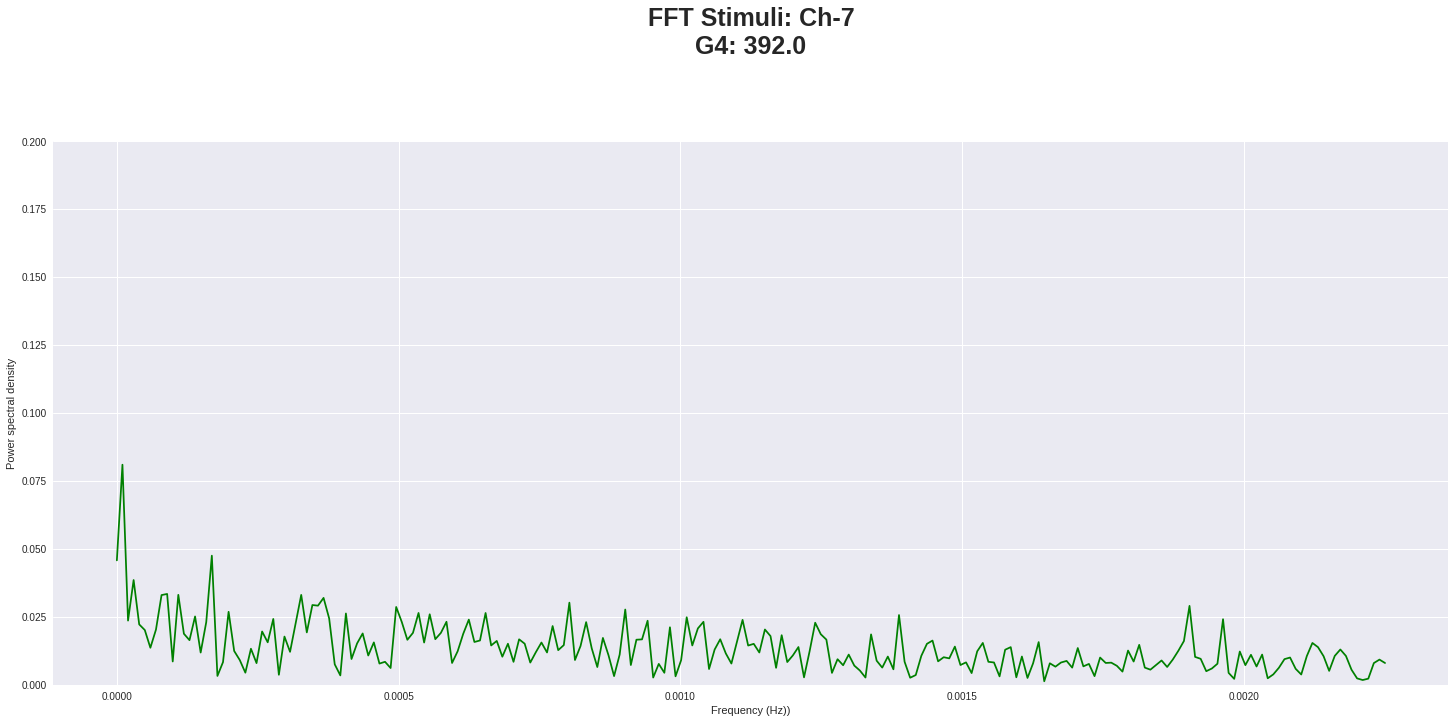

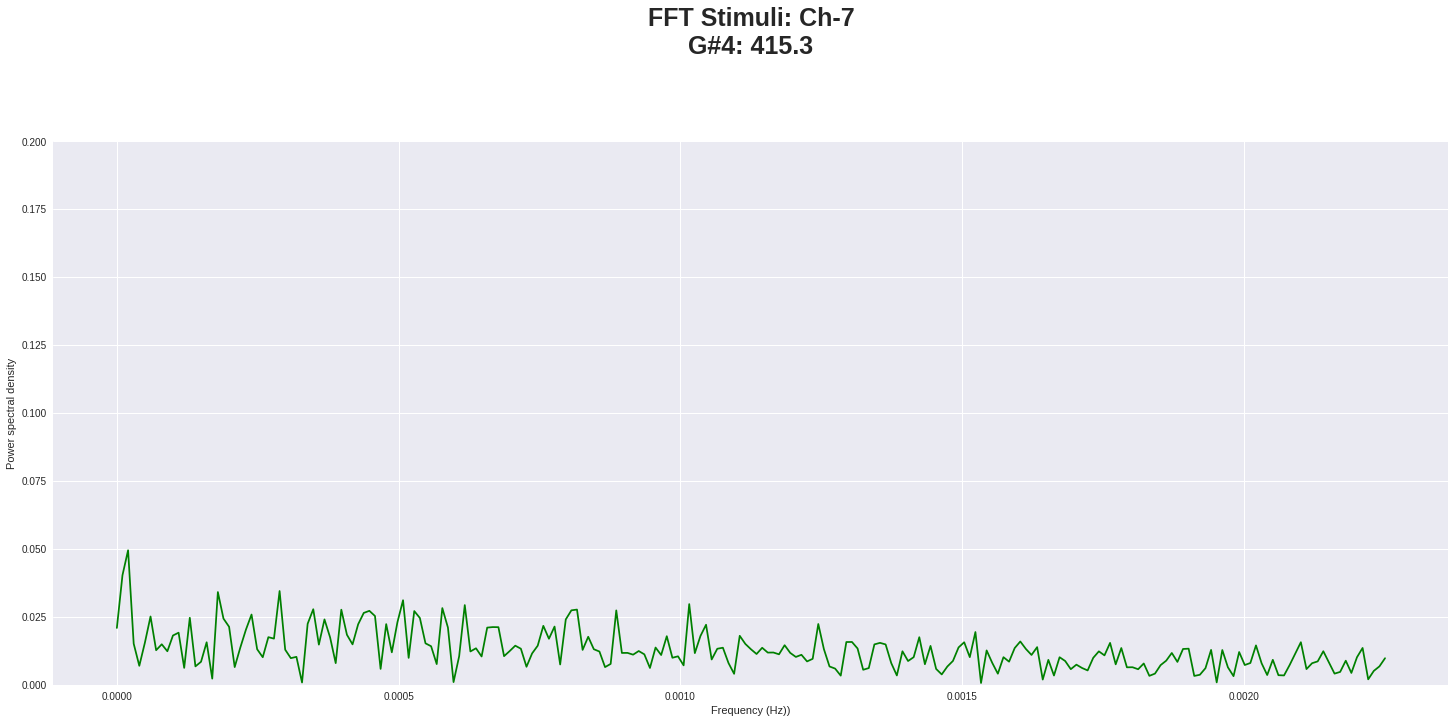

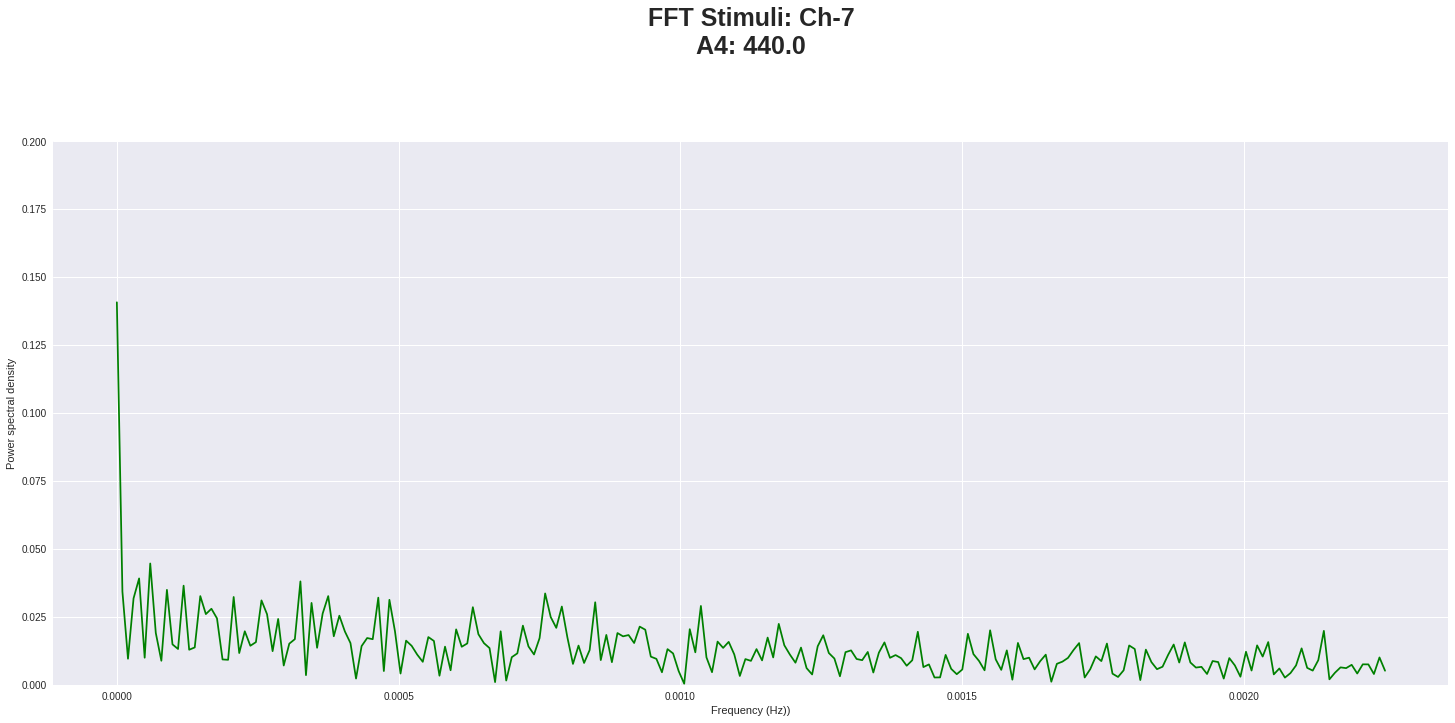

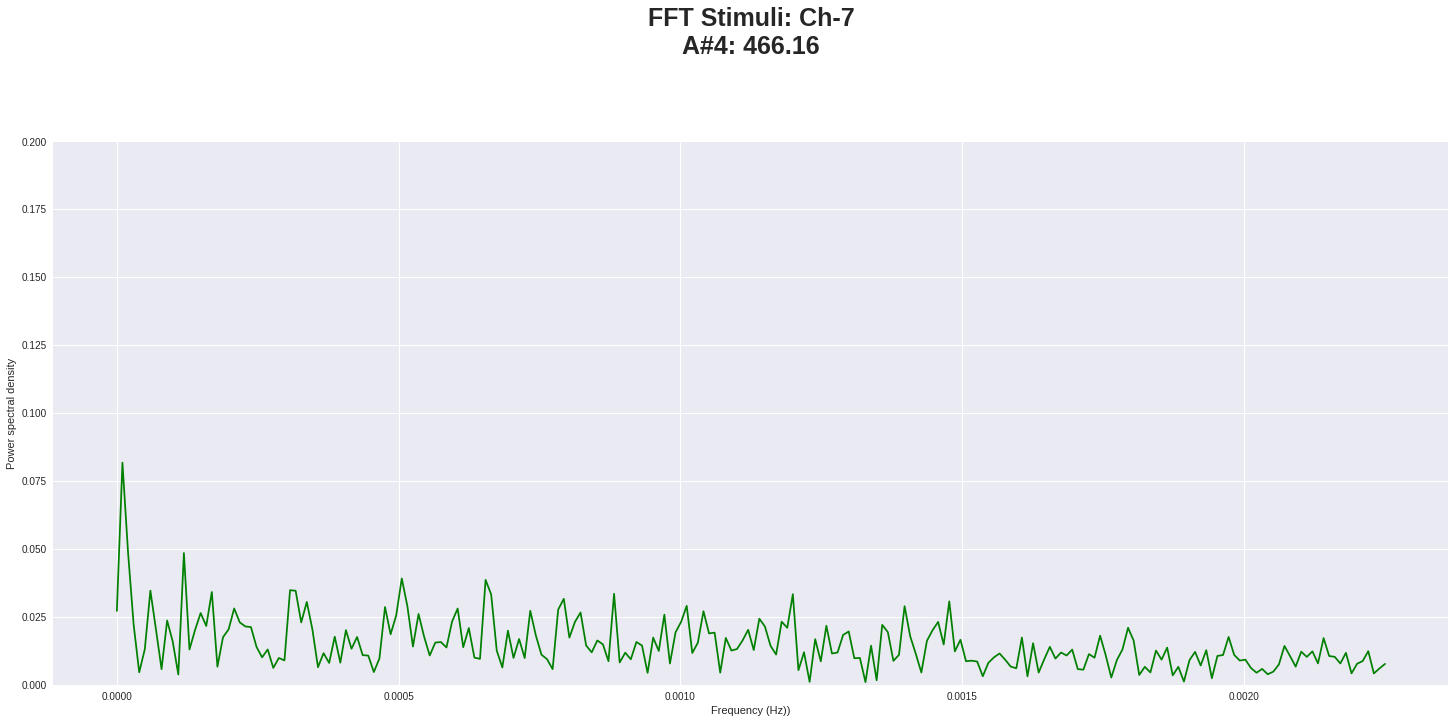

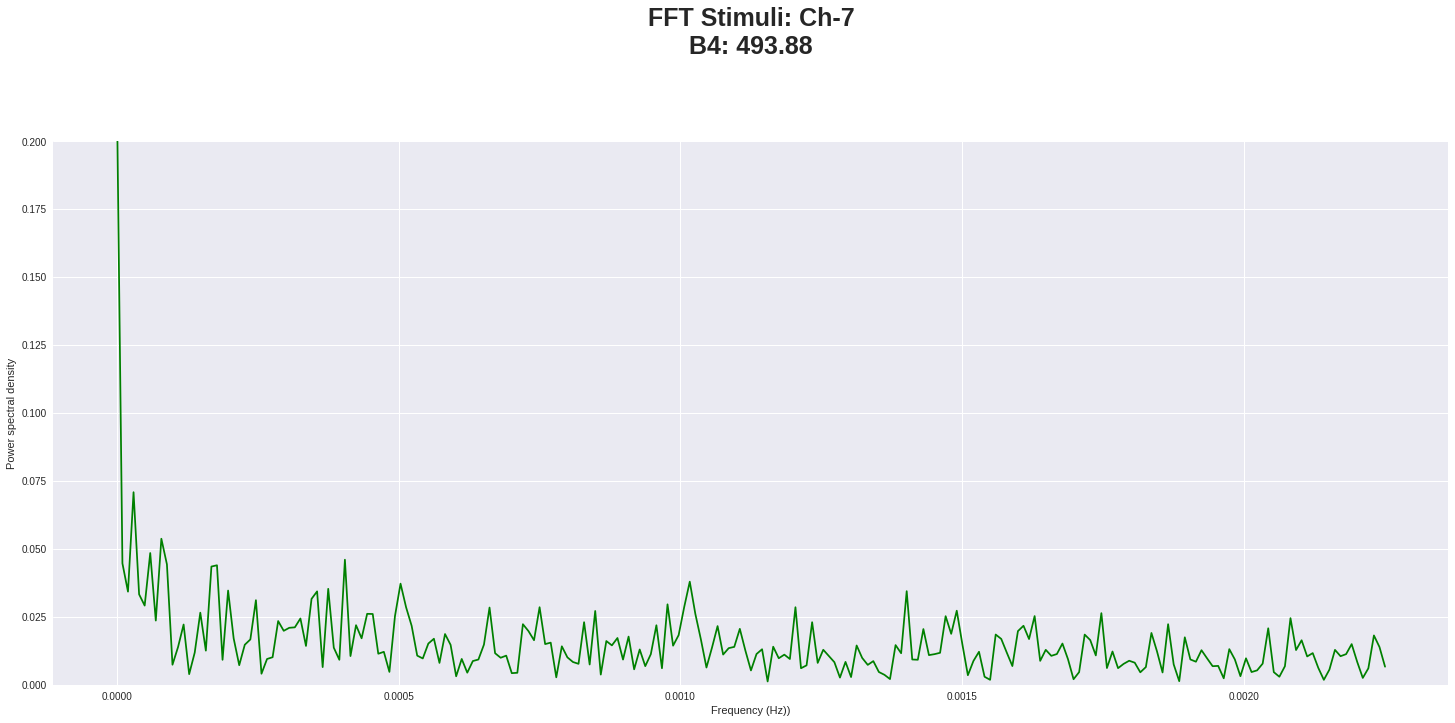

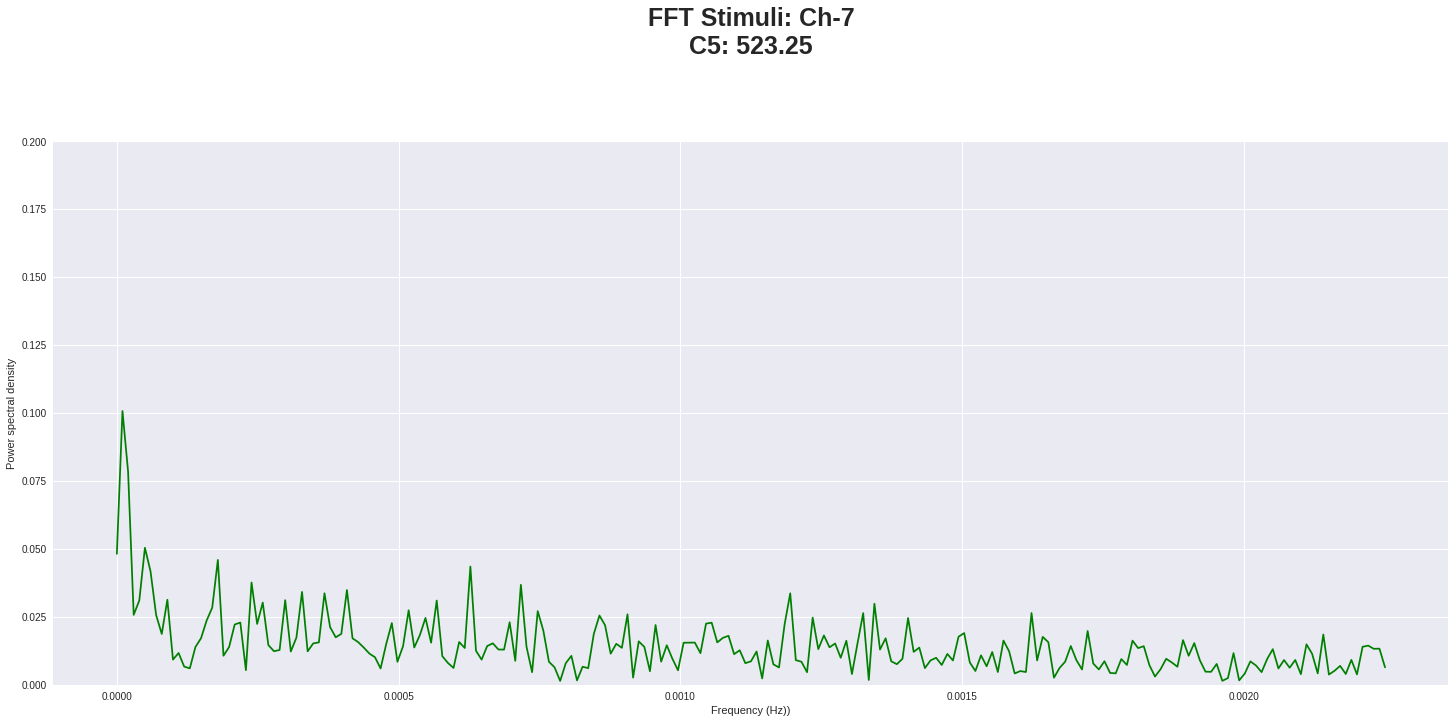

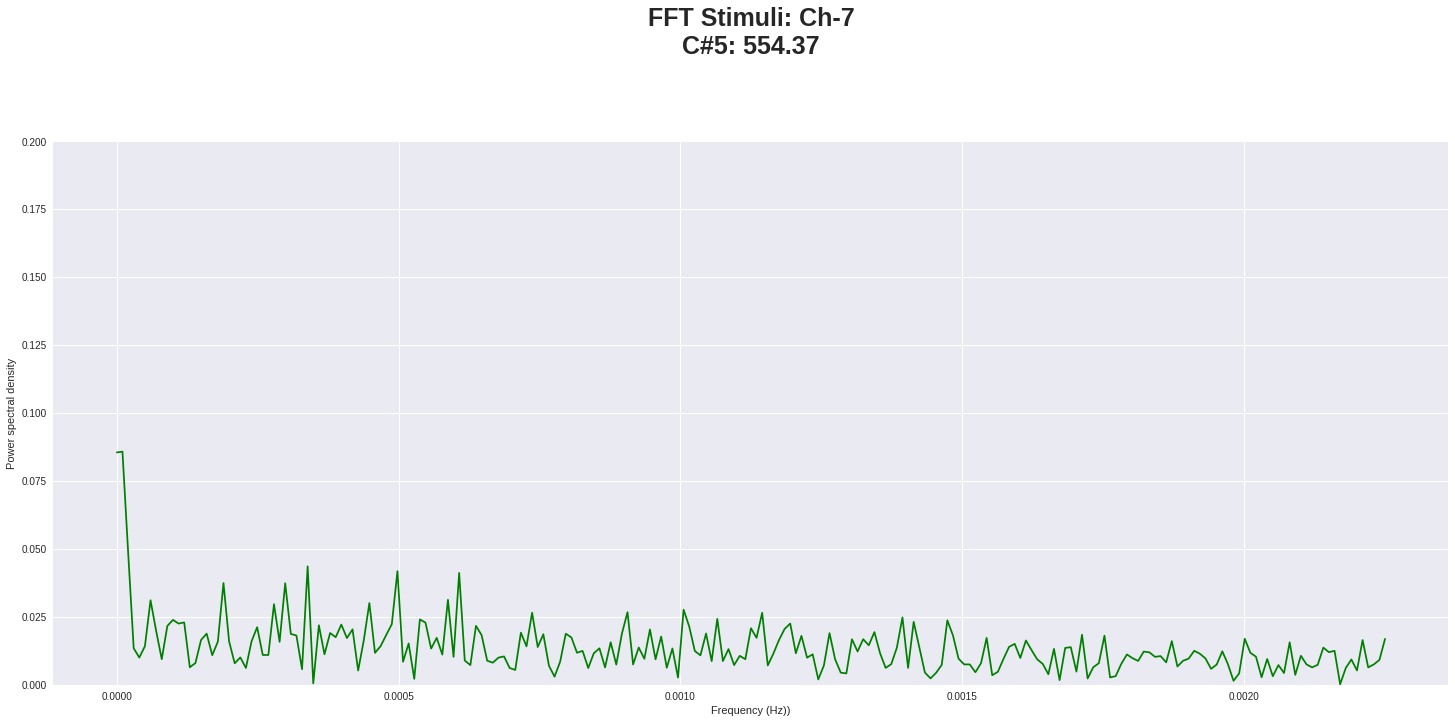

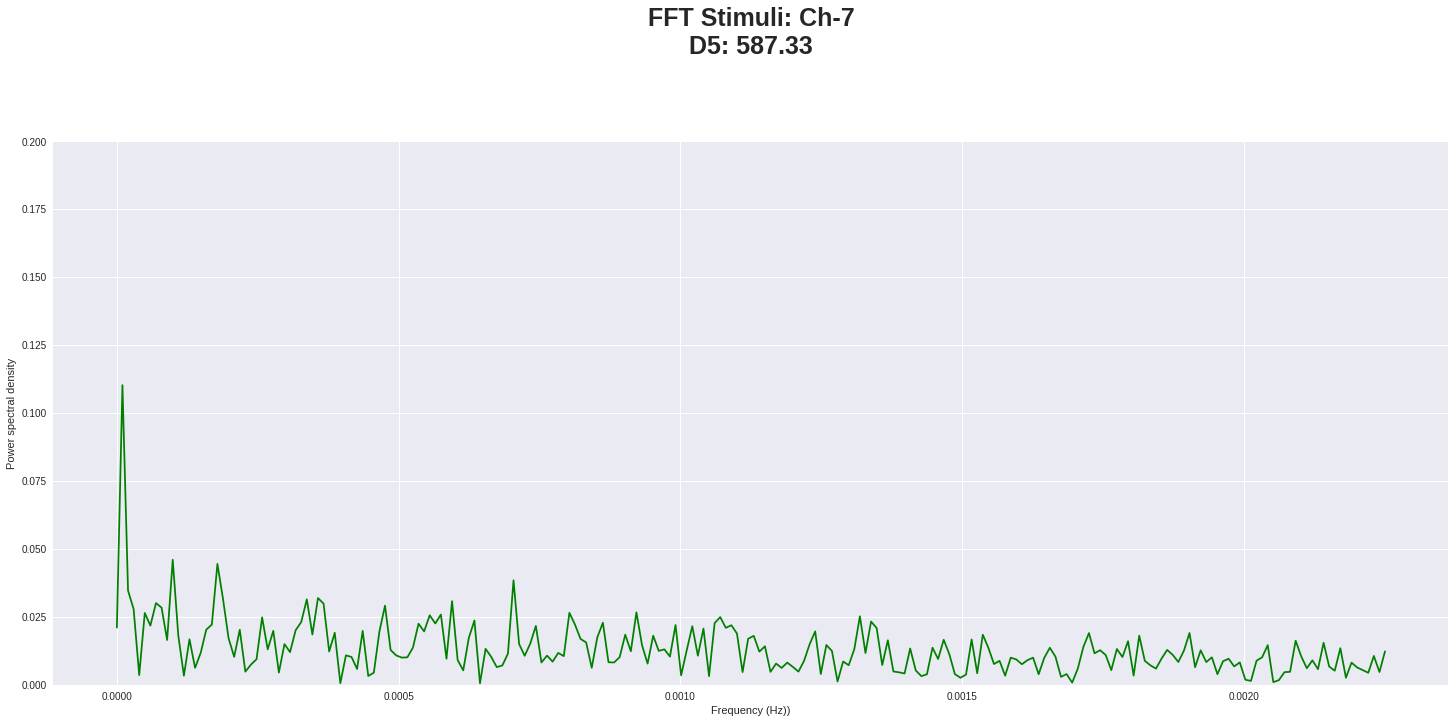

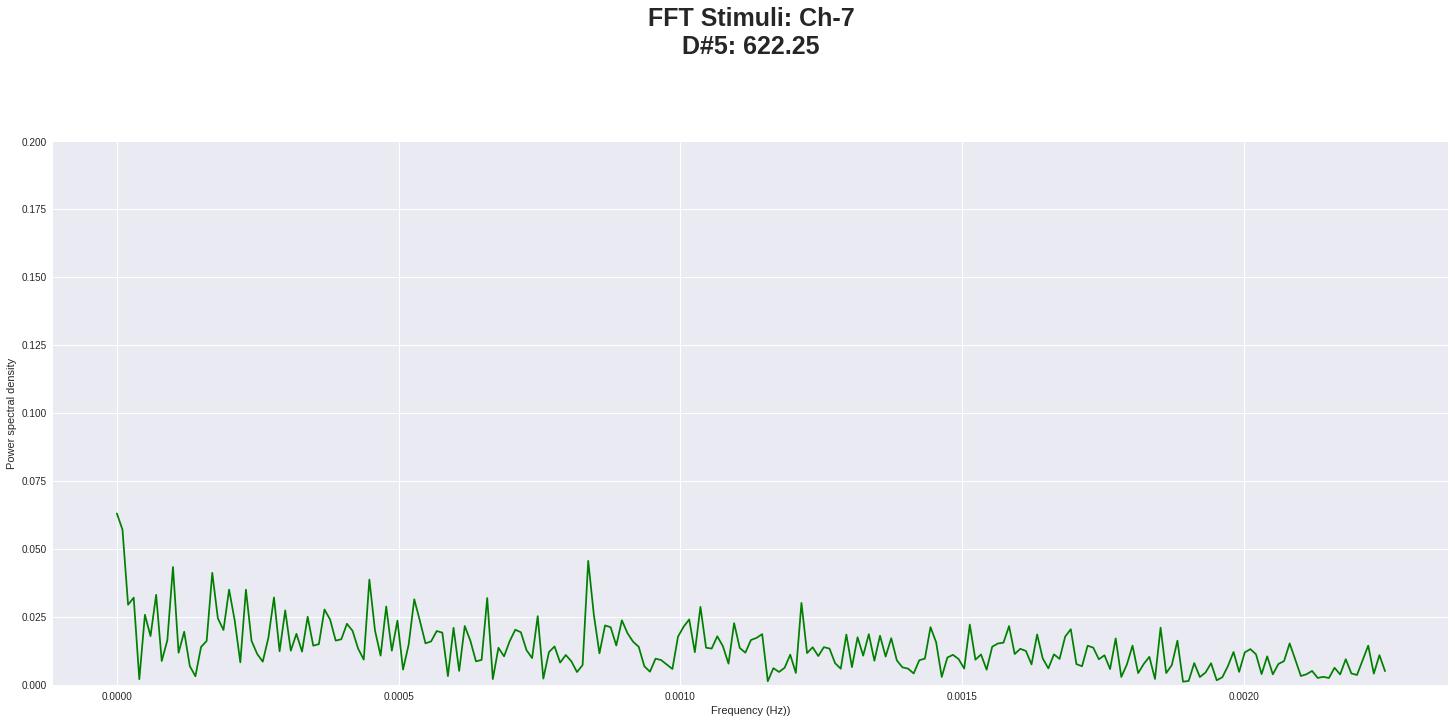

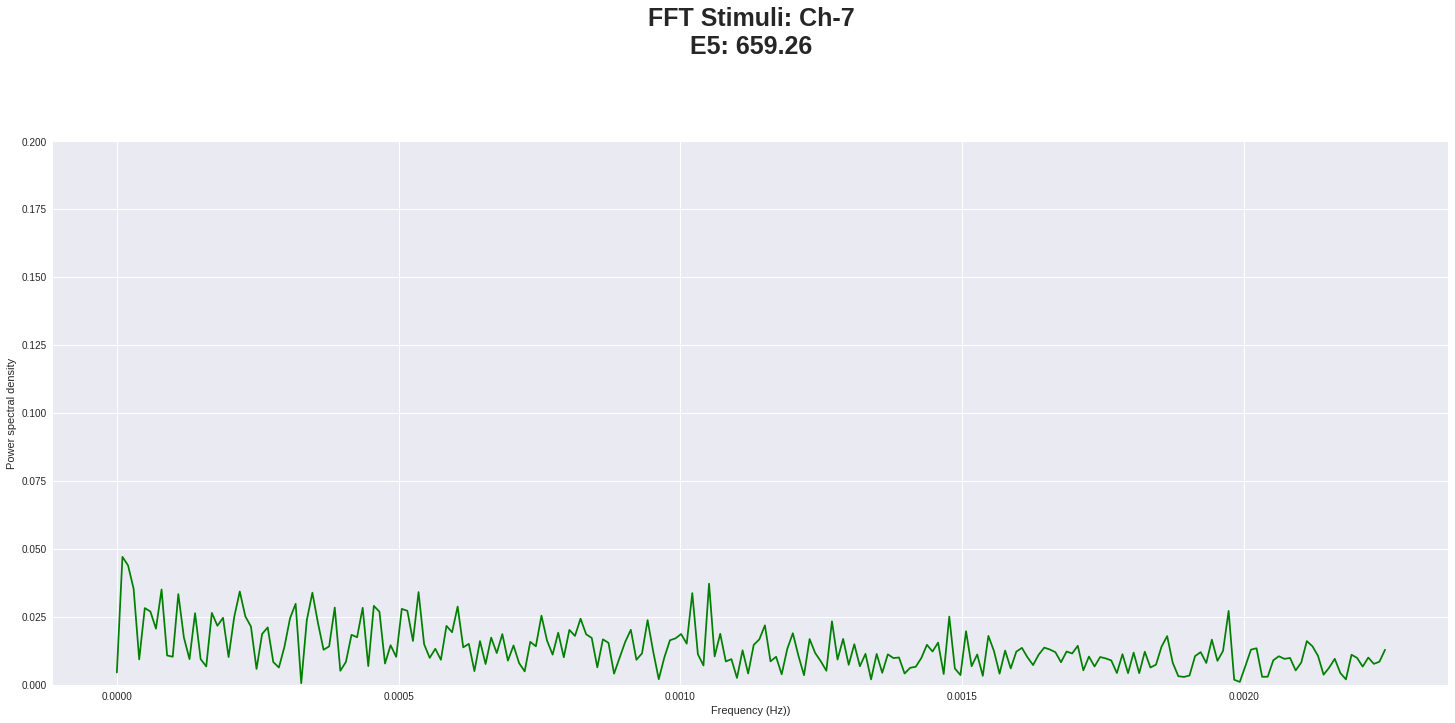

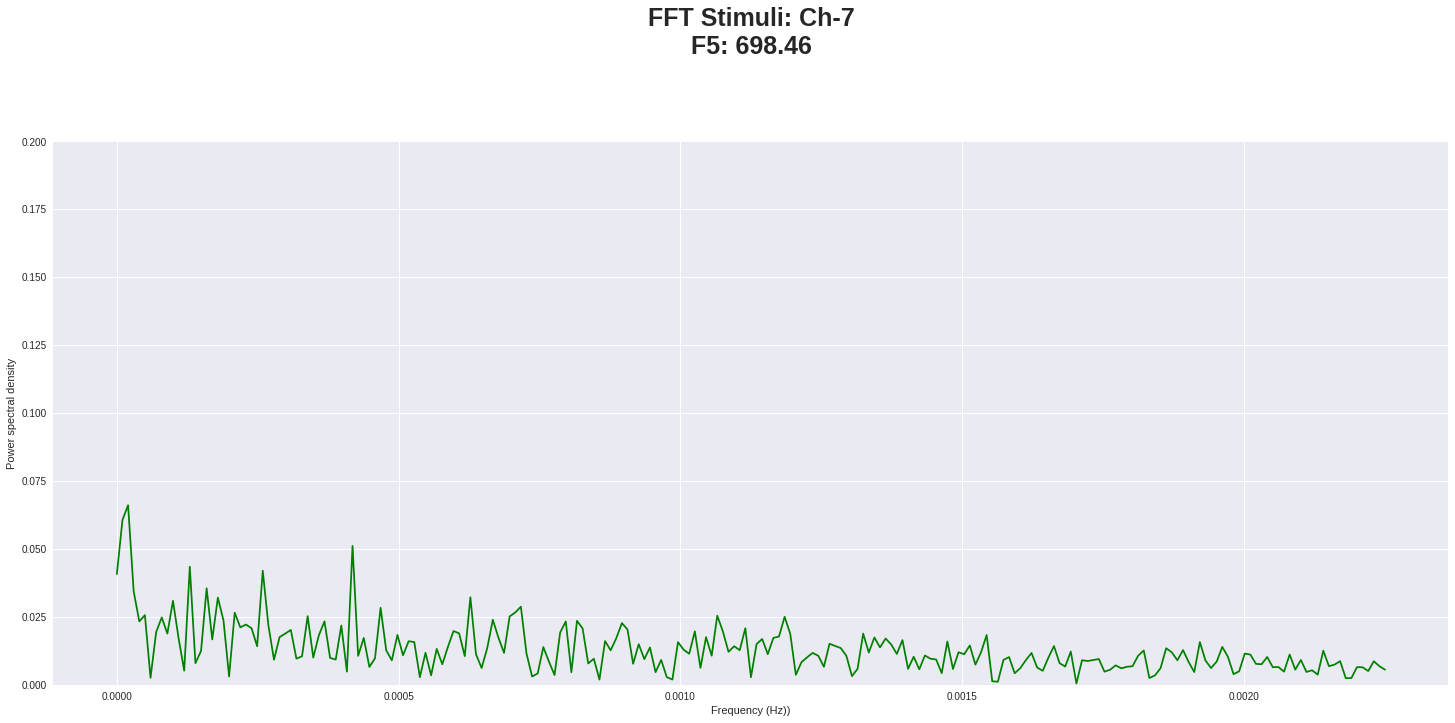

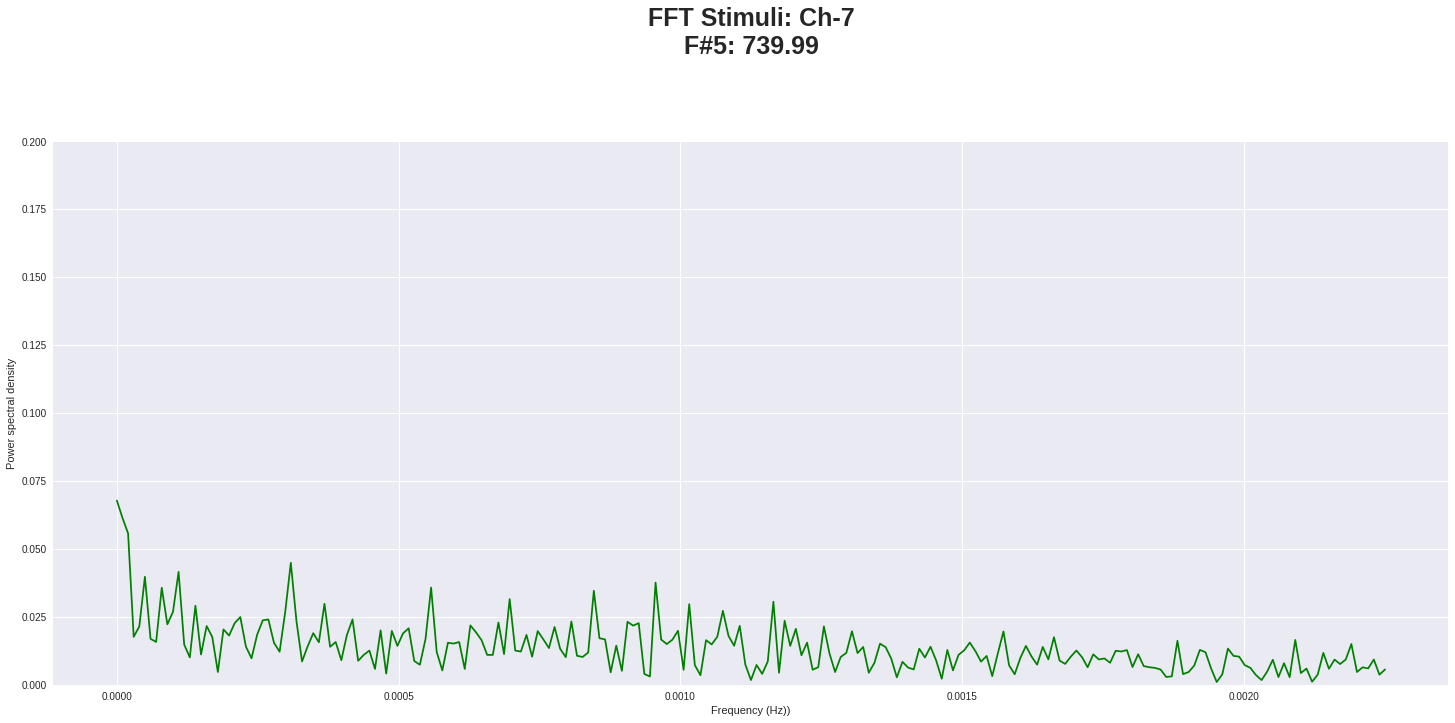

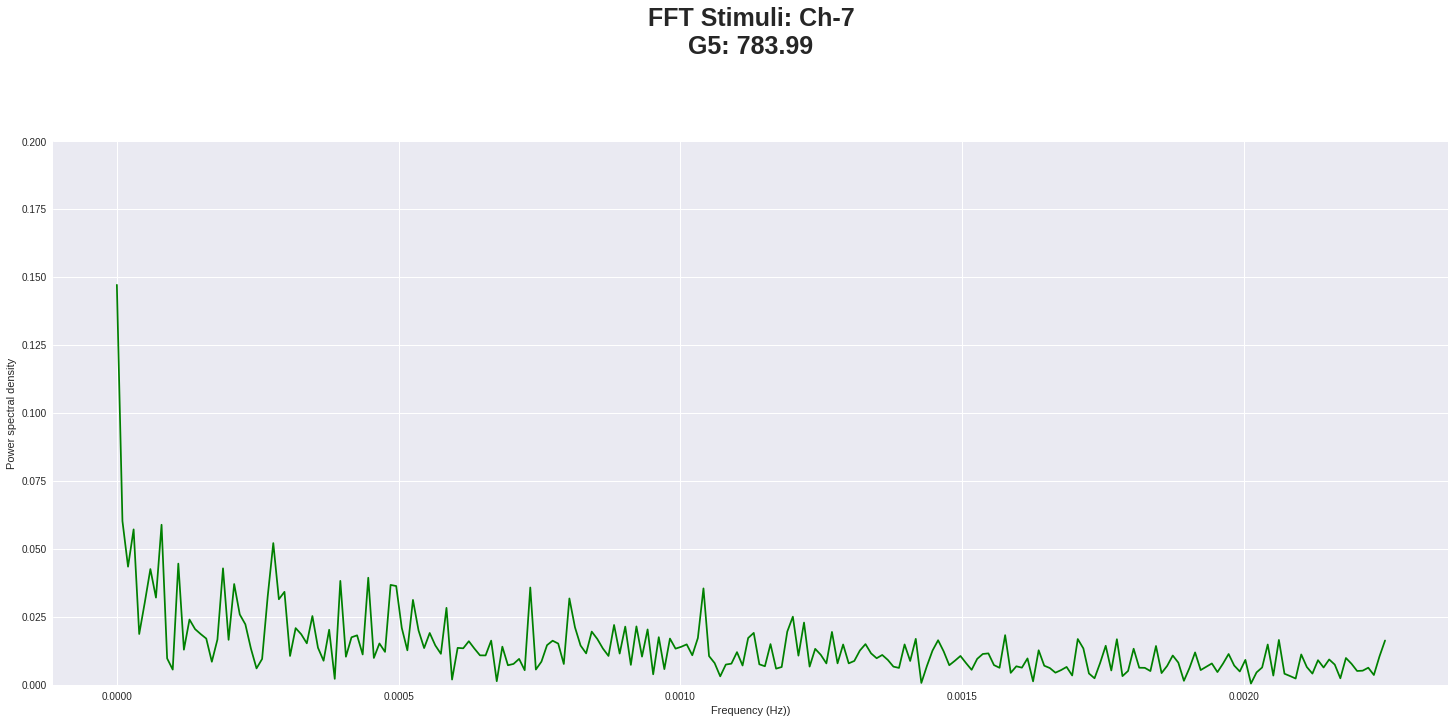

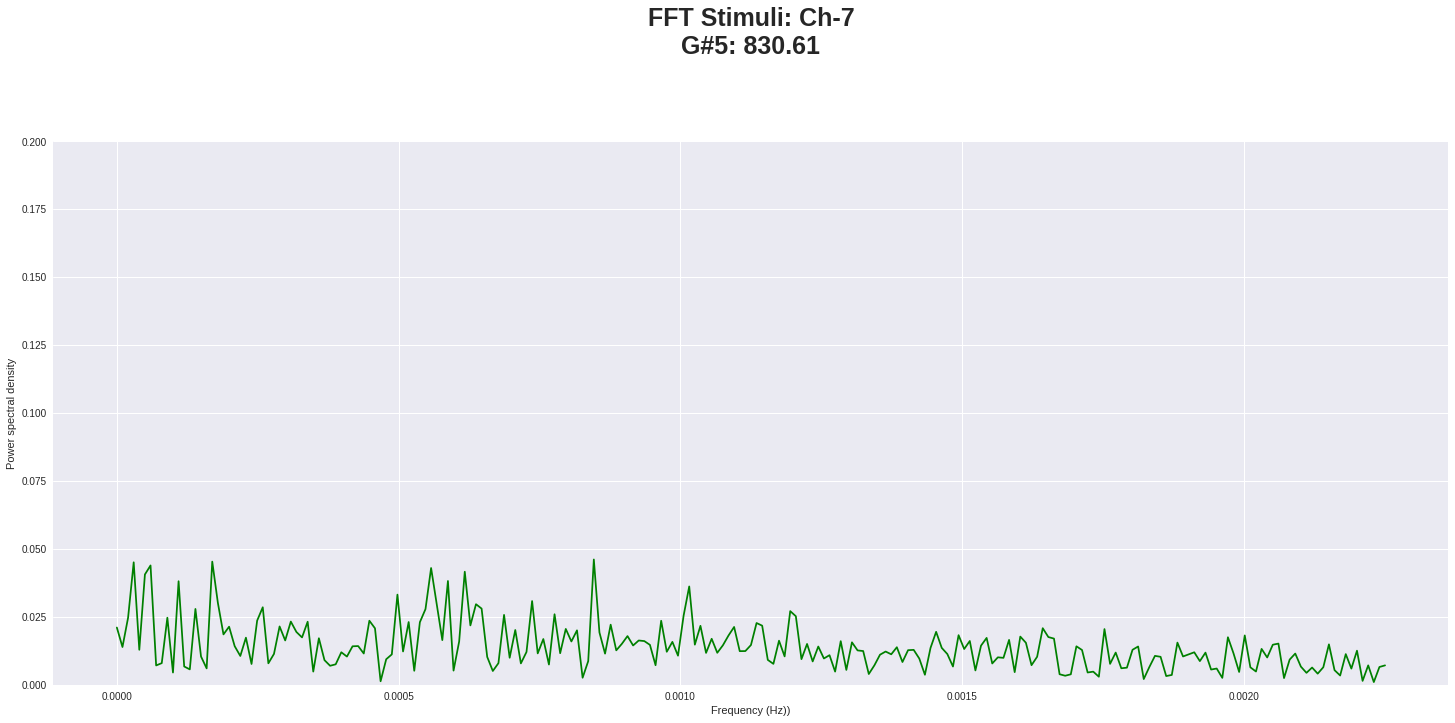

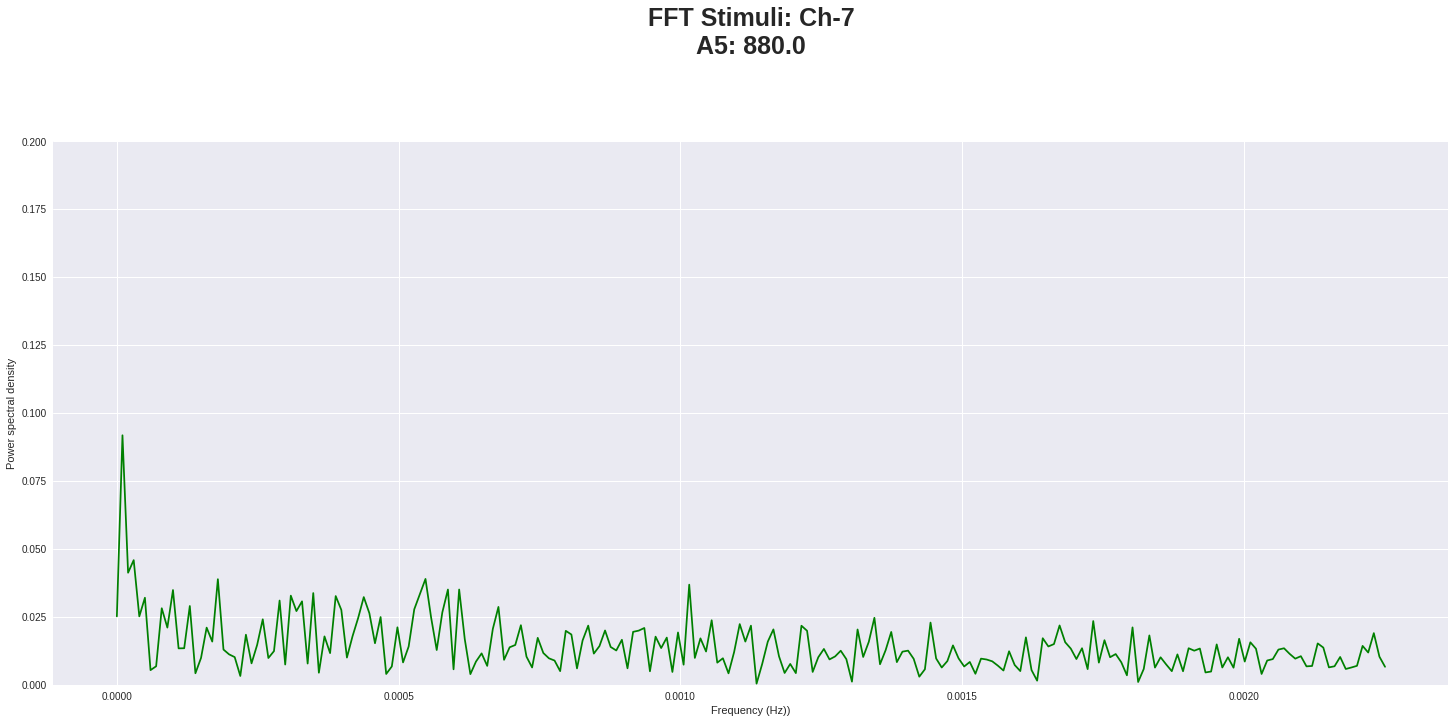

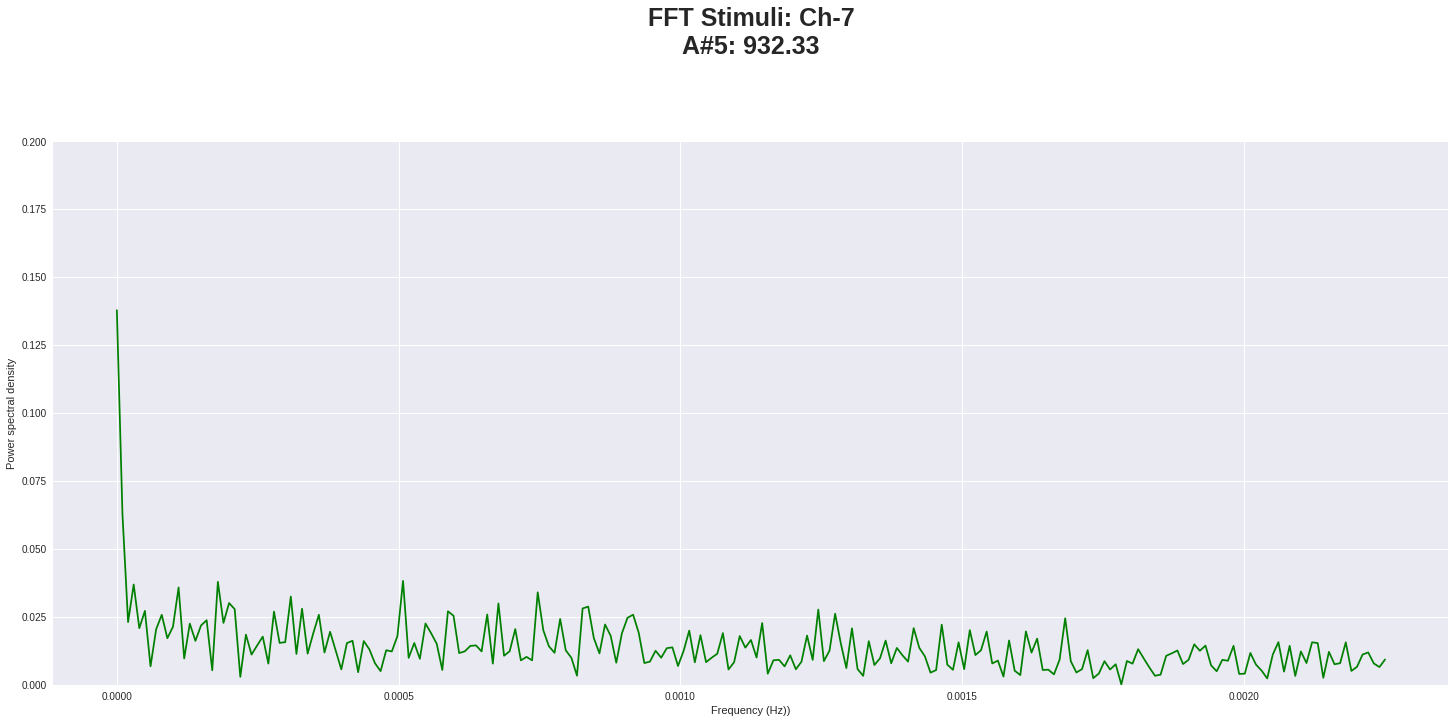

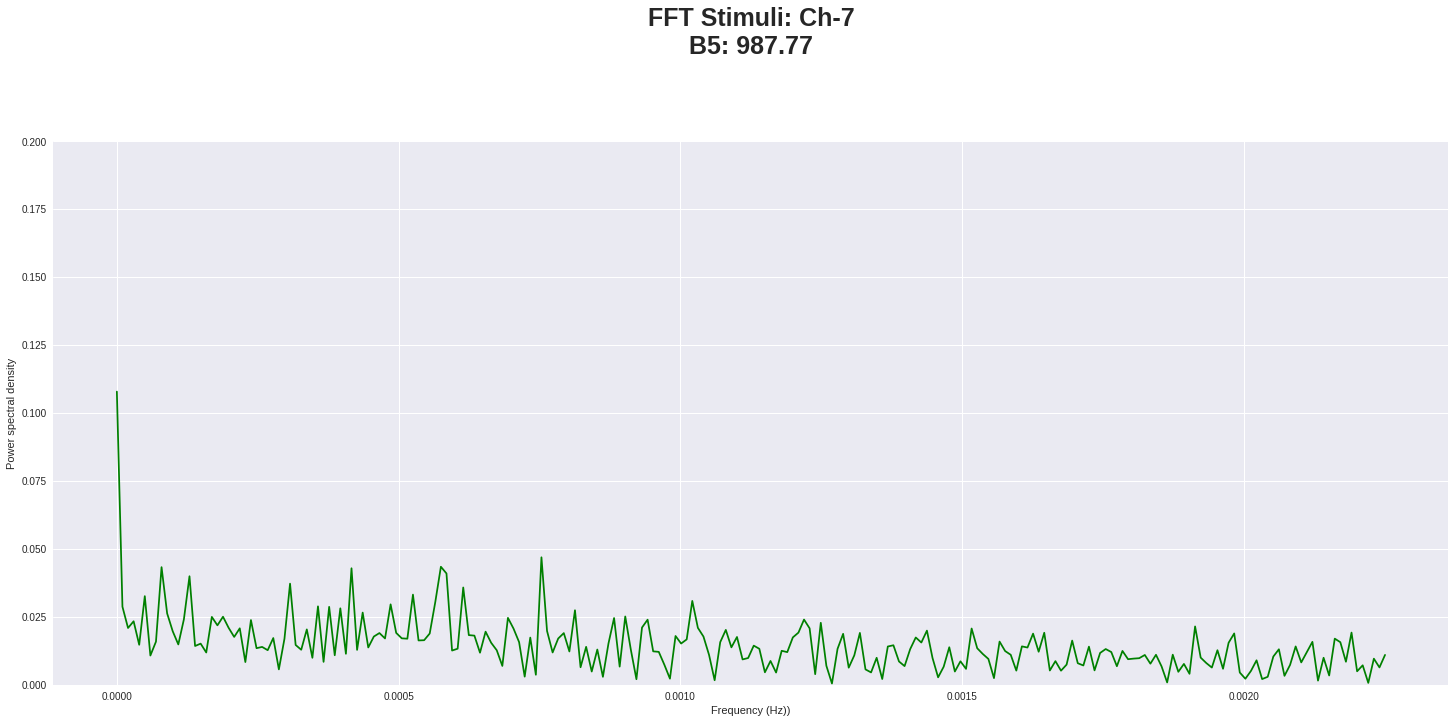

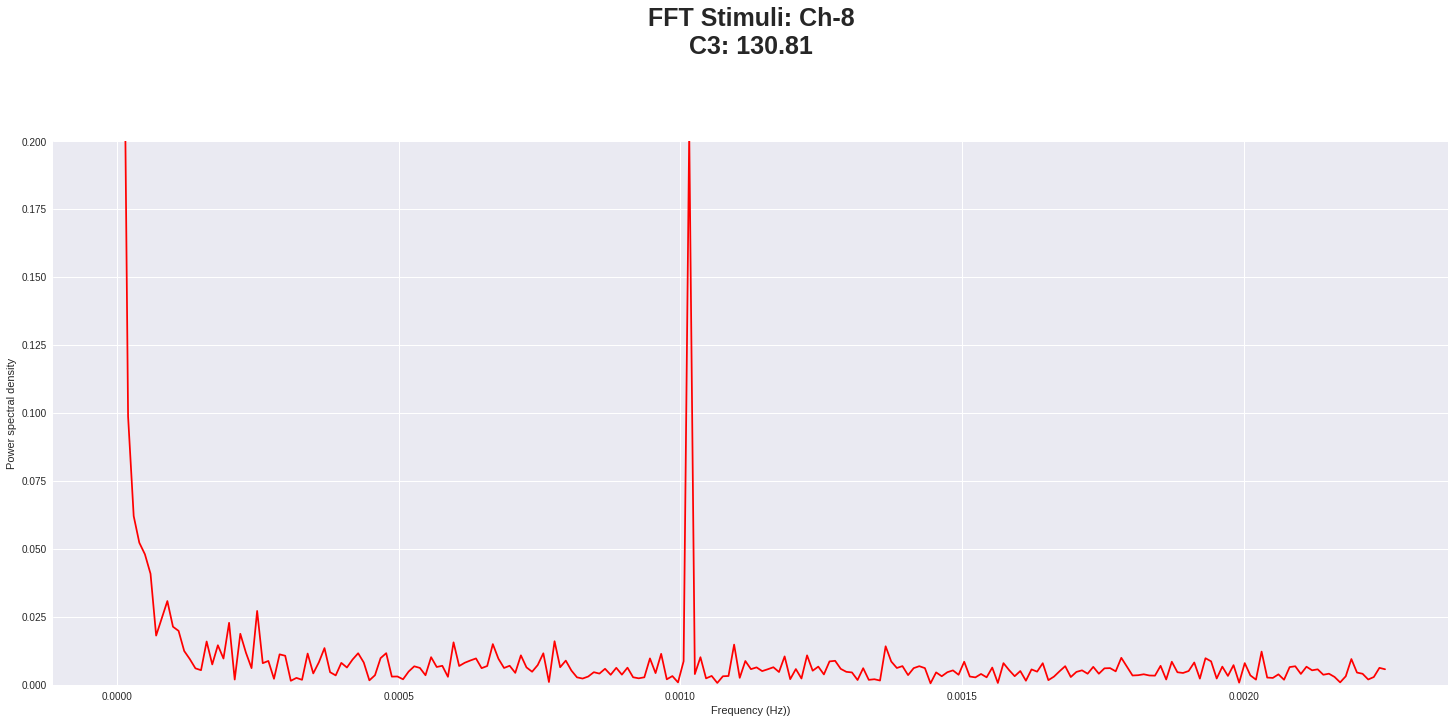

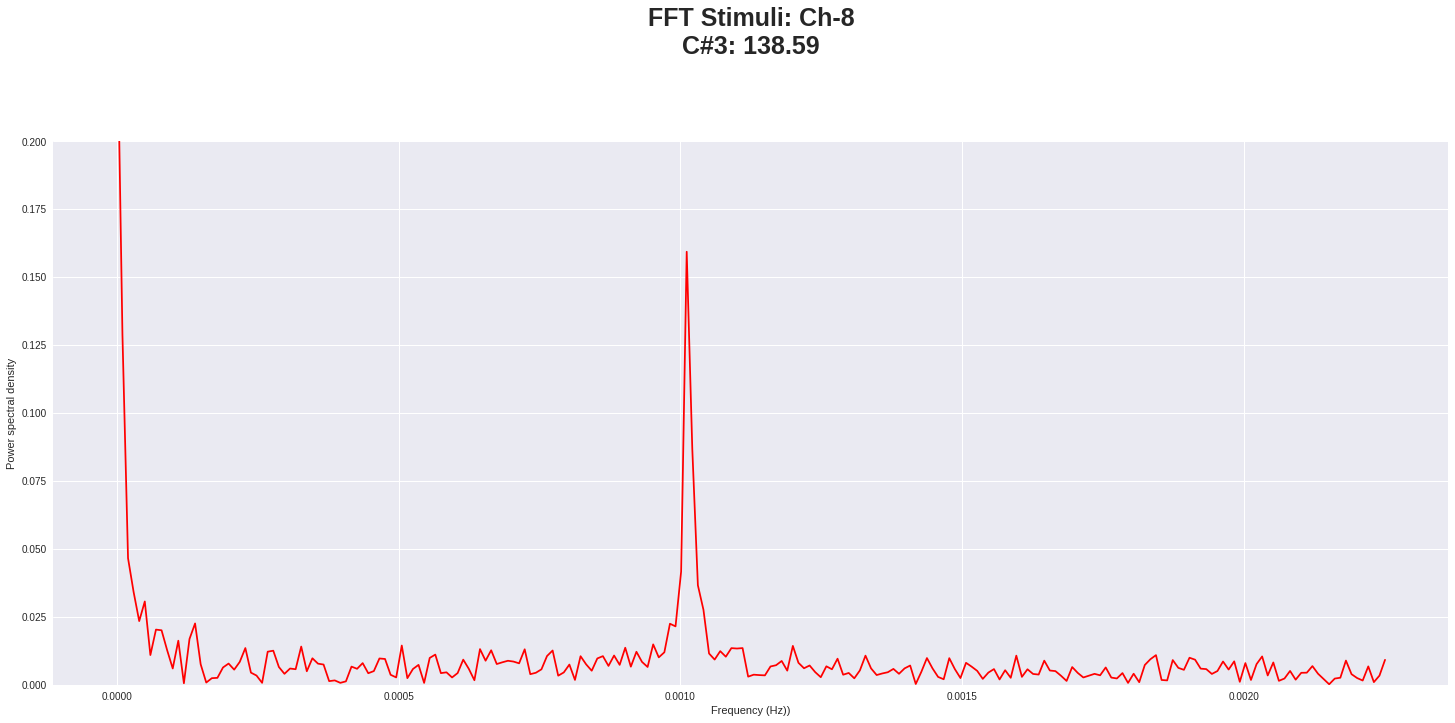

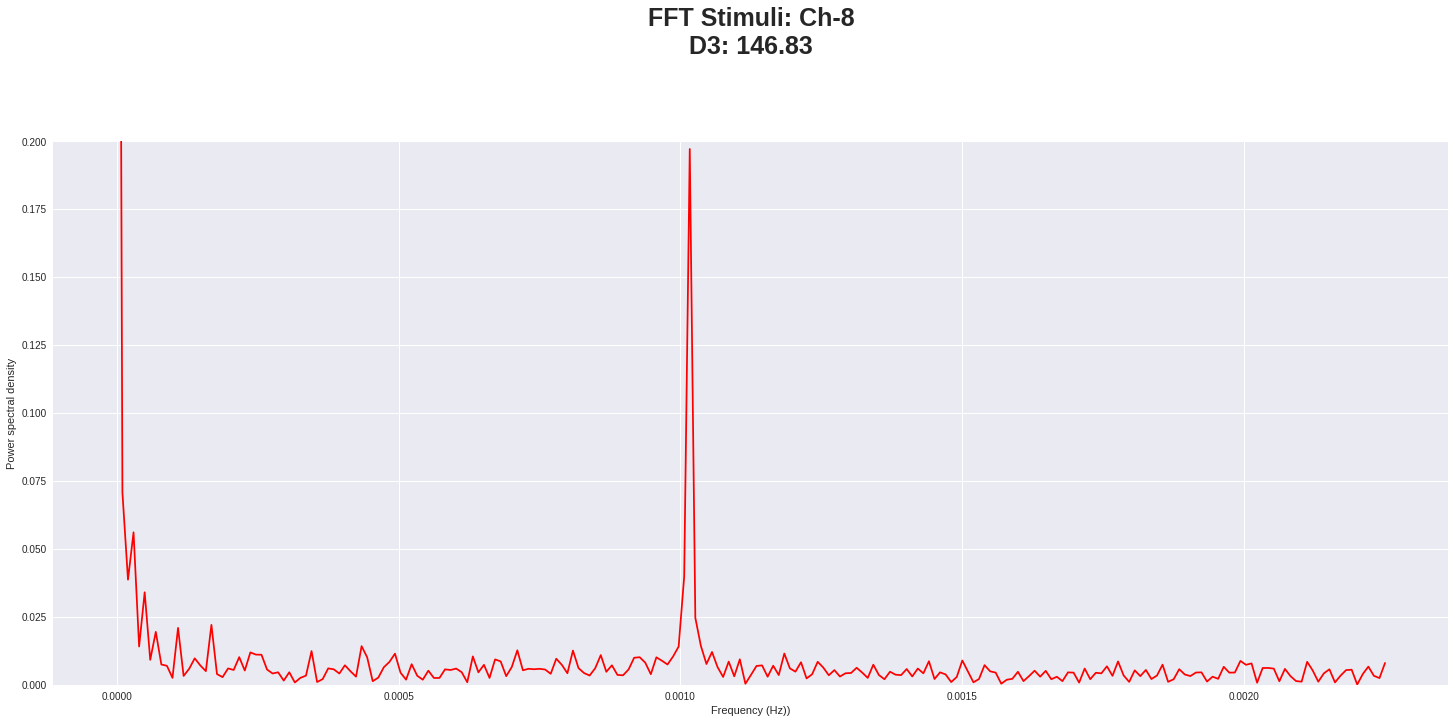

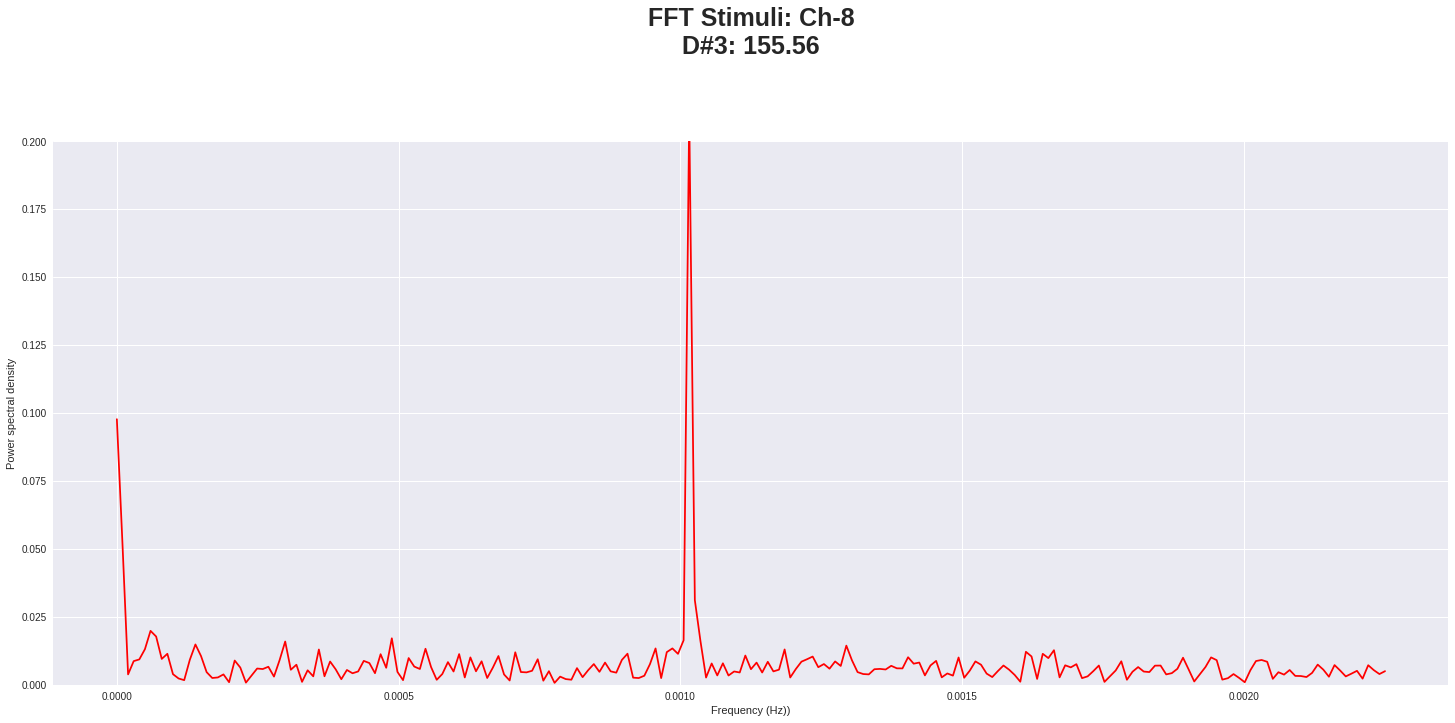

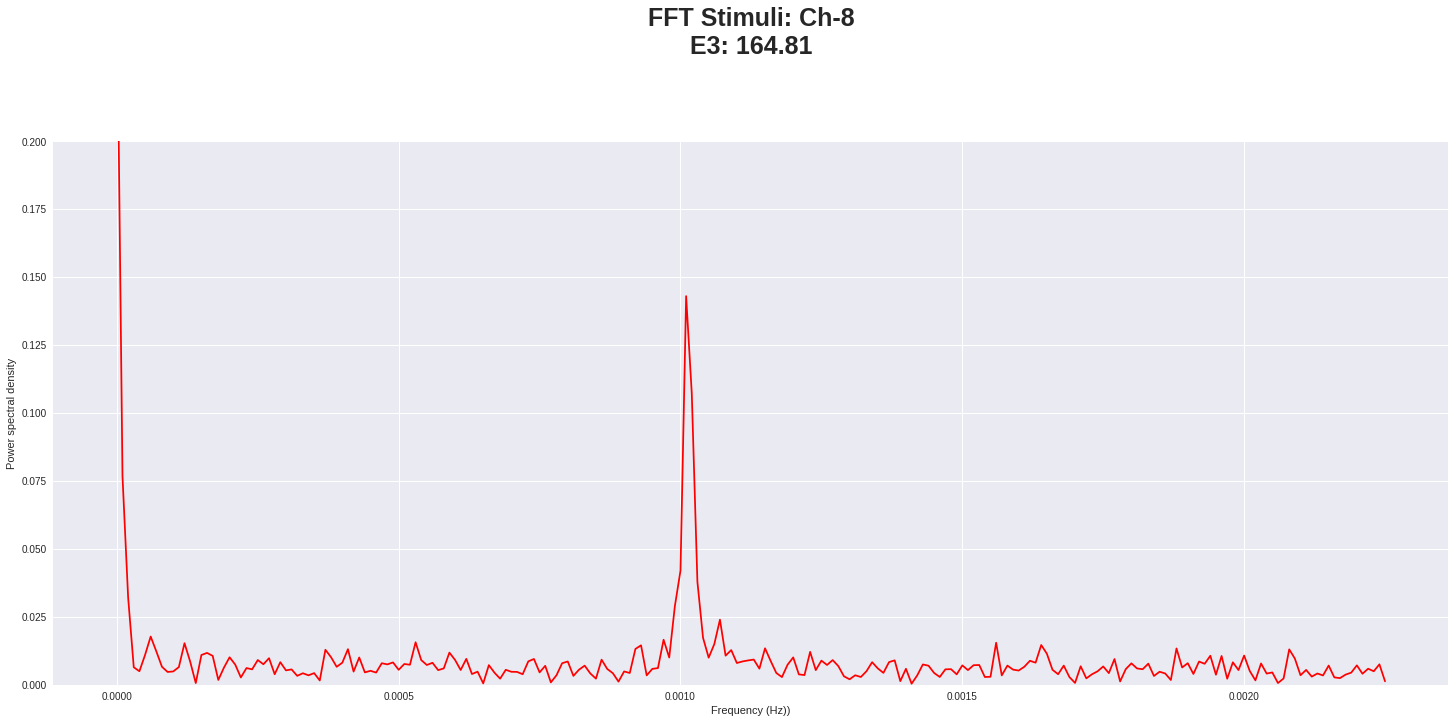

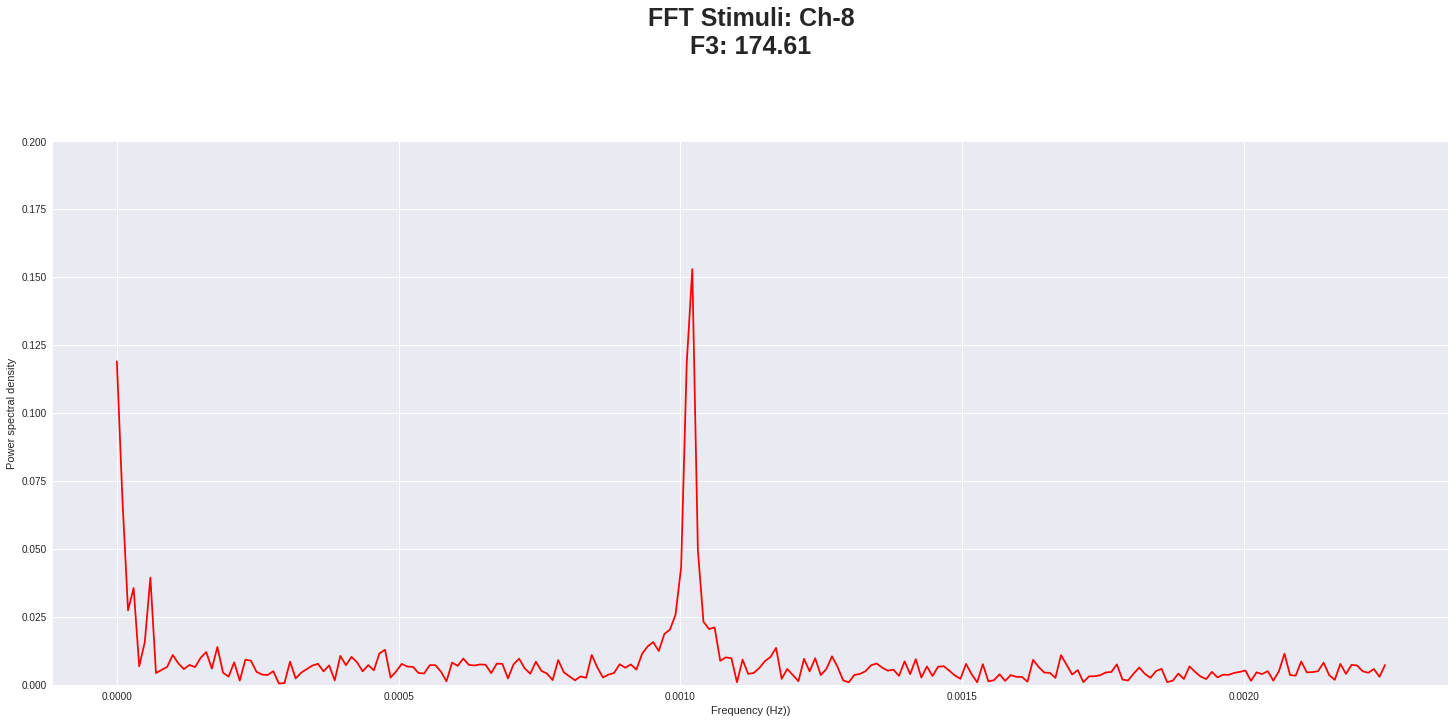

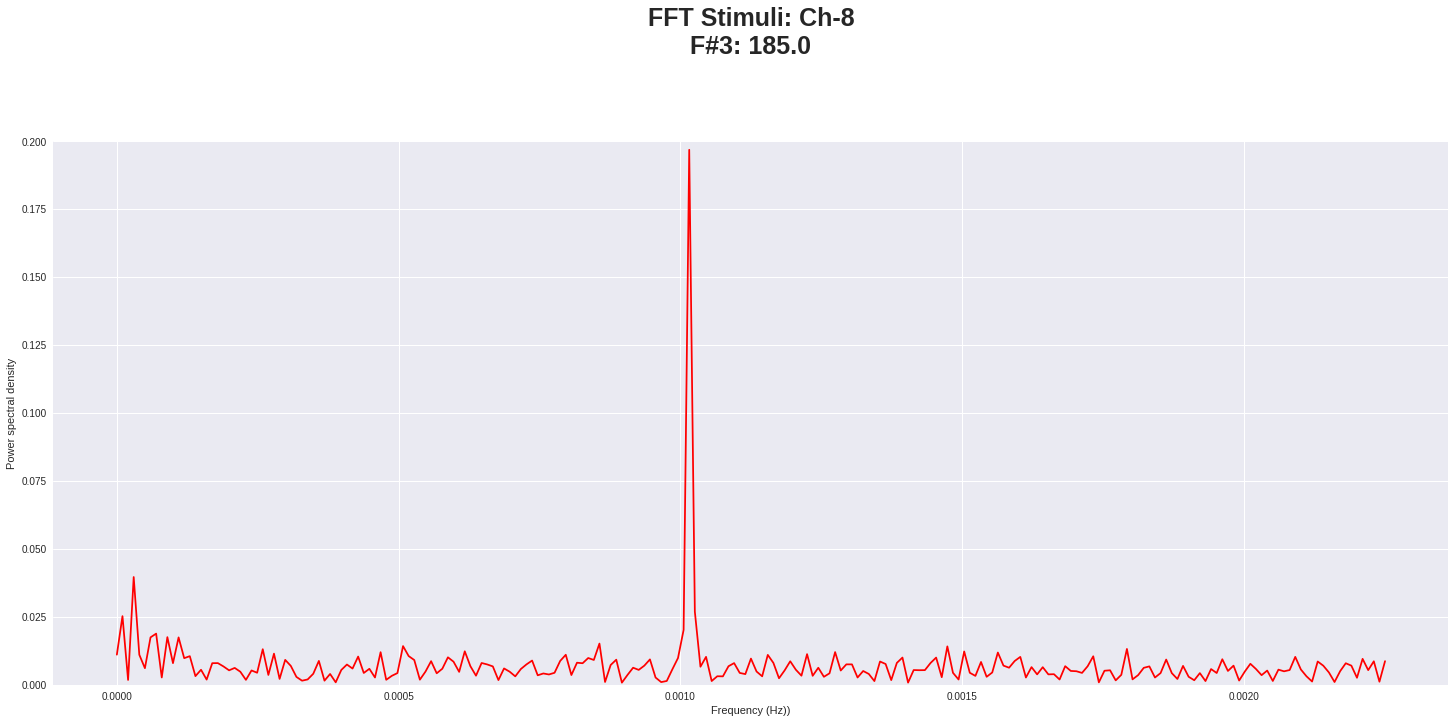

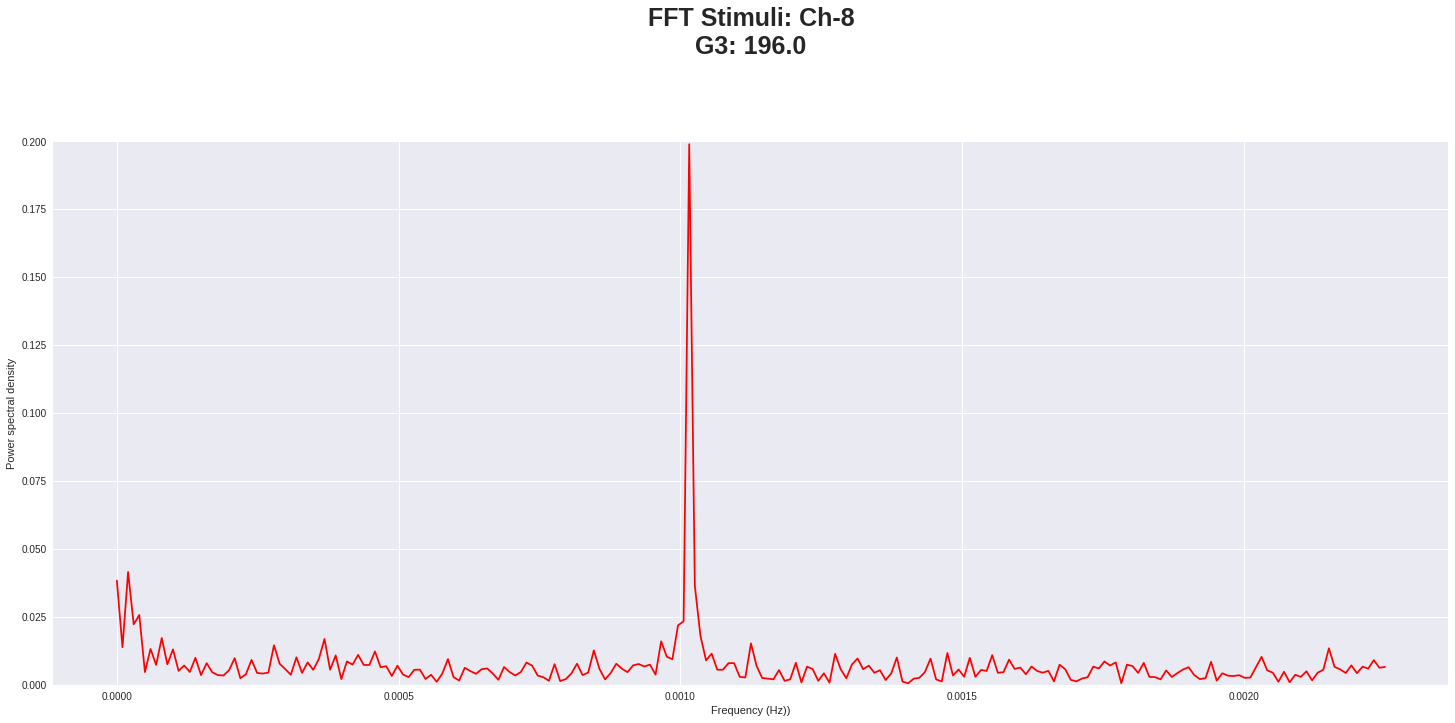

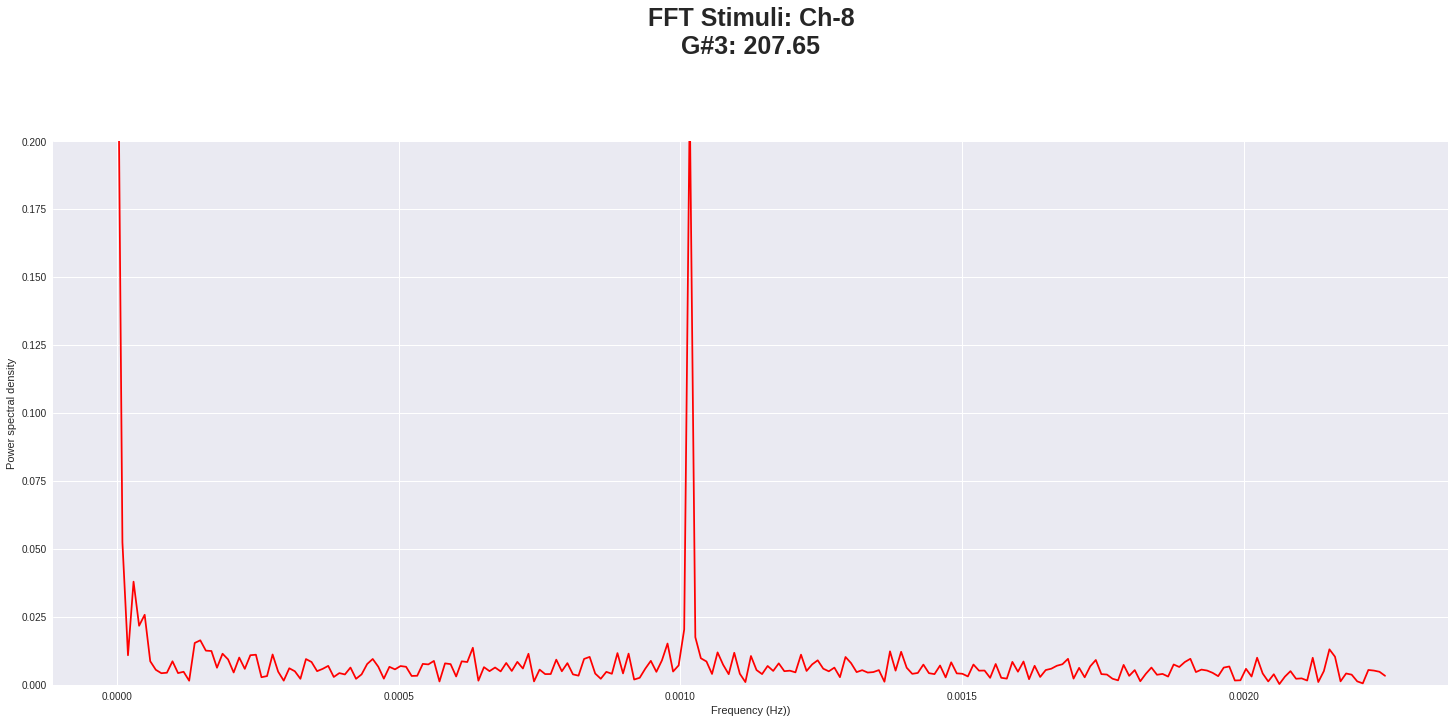

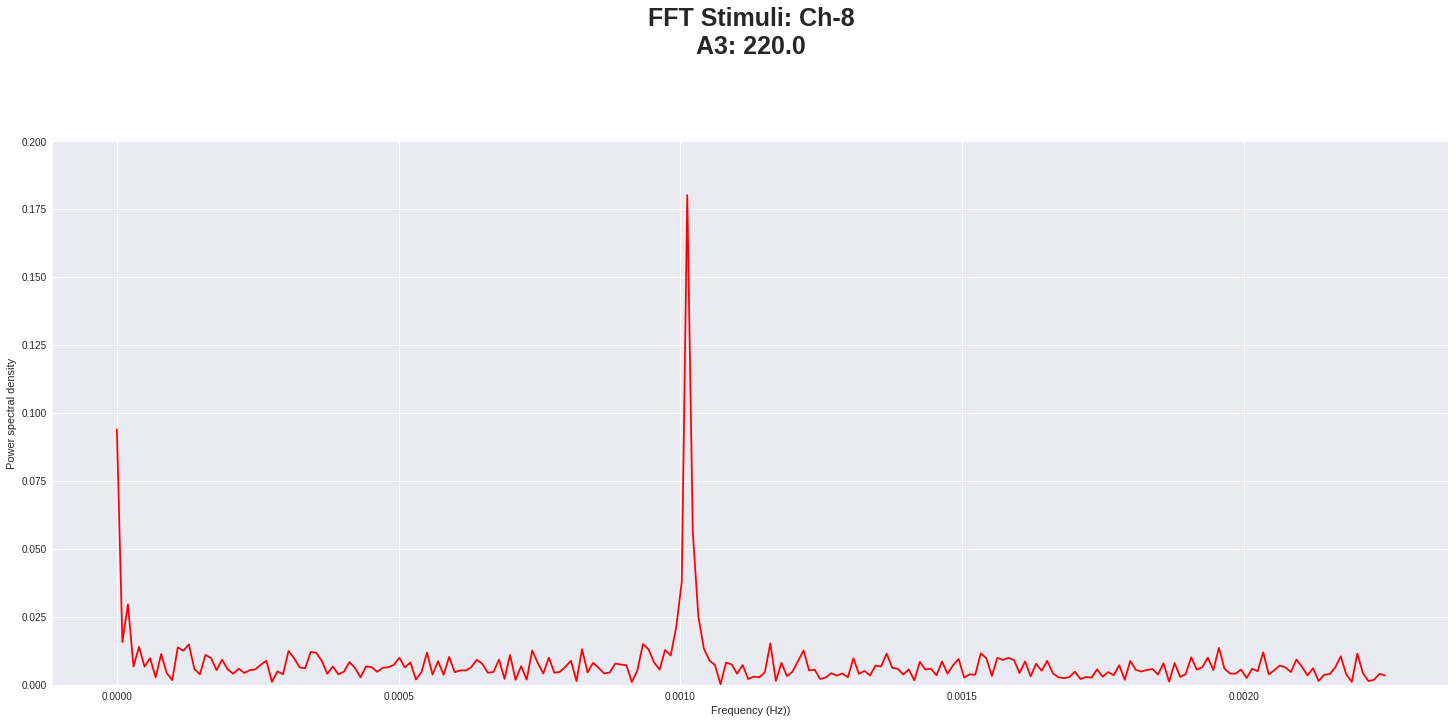

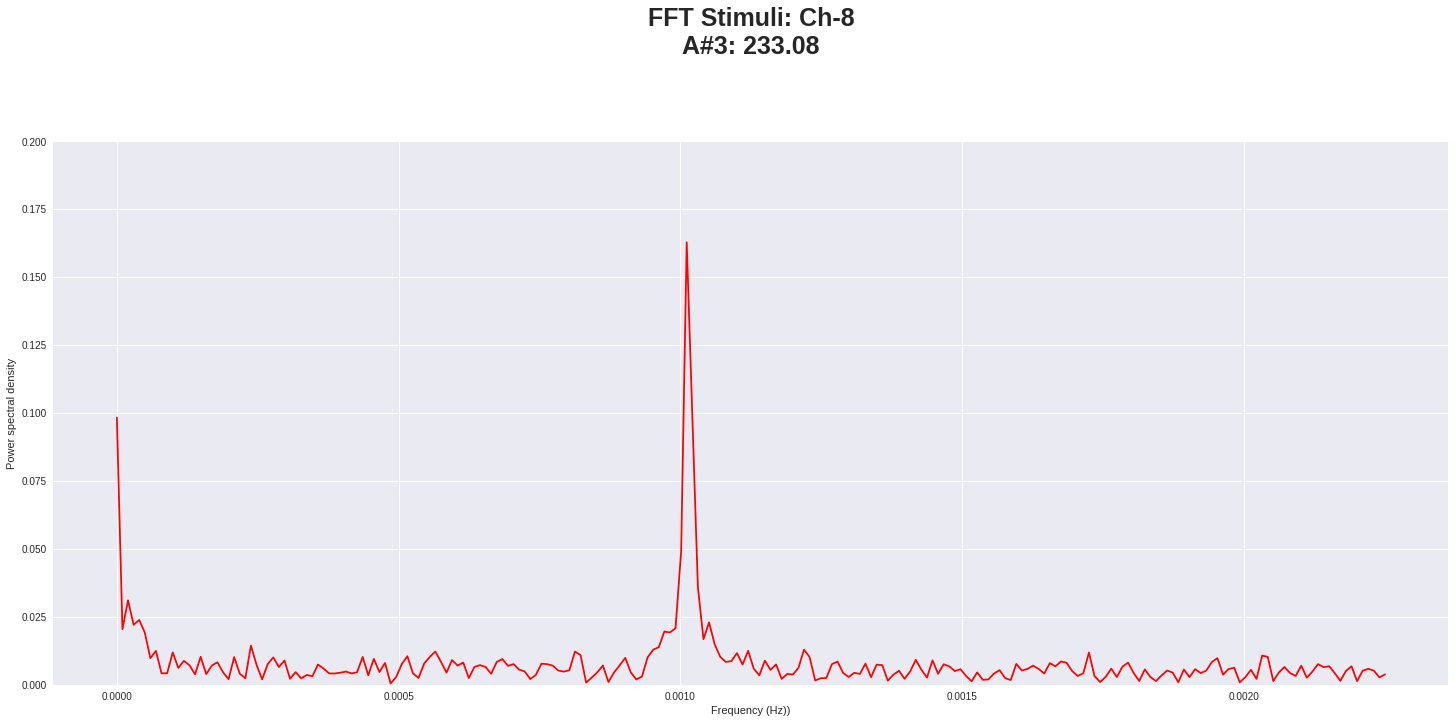

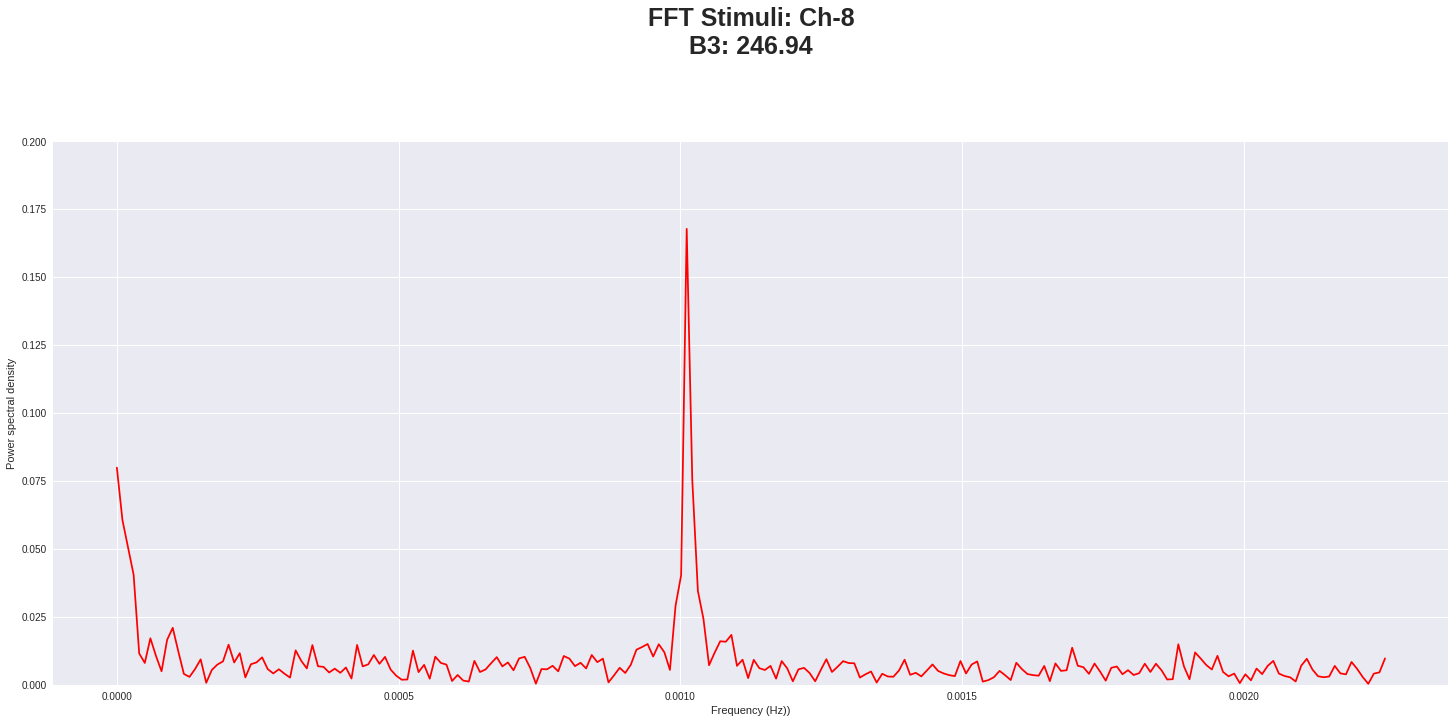

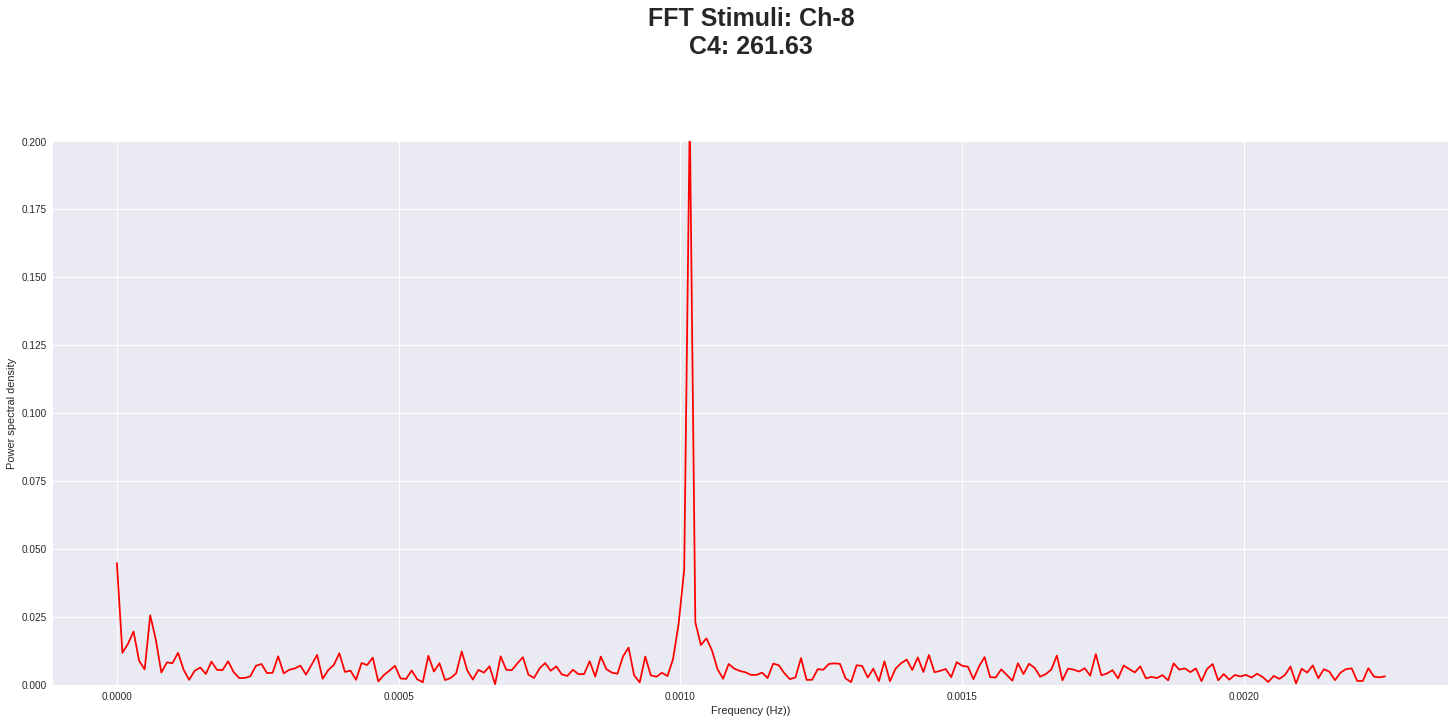

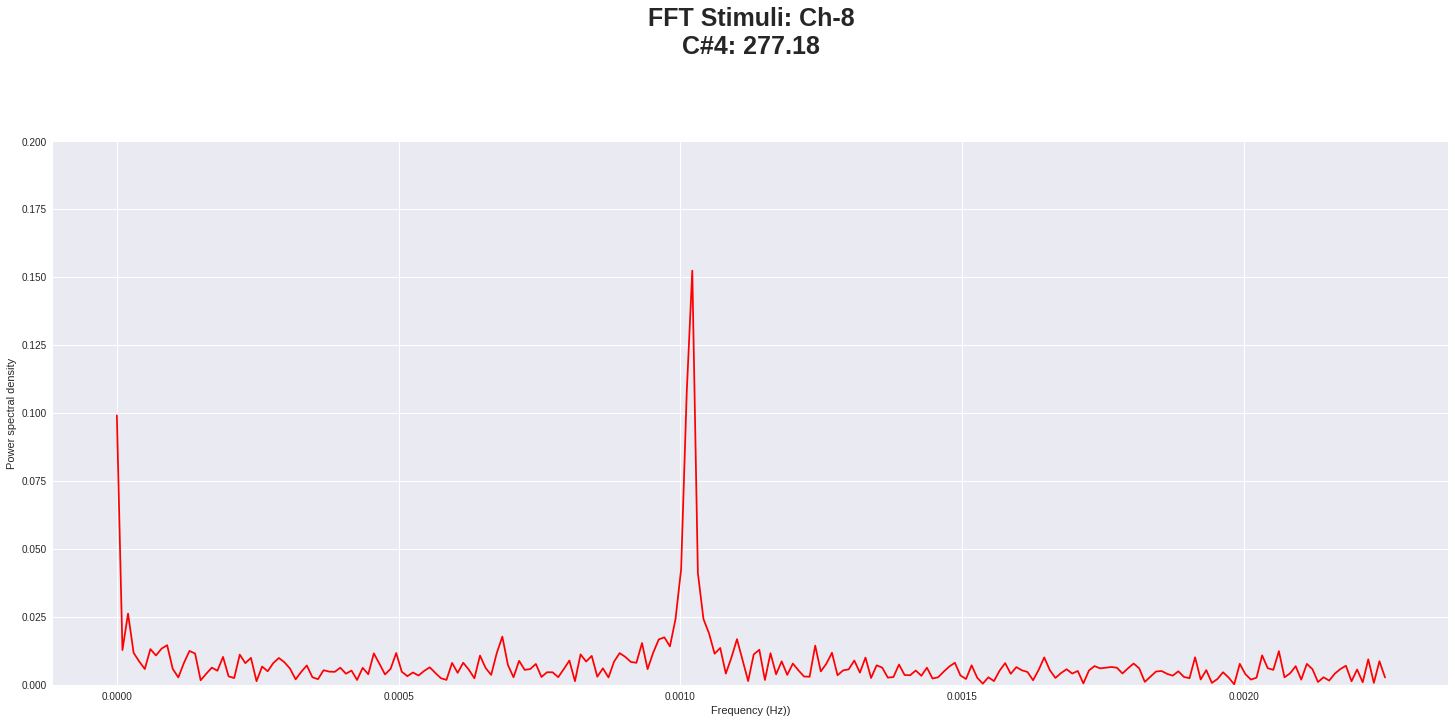

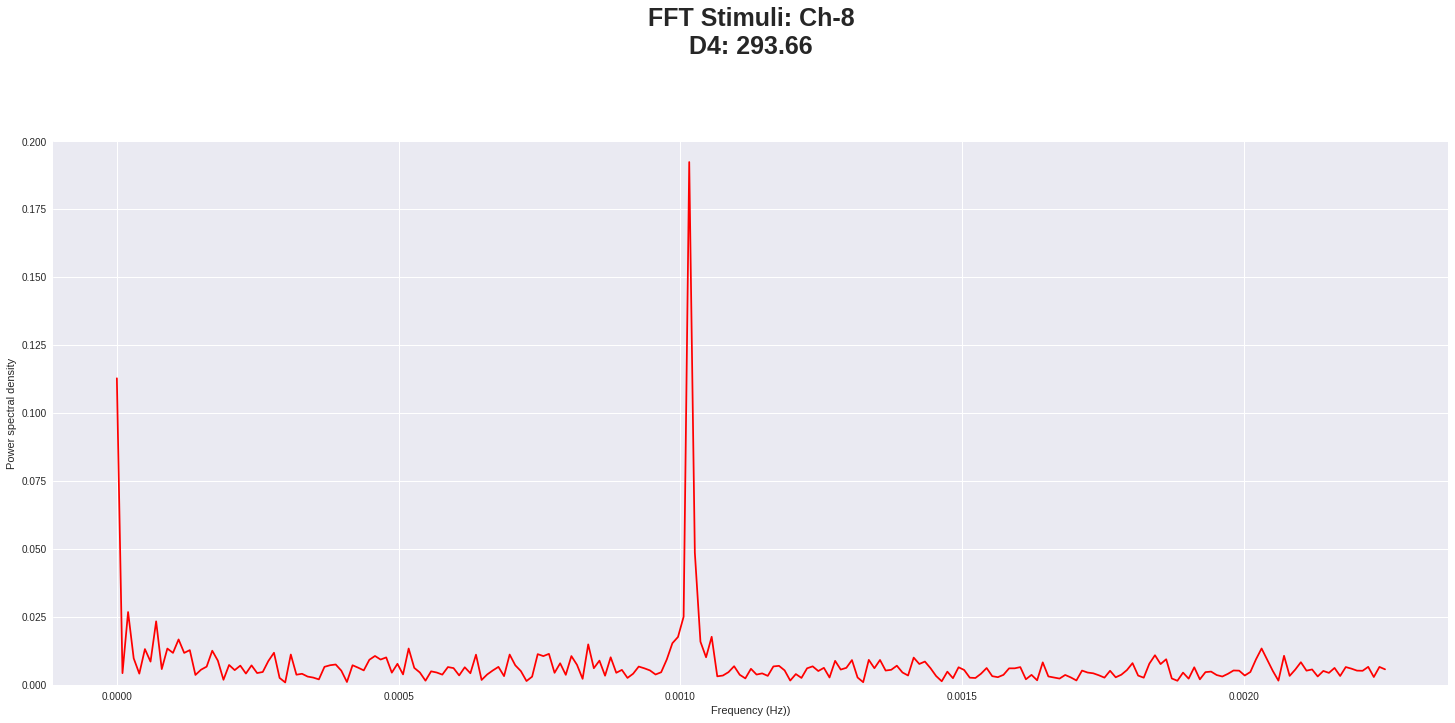

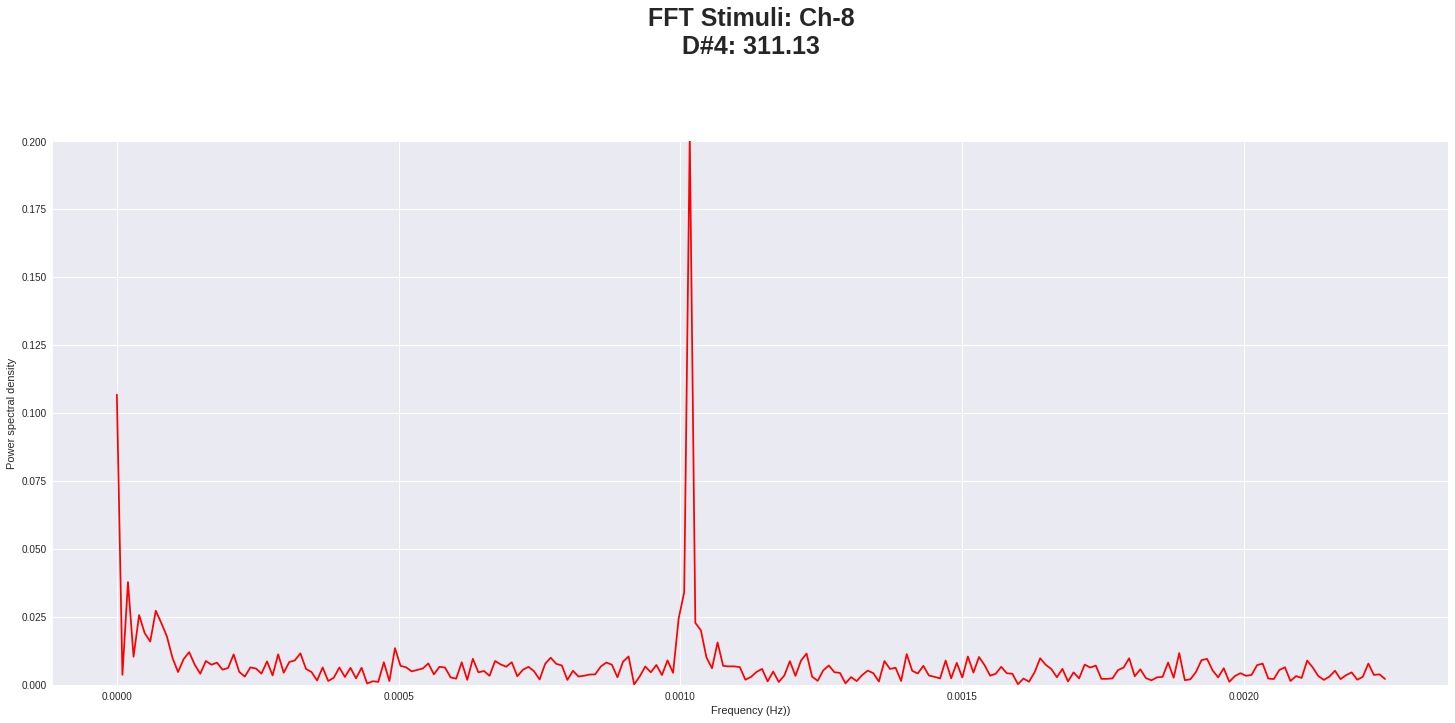

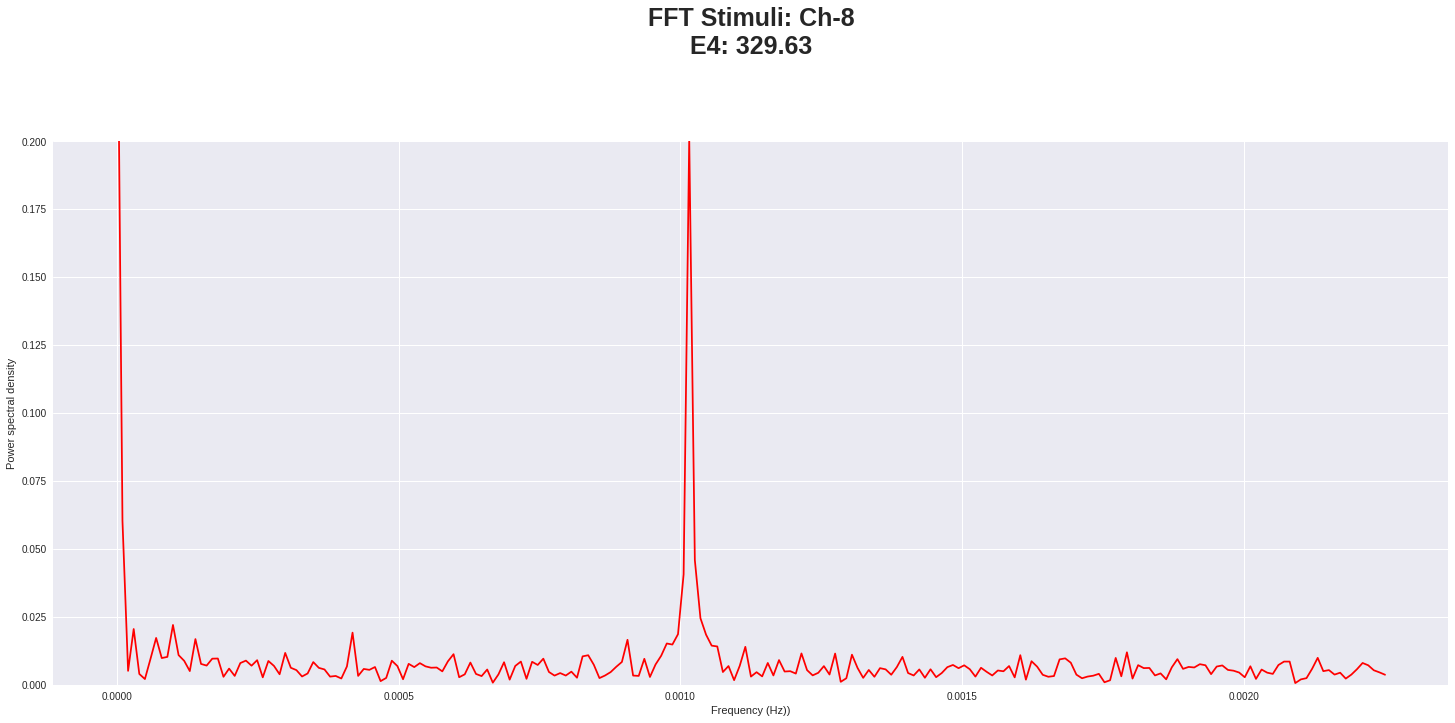

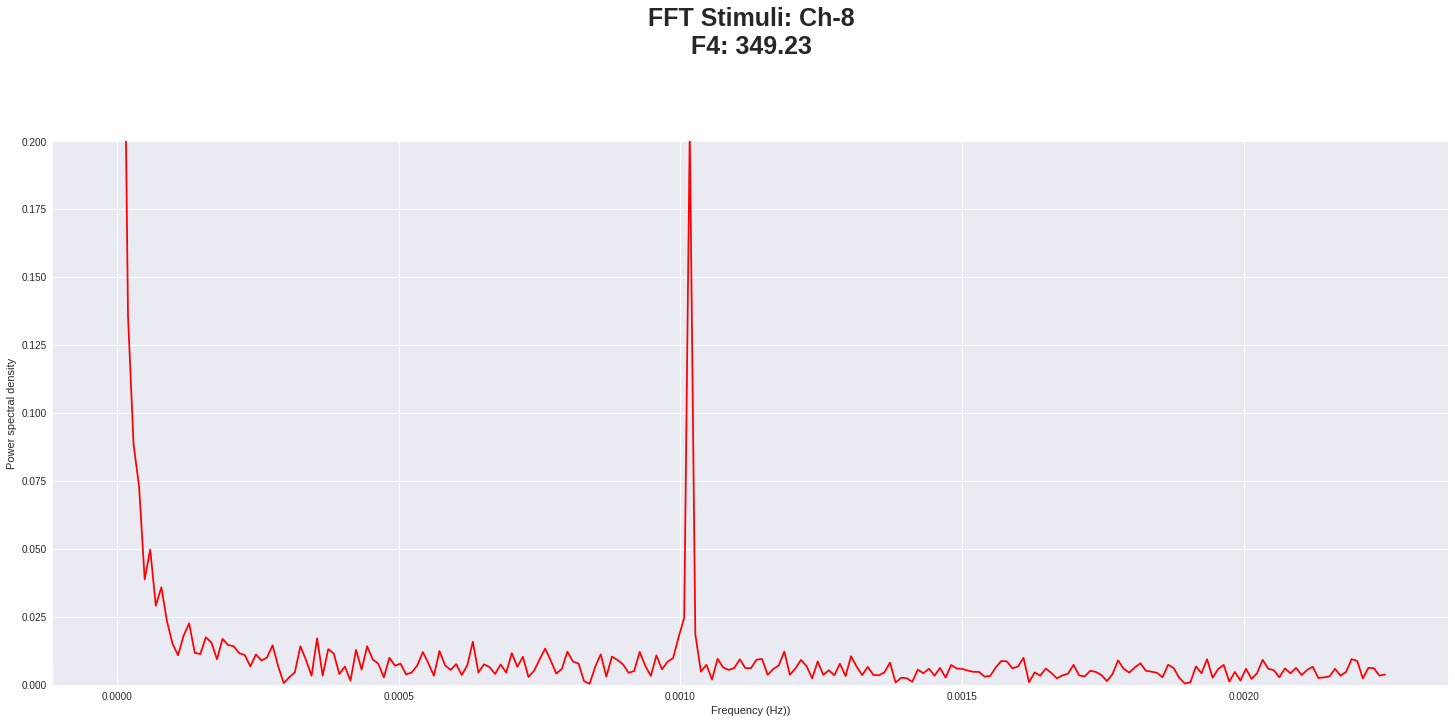

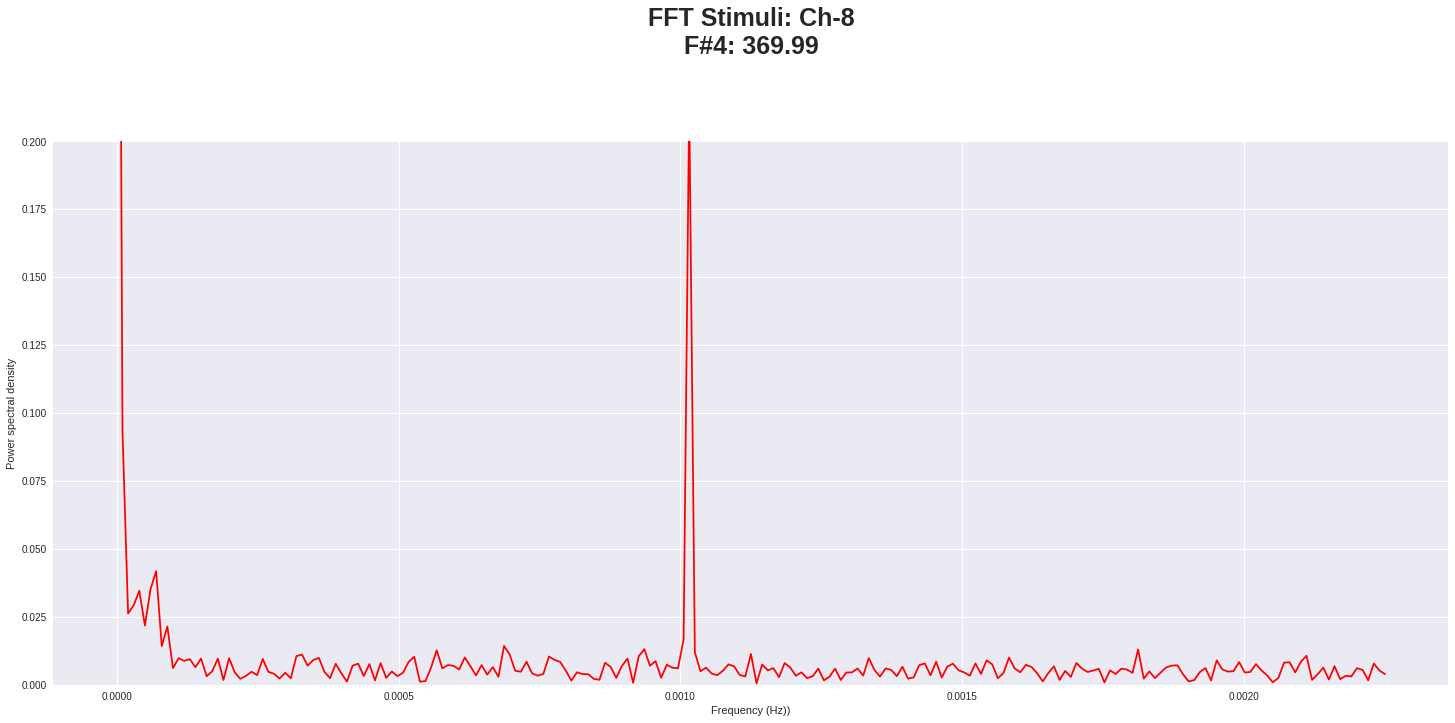

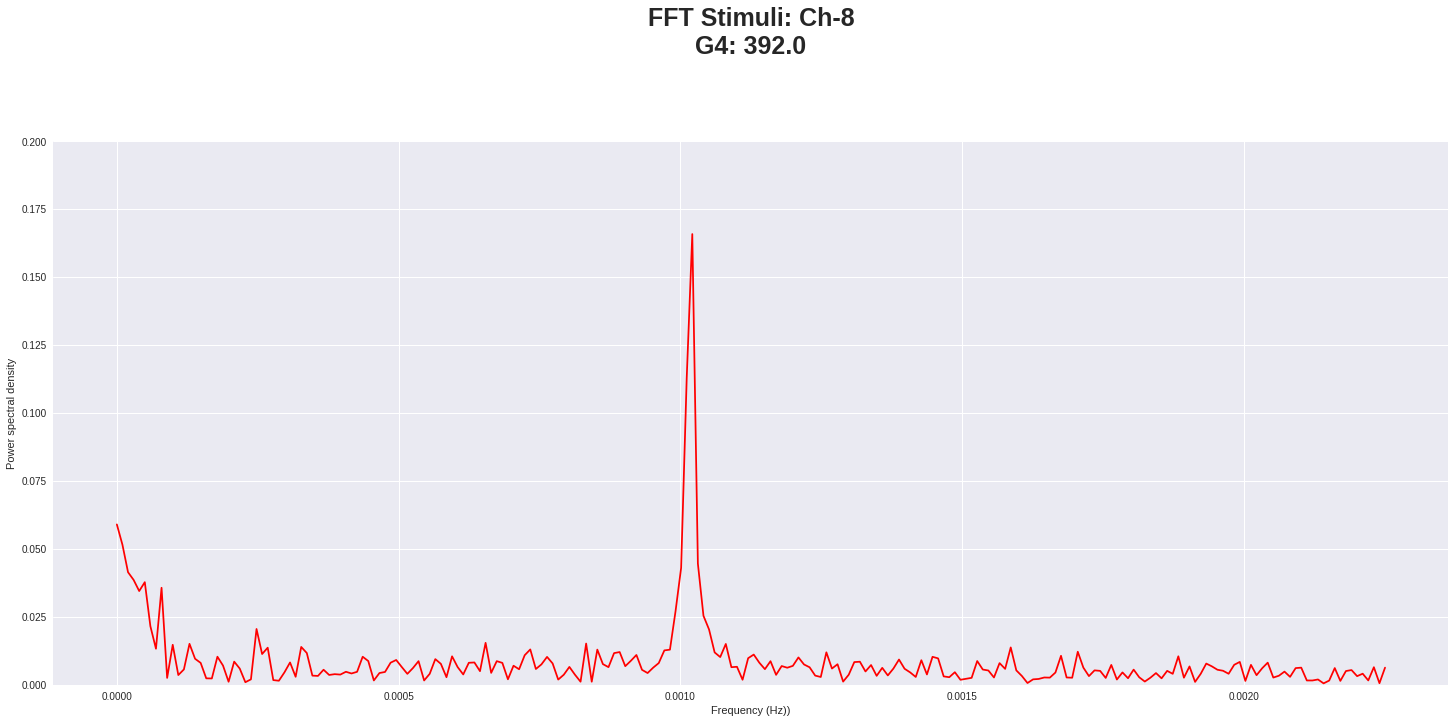

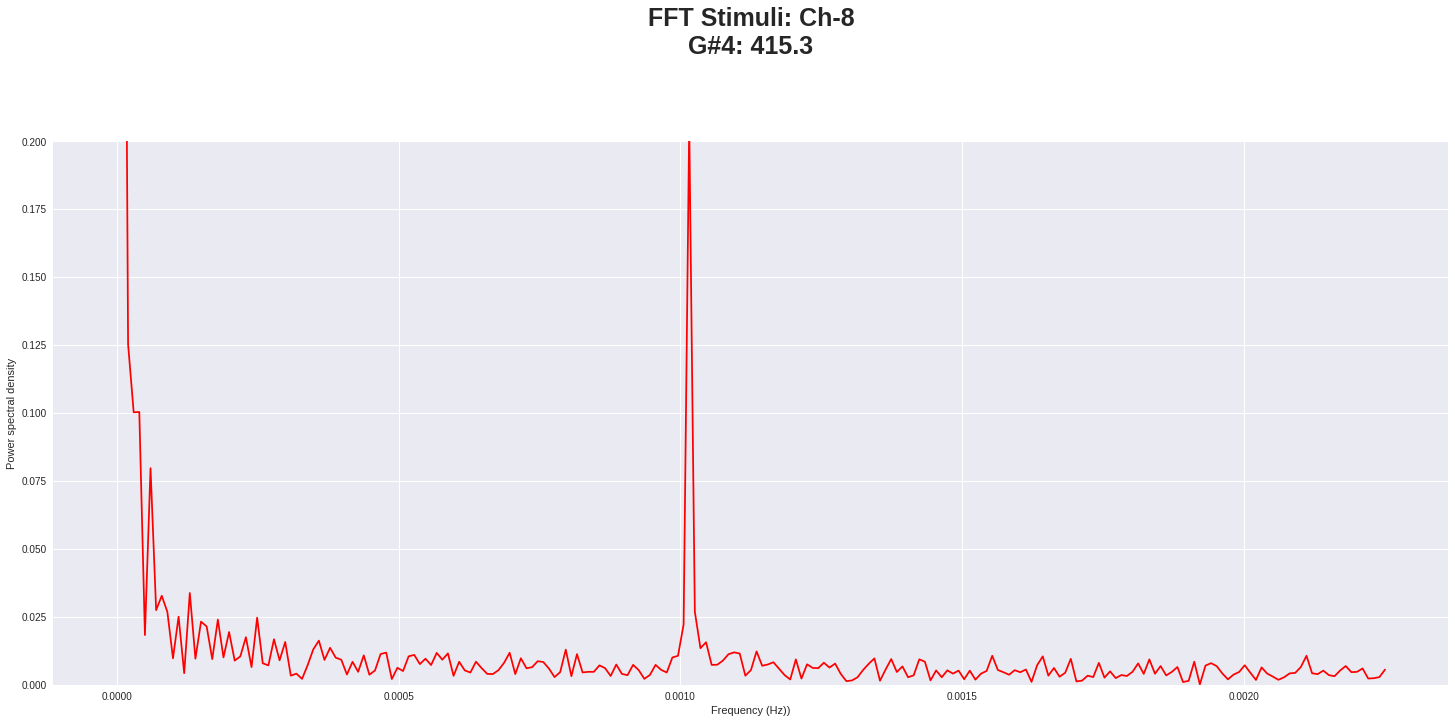

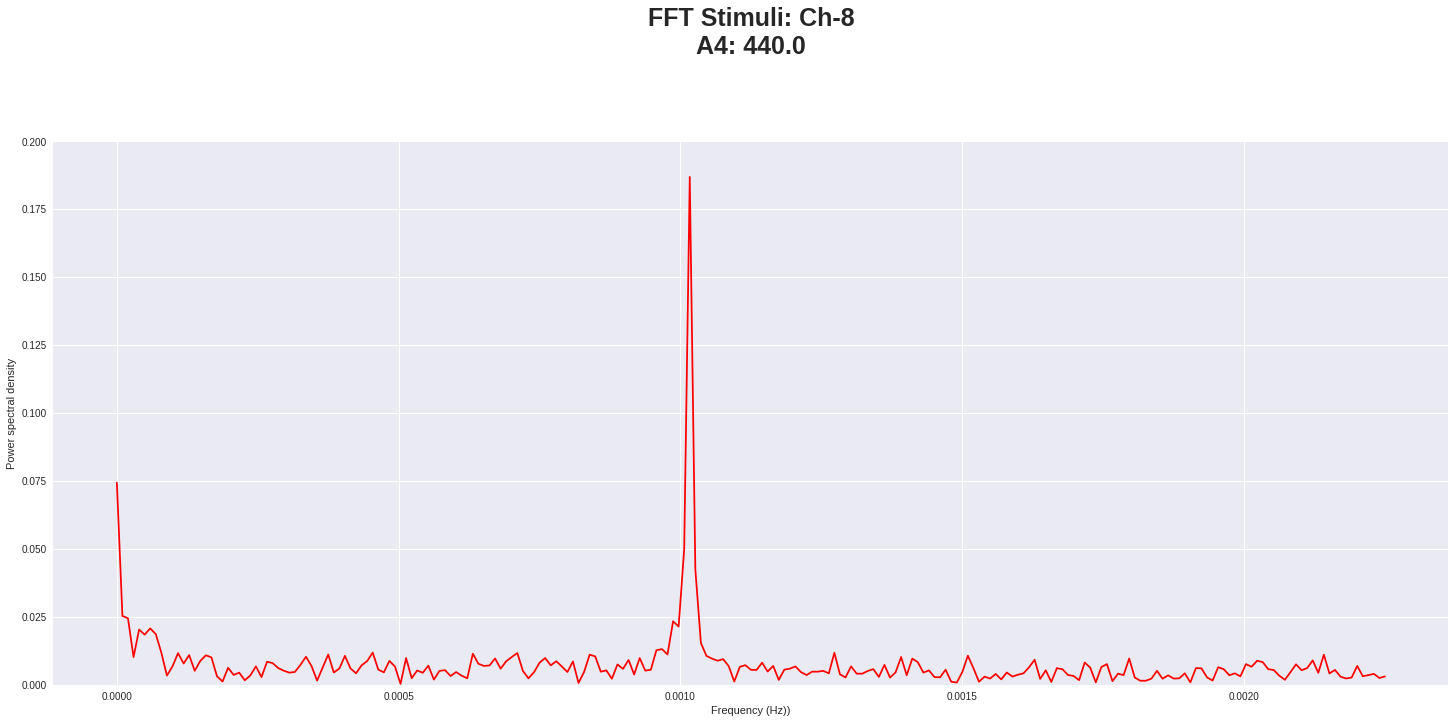

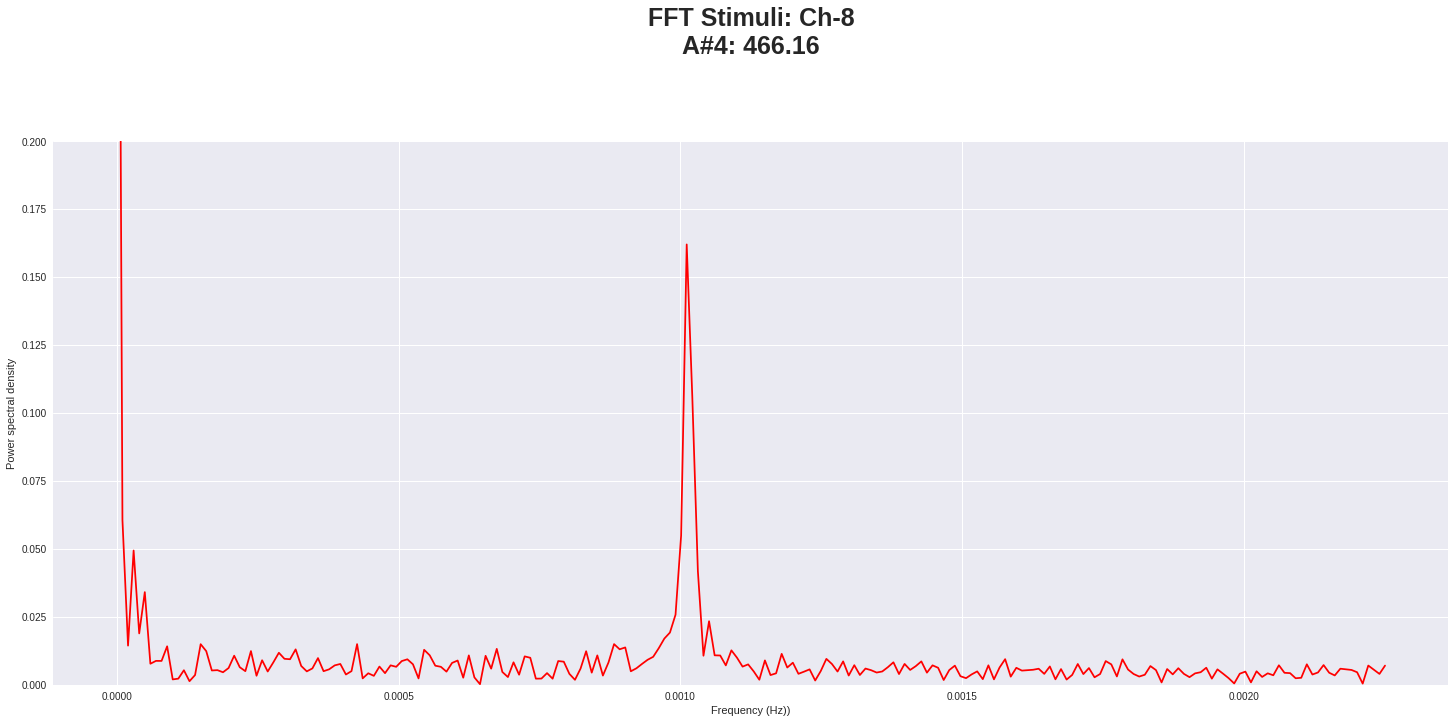

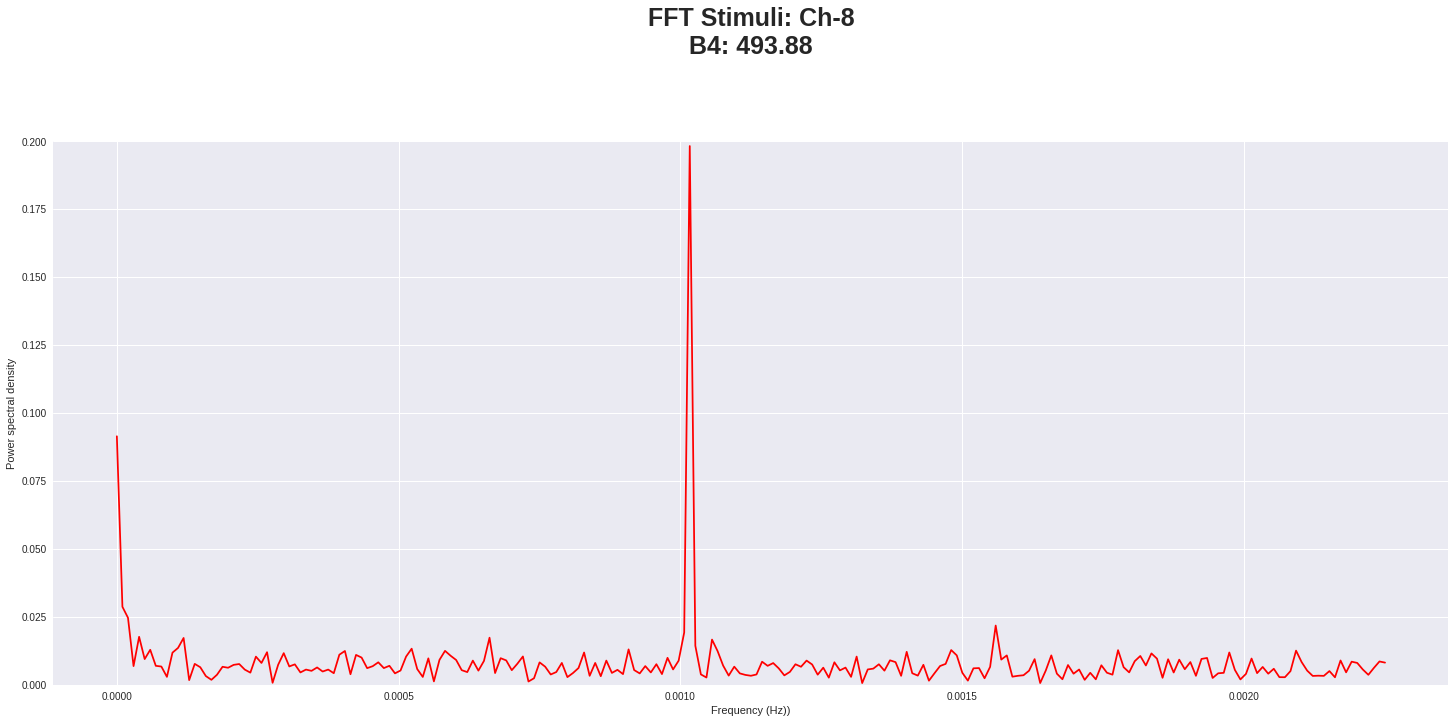

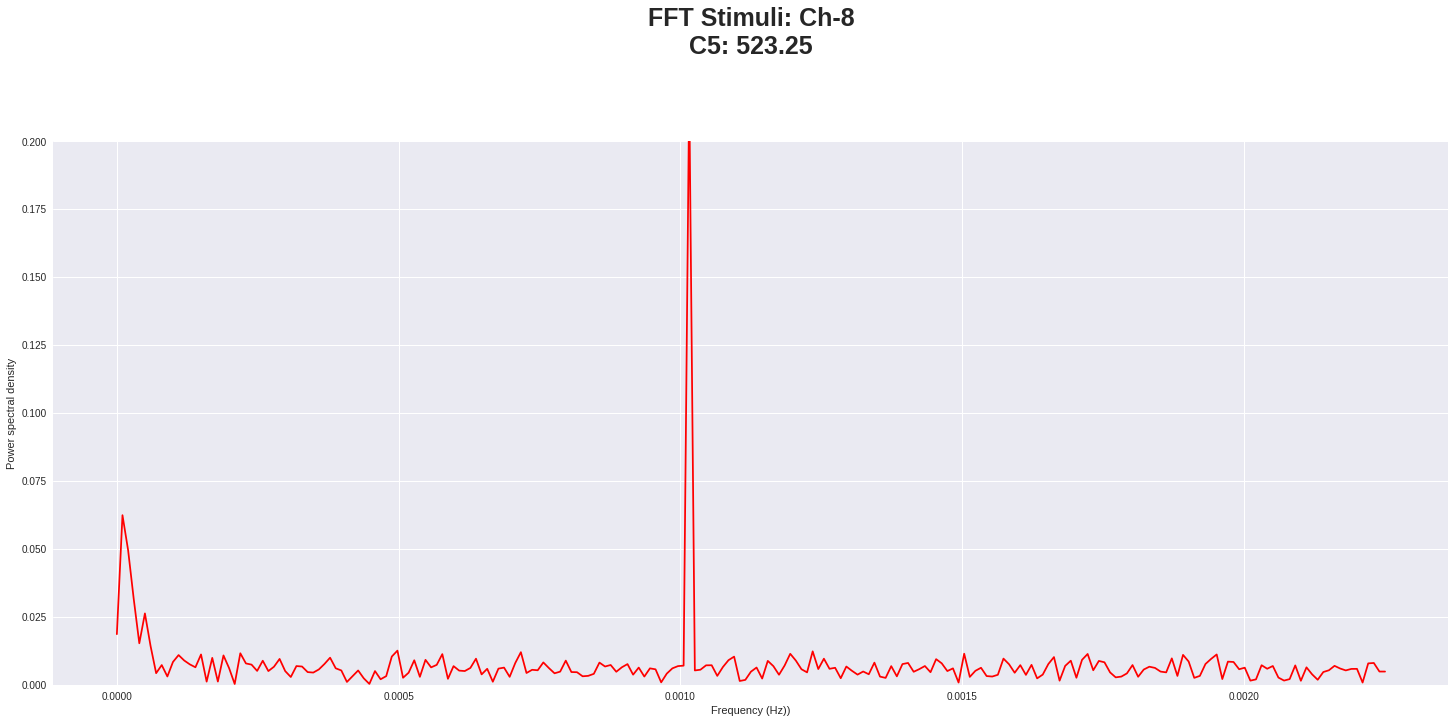

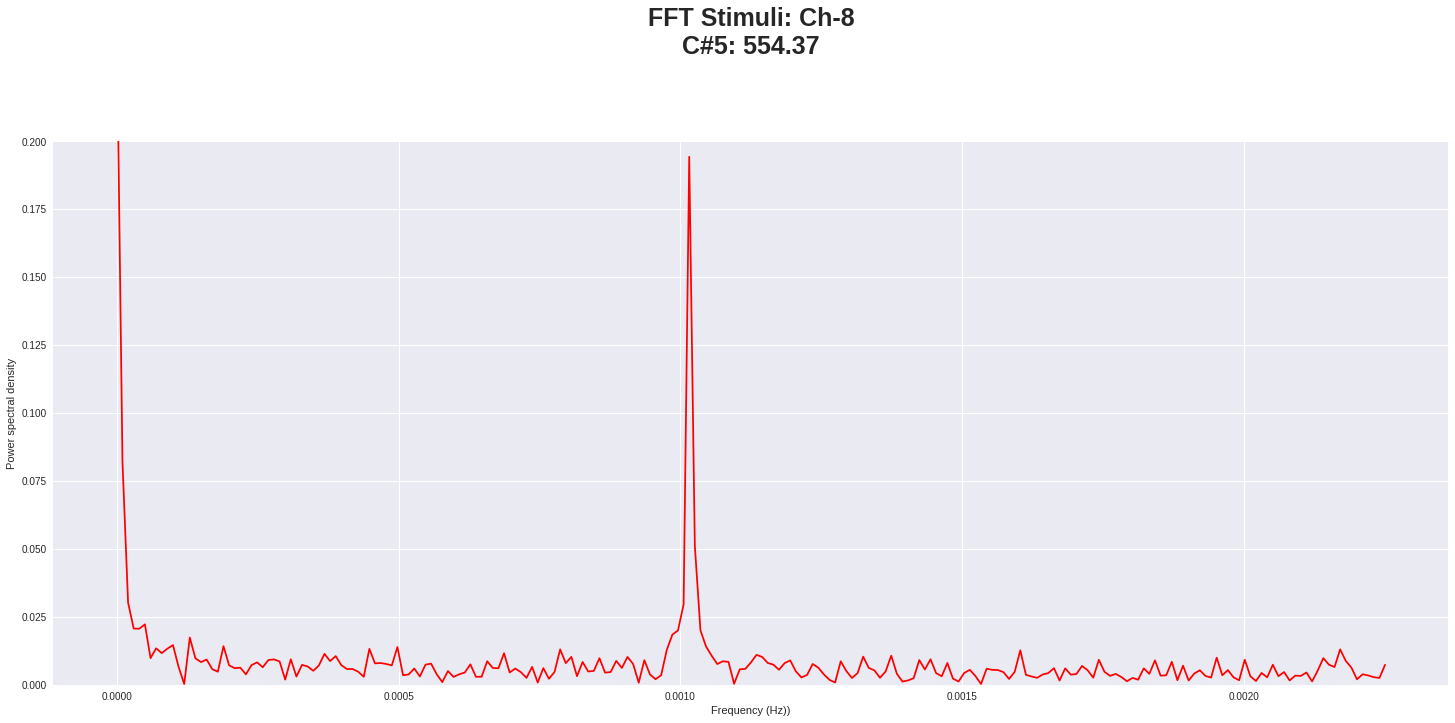

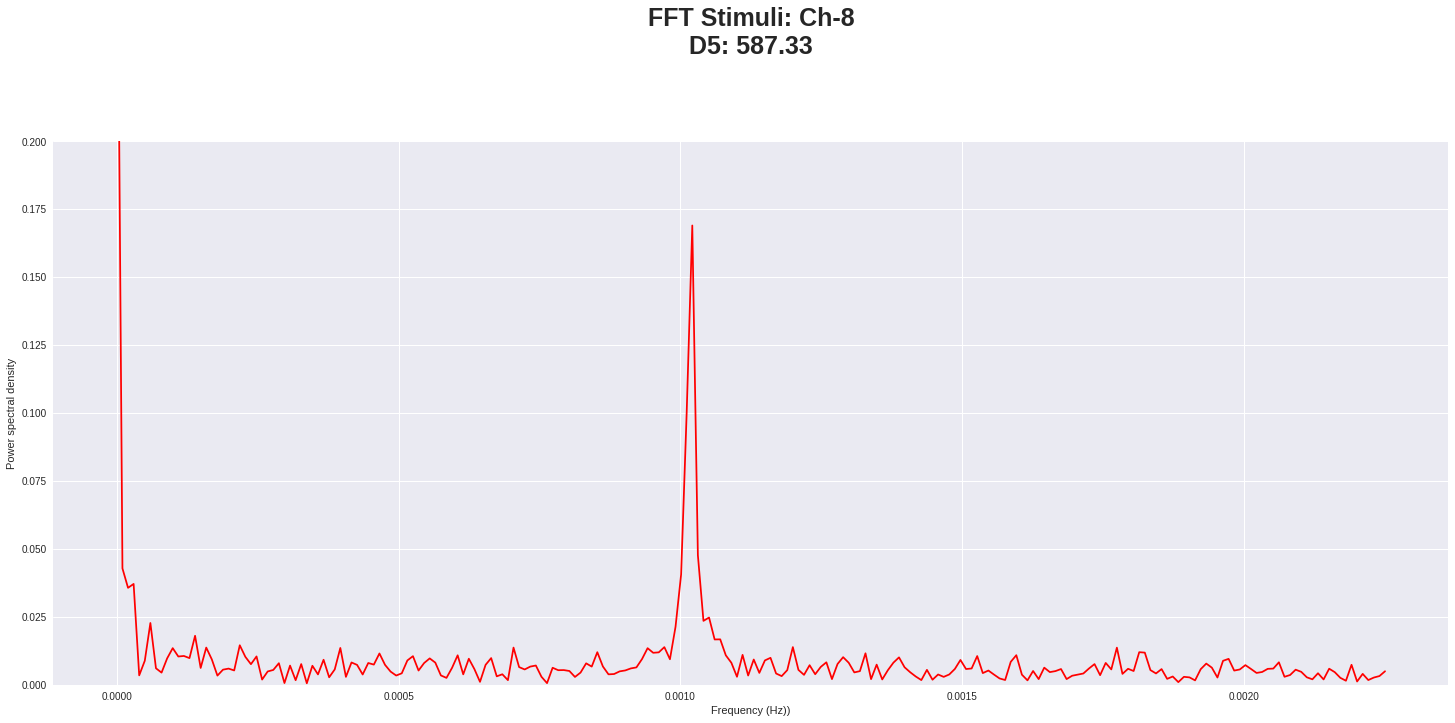

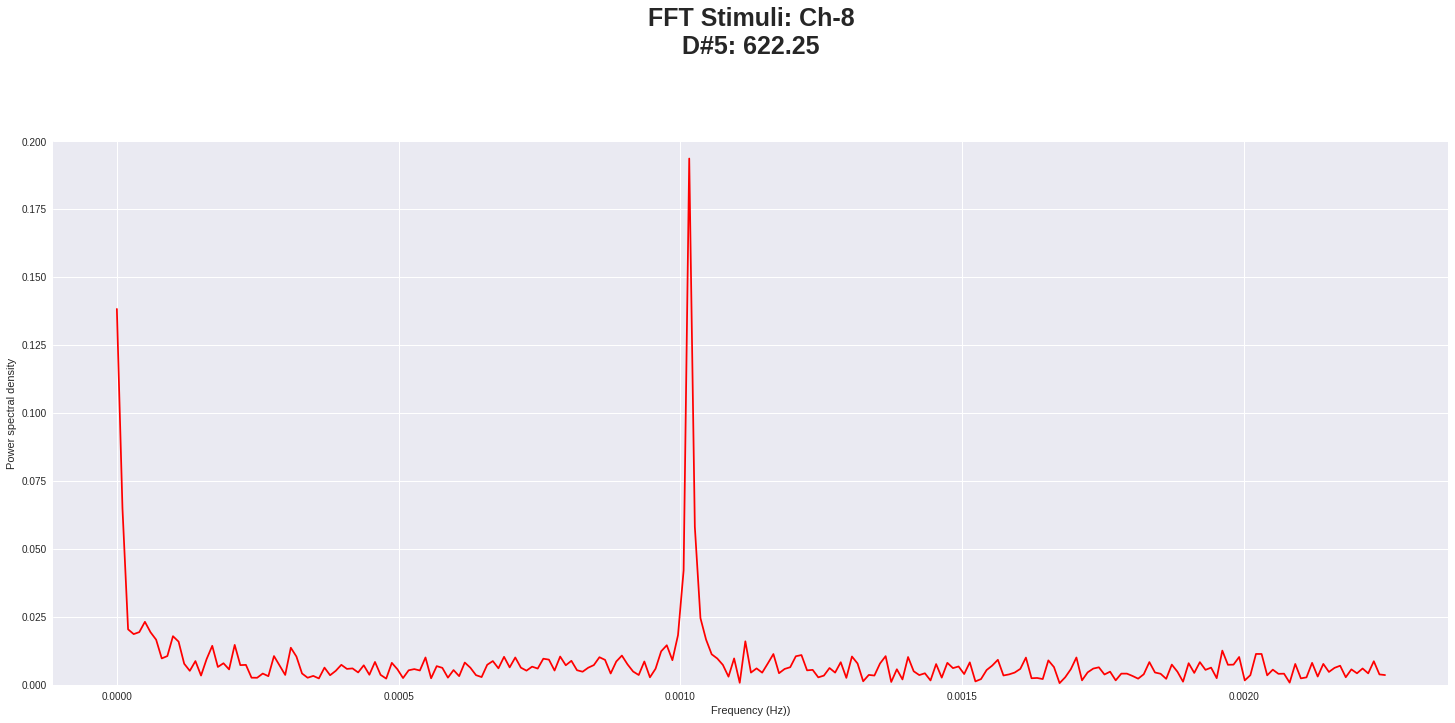

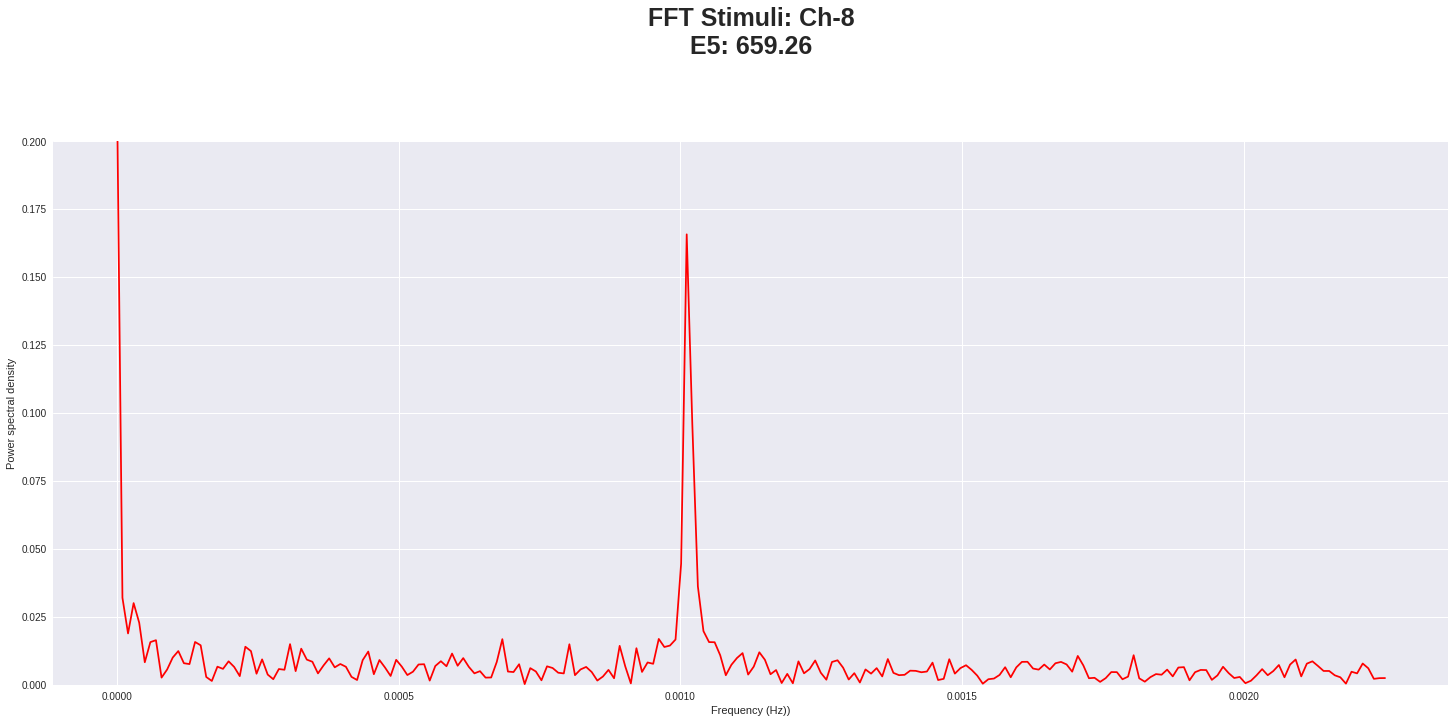

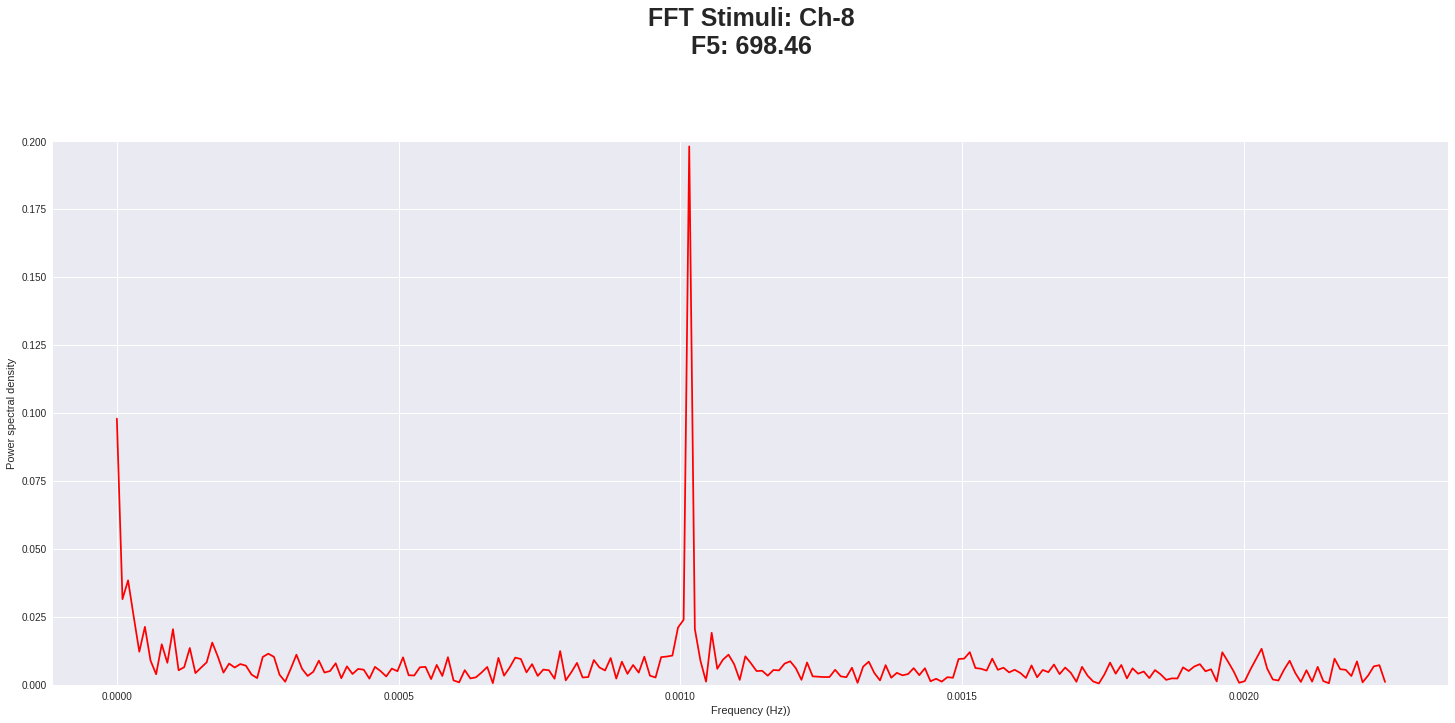

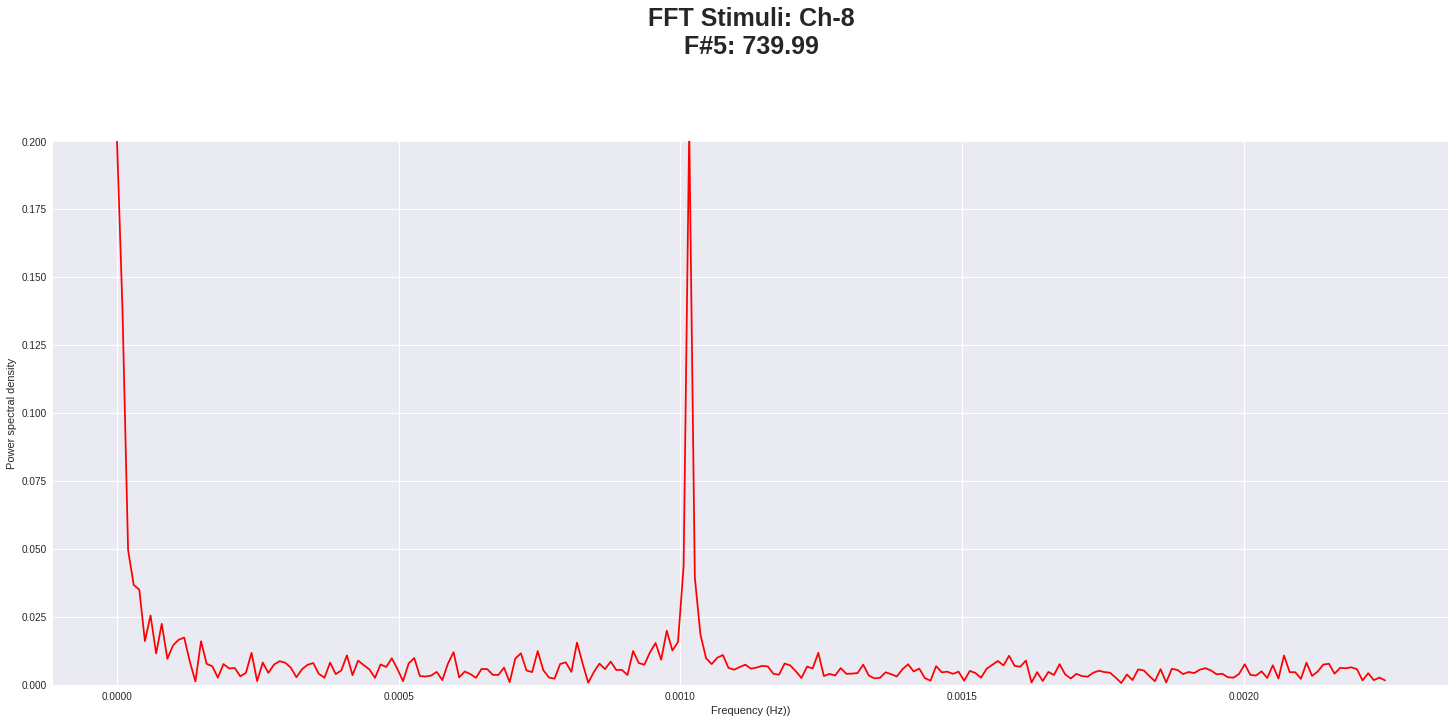

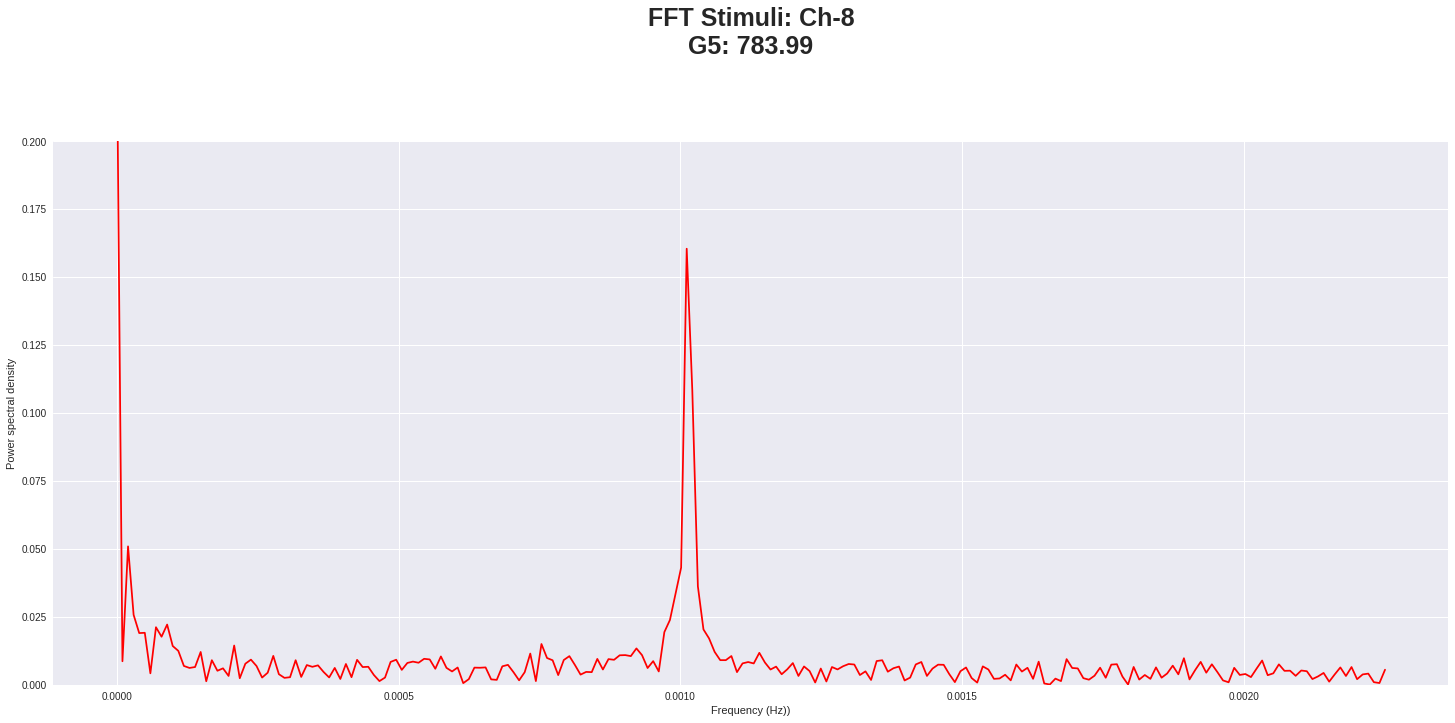

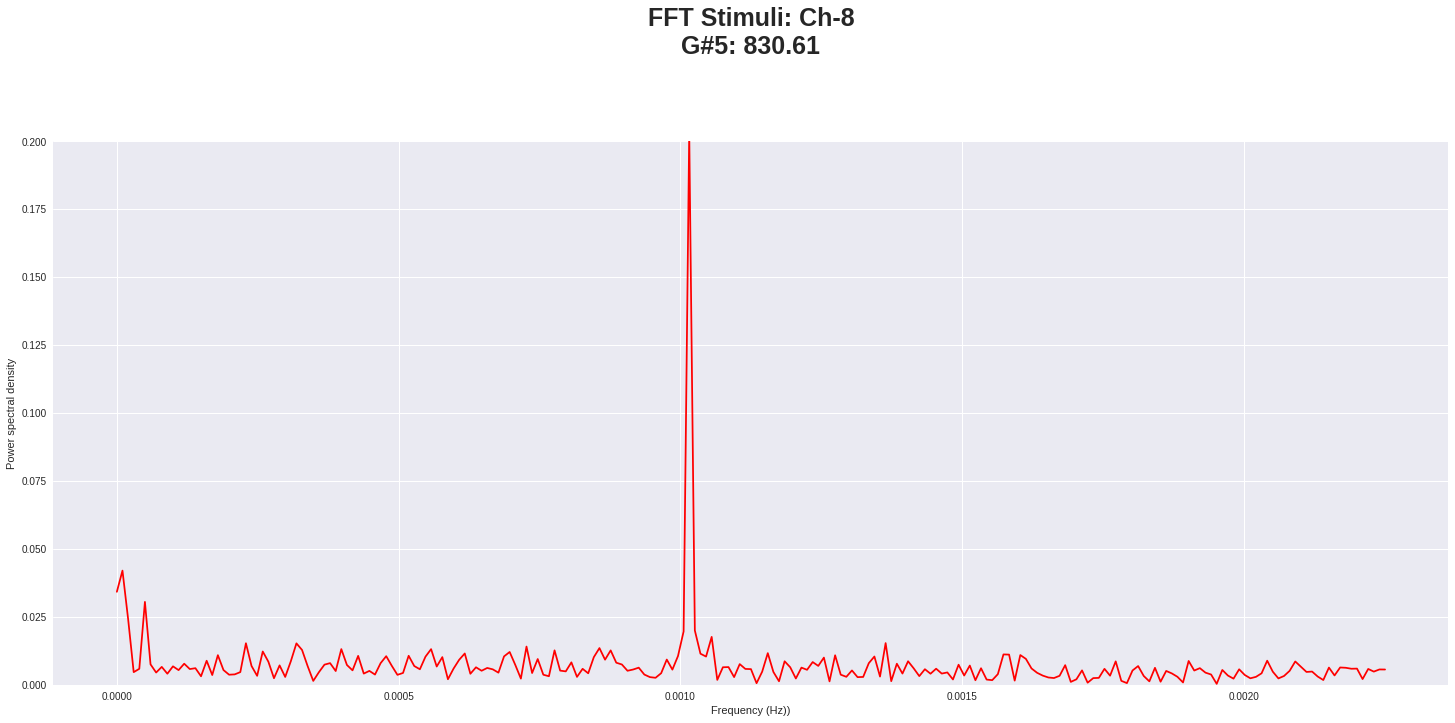

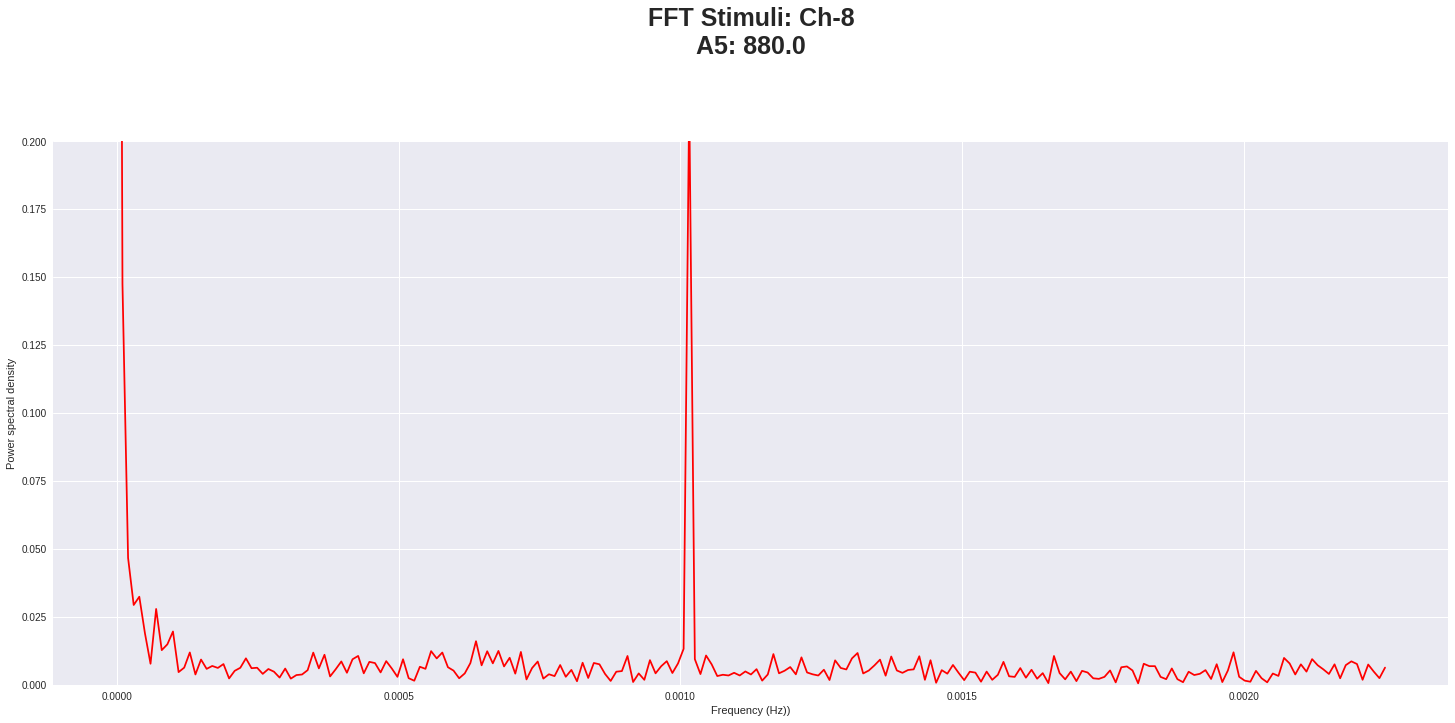

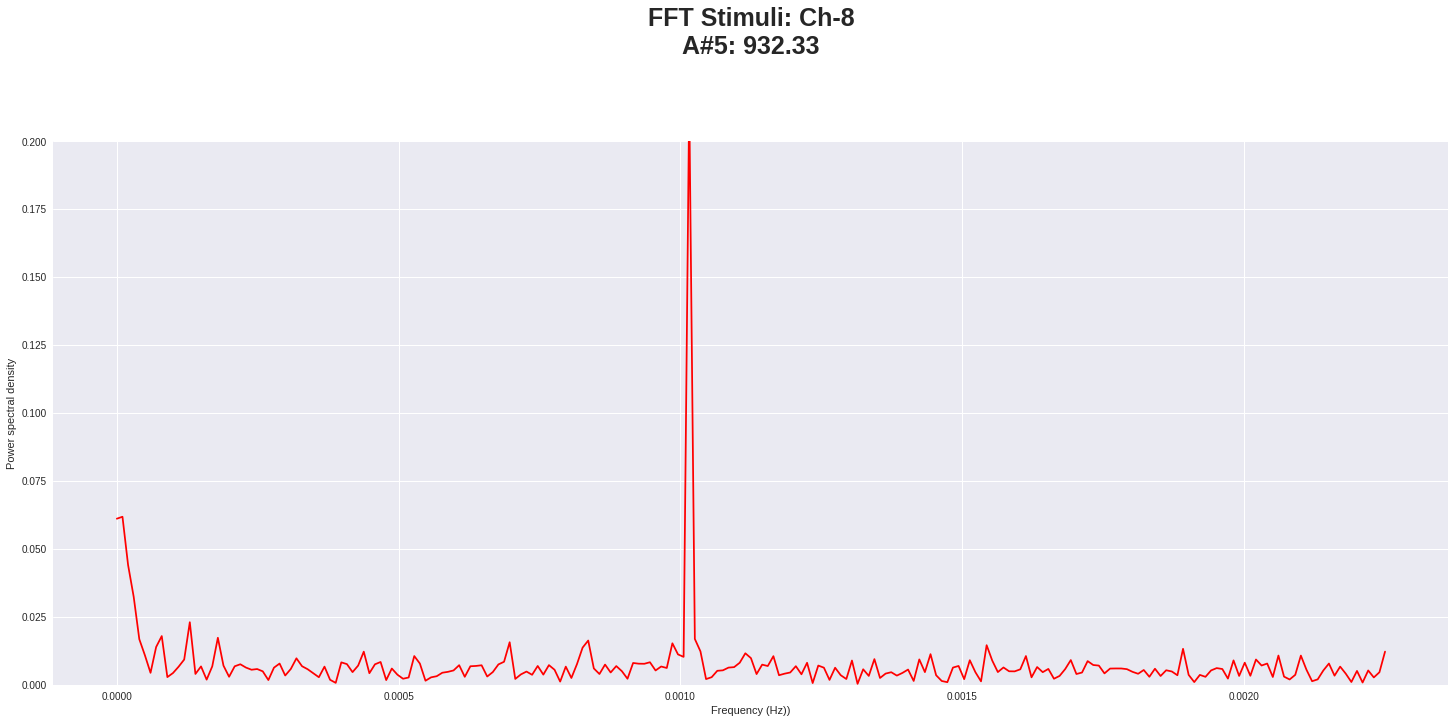

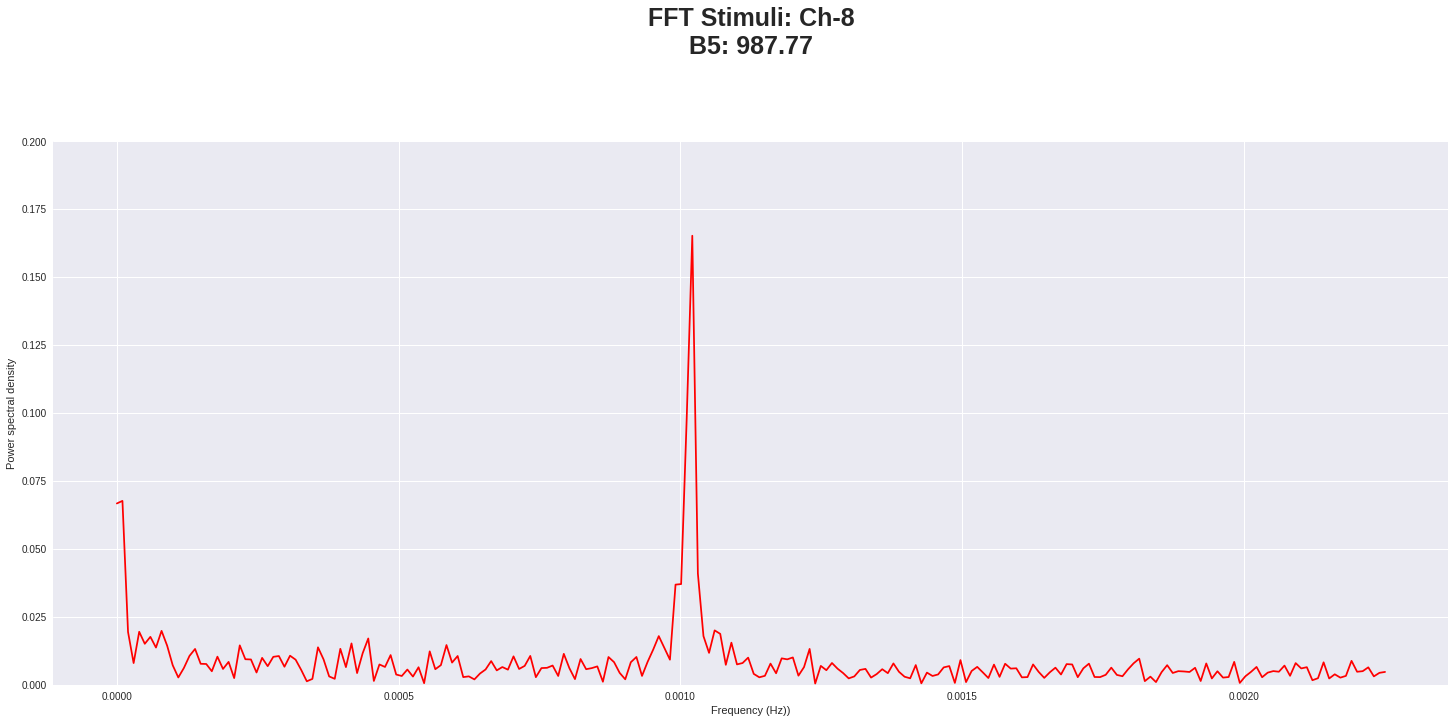

In [35]:
stimulus = df[df['Key'] != 'silence']  # select the rows with stimulus

for index, ch in enumerate(labels):
    for key, freq in m_keys_sorted.values:
        y = stimulus[ch][stimulus['Key']==key]
        # Number of sample points
        N = y.shape[0]
        # sample spacing
        T = 1.0 / 220.0
        x = np.linspace(0.0, N*T, N)
        yf = fft(y)
        xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
        plt.figure(figsize=(25, 10))
        plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), color=color[index])
        plt.ylim(0, 0.2)
        plt.xlabel('Frequency (Hz))')
        plt.ylabel('Power spectral density')
        plt.title('FFT Stimuli: ' + ch + '\n' + key + ": " + str(freq), fontdict=font, y=1.15)
        plt.grid(True)
        plt.show()